In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import itertools


# Load Data

In [2]:
seed = 5
data_path = "income2.csv"

In [3]:
from sklearn import preprocessing

# Read data
data = pd.read_csv(data_path, header=0)



to_encode = ['workclass', 'eduction-levels', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
label_encoder = preprocessing.LabelEncoder()

df = data[to_encode]
df = df.apply(label_encoder.fit_transform)

data = data.drop(to_encode, axis=1)
data = pd.concat([data, df], axis=1)
# Last column represnets label, and others are features
features = np.array(data.iloc[:, 0:-1])
classes = np.array(data.iloc[:, -1])

data.describe()

,age,fnlwgt,eduction-years,capital-gain,capital-loss,hours-per-week,workclass,eduction-levels,marital-status,occupation,relationship,race,sex,native-country,income
count,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437187,1.897920e+05,10.121349,1092.044064,88.375419,40.931269,2.19933,10.333742,2.580153,5.959981,1.418388,3.678592,0.675674,36.382514,0.248898
std,13.134296,1.056542e+05,2.550029,7406.466611,404.304753,11.980182,0.95394,3.812353,1.498037,4.029569,1.601344,0.834721,0.468130,6.105467,0.432382
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.176270e+05,9.000000,0.000000,0.000000,40.000000,2.00000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,38.000000,0.000000
50%,37.000000,1.784210e+05,10.000000,0.000000,0.000000,40.000000,2.00000,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,38.000000,0.000000
75%,47.000000,2.376240e+05,13.000000,0.000000,0.000000,45.000000,2.00000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,38.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,6.00000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,40.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ef1e33eb8>,
      dtype=object)

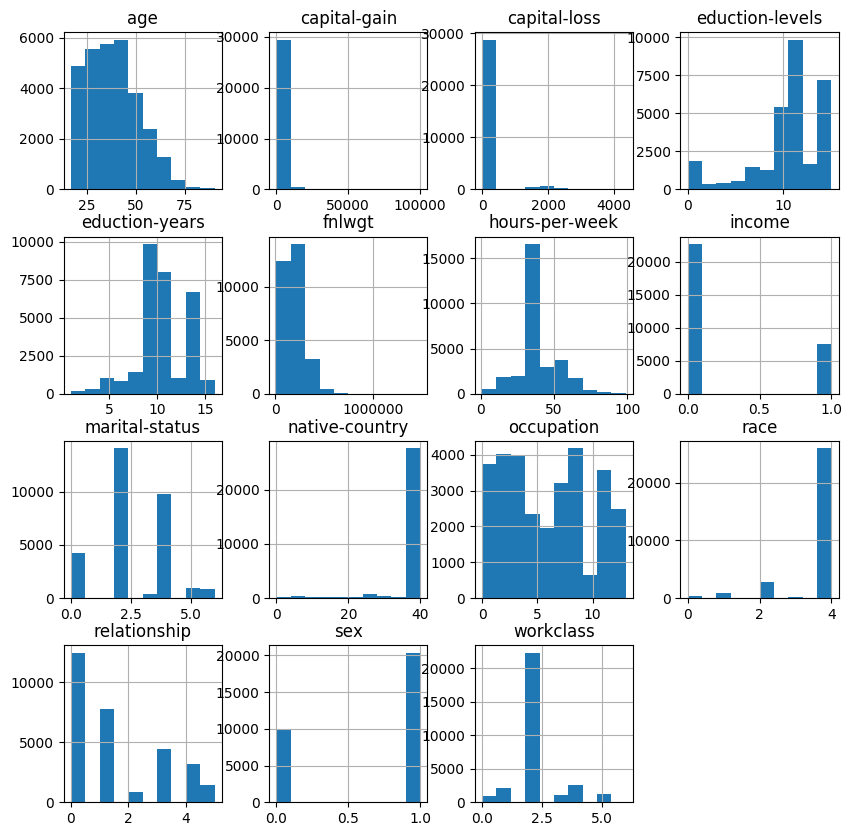

In [4]:
# draw hist for dataset
data.hist(figsize=(10, 10))

In [5]:
# split data
training_x, testing_x, training_y, testing_y = sklearn.model_selection.train_test_split(
features, classes, test_size=0.2, random_state=seed, stratify=classes)

In [6]:
print(training_x.shape)
print(testing_x.shape)
print(training_y.shape)
print(testing_y.shape)

(24128, 14)
(6033, 14)
(24128,)
(6033,)


In [10]:
from sklearn.preprocessing import StandardScaler

features = StandardScaler().fit_transform(features)
training_x = StandardScaler().fit_transform(training_x)
testing_x = StandardScaler().fit_transform(testing_x)


# Accuracy
### According to the fig above, the sample is not balanced (Death = 1 samples are significally fewer than Death = 0 samples), so we use "weighted" mode for accuracy calculating.

In [11]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import compute_sample_weight

def balanced_accuracy(truth, pred):
    wts = compute_sample_weight('balanced', truth)
    return accuracy_score(truth, pred, sample_weight=wts)



# Section 2: Decision Tree

In [12]:
max_depth = np.arange(3, 50)
min_samples_split = [2,3,4]
min_samples_leaf = [2,3,4]
params = {'criterion': ['gini', 'entropy'], 'max_depth': max_depth, "min_samples_split": min_samples_split, "min_samples_leaf": min_samples_leaf
          }


Use grid search to find best params. Take a few minutes.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator


DecisionTree_classifier = DecisionTreeClassifier()

grid_seacher = sklearn.model_selection.GridSearchCV(DecisionTree_classifier, n_jobs=4, param_grid=params, 
                                                    refit=True, verbose=10, cv=5, scoring=make_scorer(balanced_accuracy))
grid_fit = grid_seacher.fit(training_x, training_y)

Fitting 5 folds for each of 846 candidates, totalling 4230 fits


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, score=0.7150953515748372, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, score=0.7106386057595682, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, score=0.708694938126274, total=   0.1s[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, score=0.7245241961720641, total=   0.0s[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, score=0.7152489049780076, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, score=0.7150953515748372, total=   0.0s[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, score=0.7106386057595682, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, score=0.708694938126274, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, score=0.7152489049780076, total=   0.0s

[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.7150953515748372, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.708694938126274, total=   0.0s

[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4 


[Parallel(n_jobs=4)]: Batch computation too fast (0.1069s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.2s


[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.7245241961720641, total=   0.0s[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, score=0.7245241961720641, total=   0.0s

[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.7106386057595682, total=   0.0s
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.7152489049780076, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, score=0.7150953515748372, total=   0.0s
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, score=0.7106386057595682, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, score=0.7152489049780076, total=   0.0s
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.7150953515748372, total=   0.0s[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2 

[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.708694938126274, total=   0.0s[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, score=0.708694938126274, total=   0.0s

[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, score=0.7245241961720641, total=   0.1s
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.7106386057595682, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.7152489049780076, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 

[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.3s



[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.7245241961720641, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, score=0.7106386057595682, total=   0.0s[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, score=0.7152489049780076, total=   0.0s

[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, score=0.7150953515748372, total=   0.1s
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, score=0.7150953515748372, total=   0.0s[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, score=0.708694938126274, total=   0.0s[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, score=0.7245241961720641, total=   0.0s


[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, score=0.7102222860260129, total=   0.0s[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, score=0.708694938126274, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3 
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, score=0.7245241961720641, total=   0.0s

[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, score=0.7102222860260129, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, score=0.7152489049780076, total=   0.0s[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, score=0.7152489049780076, total=   0.0s

[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, score=0.7150953515748372, total=   0.0s[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, score=0.708694938126274, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, score=0.7245241961720641, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4, score=0.708694938126274, total=   0.0s[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4, score=0.7150953515748372, total=   0.0s


[Parallel(n_jobs=4)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    0.8s



[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4, score=0.7245241961720641, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4, score=0.7102222860260129, total=   0.0s[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.7275925234718195, total=   0.1s[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4, score=0.7152489049780076, total=   0.0s


[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.7456574693502541, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.7323099715754111, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.729839395242743, total=   0.0s[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, score=0.7456574693502541, total=   0.0s[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 


[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, score=0.7323099715754111, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, score=0.7393833872802835, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, score=0.7275925234718195, total=   0.1s
[CV]  criterion=gini, max_depth=4, min_samples

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, score=0.729839395242743, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, score=0.7456574693502541, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, score=0.7275925234718195, total=   0.1s

[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, score=0.729839395242743, total=   0.1s

[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, score=0.7456574693502541, total=   0.1s

[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, score=0.7323099715754111, total=   0.1s
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, score=0.7323099715754111, total=   0.1s[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, score=0.7393833872802835, total=   0.0s[CV] cr

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, score=0.7275925234718195, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, score=0.729839395242743, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, score=0.7393833872802835, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, score=0.7275925234718195, total=   0.0s

[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, score=0.729839395242743, total=   0.0s

[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, score=0.7456574693502541, total=   0.0s
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, score=0.7456574693502541, total=   0.0s
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, score=0.7323099715754111, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4 

[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, score=0.7393833872802835, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, score=0.7275925234718195, total=   0.0s


[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    1.2s


[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, score=0.7323099715754111, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, score=0.7393833872802835, total=   0.0s

[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, score=0.7271762037382641, total=   0.0s

[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, score=0.729839395242743, total=   0.0s
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, score=0.729839395242743, total=   0.0s[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, score=0.7323099715754111, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, score=0.7456574693502541, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, score=0.7393833872802835, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.7456574693502541, total=   0.1s

[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.7323099715754111, total=   0.1s
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.7393833872802835, total=   0.0s[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 

[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.7271762037382641, total=   0.1s[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, score=0.7271762037382641, total=   0.1s

[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.729839395242743, total=   0.0s

[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, score=0.7456574693502541, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2 


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    1.5s


[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, score=0.7323099715754111, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, score=0.729839395242743, total=   0.1s[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2 

[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, score=0.7449425478767695, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, score=0.7314520658072295, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, score=0.7393833872802835, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, score=0.749781730824019, total=   0.1s

[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, score=0.7254881851330789, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, score=0.7317685501228741, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3, score=0.7254881851330789, total=   0.1s[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3, score=0.7449425478767695, total=   0.1s

[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3, score=0.7317685501228741, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, score=0.7449425478767695, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, score=0.7314520658072295, total=   0.1s[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3, score=0.7314520658072295, total=   0.1s

[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3, score=0.749781730824019, total=   0.1s
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, score=0.7254881851330789, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, score=0.7317685501228741, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, score=0.749781730824019, total=   0.1s[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3 

[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, score=0.7250718653995235, total=   0.1s[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, score=0.7317685501228741, total=   0.1s

[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, score=0.7449425478767695, total=   0.1s[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, score=0.7449425478767695, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, score=0.7314520658072295, total=   0.1s[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, score=0.7499196999189418, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4 


[Parallel(n_jobs=4)]: Done  98 tasks      | elapsed:    2.0s


[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, score=0.7250718653995235, total=   0.1s
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, score=0.7314520658072295, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, score=0.7499196999189418, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, score=0.7250718653995235, total=   0.1s

[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, score=0.7317685501228741, total=   0.1s
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, score=0.7317685501228741, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, score=0.7449425478767695, total=   0.1s
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, score=0.7314520658072295, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, score=0.7499196999189418, total=   0.1s[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, score=0.7449425478767695, total=   0.1s

[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, score=0.7314520658072295, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, score=0.749781730824019, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, score=0.7250718653995234, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, score=0.7250718653995234, total=   0.1s[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, score=0.7316305810279514, total=   0.0s[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, score=0.7449425478767695, total=   0.0s


[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, score=0.7314520658072295, total=   0.0s[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, score=0.7316305810279514, total=   0.1s

[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, score=0.7449425478767695, total=   0.0s[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, score=0.7314520658072295, total=   0.0s

[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4 


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.3s


[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, score=0.749781730824019, total=   0.1s
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, score=0.749781730824019, total=   0.0s[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, score=0.7250718653995234, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, score=0.7316305810279514, total=   0.1s[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, score=0.7397961468890868, total=   0.1s[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, score=0.7446666858078039, total=   0.1s

[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, score=0.7573382096964819, total=   0.1s[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3 

[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, score=0.7446666858078039, total=   0.1s

[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, score=0.726308191449654, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, score=0.726308191449654, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, score=0.7490653484127466, total=   0.1s[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, score=0.7402124666226421, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, score=0.7486490286791913, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, score=0.7573382096964819, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4, score=0.7402124666226421, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4, score=0.7573382096964819, total=   0.1s

[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4, score=0.7446666858078039, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, score=0.7456397829395045, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4, score=0.726308191449654, total=   0.1s
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4, score=0.7486490286791913, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, score=0.7272812885813545, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, score=0.7406287863561974, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, score=0.7492033175076693, total=   0.1s[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3 

[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, score=0.7406287863561974, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, score=0.7569218899629264, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, score=0.7569218899629264, total=   0.1s[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, score=0.7456397829395045, total=   0.1s

[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, score=0.7272812885813545, total=   0.1s[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4 

[Parallel(n_jobs=4)]: Done 146 tasks      | elapsed:    2.9s



[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, score=0.7456397829395045, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, score=0.7492033175076693, total=   0.1s
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, score=0.7272812885813545, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, score=0.7492033175076693, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, score=0.7406287863561974, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.7406287863561974, total=   0.1s[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, score=0.7565055702293711, total=   0.1s

[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.7456397829395045, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.7567839208680037, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.7272812885813545, total=   0.1s
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, score=0.7456397829395045, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, score=0.7272812885813545, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.7490653484127466, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, score=0.7406287863561974, total=   0.1s[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, score=0.7490653484127466, total=   0.1s

[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, score=0.7567839208680037, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, score=0.7406287863561974, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, score=0.7456397829395045, total=   0.1s[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, score=0.7567839208680037, total=   0.1s

[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, score=0.7502268798989349, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, score=0.7272812885813545, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, score=0.7490653484127466, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, score=0.7420106233311321, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, score=0.7507659708863305, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3 


[Parallel(n_jobs=4)]: Done 172 tasks      | elapsed:    3.4s


[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, score=0.7613103640637953, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3, score=0.7507659708863305, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, score=0.7562006826540798, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3, score=0.7562006826540798, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3, score=0.7502268798989349, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3, score=0.7415943035975766, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, score=0.7502268798989349, total=   0.1s[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4 

[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3, score=0.7613103640637953, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, score=0.7411779838640213, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, score=0.7613103640637953, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, score=0.7507659708863305, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.7513227482844756, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, score=0.7562006826540798, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.750229406529042, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.7555060122818917, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.7443655574377672, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, score=0.750229406529042, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, score=0.7443655574377672, total=   0.1s
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.7617266837973506, total=   0.1s[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, score=0.7617266837973506, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, score=0.7514606793189583, total=   0.1s
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, score=0.7559223320154471, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, score=0.7514606793189583, total=   0.1s[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, score=0.750229406529042, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, score=0.7555060122818917, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.7512025036607426, total=   0.1s[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, score=0.7443655574377672, total=   0.1s

[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.74450348847225, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, score=0.7617266837973506, total=   0.1s
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.7522933187860691, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.7617266837973508, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.7557843629205243, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4 

[Parallel(n_jobs=4)]: Done 202 tasks      | elapsed:    4.1s



[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3, score=0.7522933187860691, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3, score=0.7512025036607426, total=   0.1s[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3, score=0.7557843629205243, total=   0.1s

[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4, score=0.7512025036607426, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3, score=0.74450348847225, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3, score=0.7617266837973508, total=   0.1s[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4, score=0.74450348847225, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4, score=0.7522933187860691, total=   0.1s




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4, score=0.7617266837973508, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4, score=0.7557843629205243, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, score=0.7471519710586008, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, score=0.7566194148364223, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, score=0.7339701972494187, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, score=0.7350711188951735, total=   0.1s[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.7339701972494187, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, score=0.7611772198664469, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.734795256826208, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.7611772198664469, total=   0.1s

[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.7479846105257114, total=   0.1s[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.7479846105257114, total=   0.1s[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4 

[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.7566194148364223, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.7348028367165295, total=   0.1s[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.7566194148364223, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.7353495075942461, total=   0.1s[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4 




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, score=0.7348053633466365, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, score=0.7371527175629503, total=   0.1s[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.7611772198664469, total=   0.1s

[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, score=0.7632588185342237, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3 


[Parallel(n_jobs=4)]: Done 232 tasks      | elapsed:    4.7s


[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, score=0.748957707657412, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, score=0.7557891878180987, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.748957707657412, total=   0.1s[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.7348053633466365, total=   0.1s


[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.7544022595225099, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.7348053633466365, total=   0.1s
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.7365984667949121, total=   0.1s[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.7365984667949121, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.7632588185342237, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.7485413879238566, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.7544022595225099, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.7632588185342237, total=   0.1s

[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, score=0.7495119584254502, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, score=0.735224209710299, total=   0.1s[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, score=0.7552324865408334, total=   0.1s[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3, score=0.735224209710299, total=   0.1s


[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, score=0.7390989118263515, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3, score=0.7495119584254502, total=   0.1s[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, score=0.762566560610823, total=   0.1s[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3 


[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3, score=0.7390989118263515, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3, score=0.762566560610823, total=   0.1s[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3, score=0.7553704556357562, total=   0.1s

[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, score=0.7499282781590055, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, score=0.7553704556357562, total=   0.1s

[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, score=0.735224209710299, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, score=0.7390989118263515, total=   0.1s
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, score=0.762566560610823, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, score=0.7410678457607166, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2 

[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, score=0.7359088116224984, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, score=0.7593619095933669, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, score=0.7733584082230326, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.7741885210600363, total=   0.1s

[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, score=0.7739229909586015, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=4 

[Parallel(n_jobs=4)]: Done 266 tasks      | elapsed:    5.5s



[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.741484165494272, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.7739229909586015, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.7359088116224984, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=4, score=0.7423168049613829, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=4, score=0.7372957018576473, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.7578370122028553, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=4, score=0.7582533319364106, total=   0.1s

[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=4, score=0.7750186338970398, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=4, score=0.7737850218636787, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.7740556432857676, total=   0.1s

[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.7424572626259727, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.7717058356446892, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3, score=0.7420409428924173, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.7402099399925348, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3, score=0.7379904102902752, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.7602041988556262, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3, score=0.7747478250882885, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3, score=0.7717058356446892, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=4, score=0.7743315053547332, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=4, score=0.7715678665497664, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, score=0.7416246231588619, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=4, score=0.7382687989893479, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=4, score=0.7603421679505489, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, score=0.7758563266243648, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, score=0.7411805104941283, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, score=0.7614555705050795, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.7751616181917369, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, score=0.772809588404071, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.7414866921243791, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.7411805104941283, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.7726692068603611, total=   0.1s

[Parallel(n_jobs=4)]: Done 300 tasks      | elapsed:    6.4s



[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=4, score=0.7416246231588619, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=4, score=0.7411805104941283, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.7607584876841044, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=4, score=0.7758563266243648, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=4, score=0.7726692068603611, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=4, score=0.7615935396000022, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, score=0.7644727095236729, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, score=0.766385811676436, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, score=0.7645803209968706, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, score=0.7348078899767434, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, score=0.7625737979571845, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, score=0.7647207786614604, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, score=0.7352242097102989, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, score=0.7636847880629278, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, score=0.7646106405581556, total=   0.1s
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, score=0.7668021314099914, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, score=0.7647207786614604, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, score=0.7637780010910448, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, score=0.7674919768846051, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2, score=0.7652851359499269, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, score=0.735638002813747, total=   0.1s
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, score=0.760908519022963, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2, score=0.7655887909500704, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2, score=0.7392418961210485, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2, score=0.7628617983909657, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, score=0.7648966091475495, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2, score=0.7652748215706926, total=   0.1s
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, score=0.7659747911223406, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, score=0.7392418961210485, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, score=0.7649988833808471, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=4, score=0.764452496482816, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=4, score=0.7385522409486346, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, score=0.7620291589238548, total=   0.1s
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=4, score=0.7654483332854805, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=4, score=0.7649988833808471, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=4, score=0.7624430662086231, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, score=0.7669630480346837, total=   0.1s

[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, score=0.7661098734865905, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, score=0.7633439949467399, total=   0.1s[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, score=0.7400745355881592, total=   0.1s




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
[Parallel(n_jobs=4)]: Done 338 tasks      | elapsed:    7.6s


[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, score=0.7603614675408462, total=   0.1s
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3, score=0.7643095121881192, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3, score=0.7397986735191936, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3, score=0.768906715667978, total=   0.1s[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3, score=0.7611941070079571, total=   0.1s

[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3, score=0.7661098734865905, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4, score=0.7643095121881192, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4, score=0.768214533865457, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4, score=0.7656959662018222, total=   0.1s

[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4, score=0.7399366045536765, total=   0.1s
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4, score=0.7621647155699905, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.7693205087714261, total=   0.1s[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2 

[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.7383092250710613, total=   0.1s
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.7550251801659538, total=   0.1s[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.7680124914300629, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.772495051033631, total=   0.1s
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3, score=0.7562741393666198, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3, score=0.7383092250710613, total=   0.1s
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3, score=0.7726330201285538, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3, score=0.7685667802585411, total=   0.1s
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=4, score=0.7683499382698327, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=4, score=0.7558578196330644, total=   0.1s
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=4, score=0.7401124350397656, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=4, score=0.7685667802585411, total=   0.1s[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=4, score=0.7727758141210508, total=   0.1s

[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2, score=0.7700227970943754, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2, score=0.7580849292256454, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2 
[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2, score=0.741920698268684, total=   0.1s[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2, score=0.7716696489128817, total=   0.1s

[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2, score=0.7682932545174828, total=   0.1s
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.7701607281288583, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.7575256251973931, total=   0.1s[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.741920698268684, total=   0.1s

[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3 

[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.7712509167305391, total=   0.1s
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.7685716051561153, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4 


[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:    9.0s



[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=4, score=0.7423193315914899, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4, score=0.7704391168279308, total=   0.1s[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4, score=0.7575256251973931, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4 
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4, score=0.7730517523108963, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4, score=0.7416448361997185, total=   0.1s[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.7680816560911884, total=   0.1s

[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4, score=0.7680173163276374, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.7628049039593443, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.7448298831433574, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.7681480480761985, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=3, score=0.7633616813574895, total=   0.1s[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.7748525878912534, total=   0.1s

[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=3, score=0.7690471733325677, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=3, score=0.744413563409802, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=3, score=0.7741603299678524, total=   0.1s

[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4, score=0.7694660196962302, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4, score=0.7438593126417641, total=   0.1s[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=3, score=0.7710622862110861, total=   0.1s

[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4, score=0.7612800826897127, total=   0.1s[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4, score=0.7744386806064851, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4, score=0.7693970072768646, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.7619444715610555, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.771800380661443, total=   0.1s[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.7655736311694279, total=   0.1s

[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.7494119268425736, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.7713840609278877, total=   0.1s
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3, score=0.7654382267650521, total=   0.1s
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3, score=0.7489930804789112, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3 

[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3, score=0.7612522897585348, total=   0.1s
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3, score=0.771800380661443, total=   0.1s[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3, score=0.7716624115665202, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, score=0.7646030606678342, total=   0.1s[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, score=0.7606980389904965, total=   0.1s

[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, score=0.7715268549203846, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, score=0.7467760774067586, total=   0.1s
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, score=0.7672515432541848, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, score=0.7715244424715976, total=   0.1s[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2 




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, score=0.7634844526113297, total=   0.1s[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, score=0.7513581211059749, total=   0.1s

[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, score=0.7716744738104561, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, score=0.7733349278471032, total=   0.1s
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.7634844526113297, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.7672540698842919, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
[Parallel(n_jobs=4)]: Done 418 tasks      | elapsed:   10.4s


[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.7731969587521805, total=   0.1s[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.7494169801027878, total=   0.1s

[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4, score=0.7683625714203682, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.7733397527446775, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4, score=0.7508013437078296, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4 
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4, score=0.7632060639122571, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4, score=0.7726402574749152, total=   0.1s[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4, score=0.7726450823724895, total=   0.1s

[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, score=0.7616686094920899, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, score=0.7661379884578943, total=   0.1s
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, score=0.7741603299678524, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, score=0.7526020270464268, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, score=0.7749953818837504, total=   0.1s[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3, score=0.765029486921818, total=   0.1s

[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3, score=0.752323638347354, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3, score=0.7600033305578685, total=   0.1s[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3, score=0.7740247733217168, total=   0.1s

[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3, score=0.7744386806064851, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=4, score=0.7657191420942319, total=   0.1s[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=4, score=0.7590352866863821, total=   0.1s

[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=4, score=0.7745766497014079, total=   0.1s[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2 

[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=4, score=0.751769387579316, total=   0.1s
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=4, score=0.7745790621501949, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3, score=0.7683499382698327, total=   0.1s[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, score=0.7746124206839129, total=   0.1s


[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, score=0.7567980705733727, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, score=0.774153092621491, total=   0.1s[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, score=0.7721119756524736, total=   0.1s


[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3, score=0.7723827844612249, total=   0.1s[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3 

[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, score=0.7611260989278619, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3, score=0.7741961009503575, total=   0.1s[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3, score=0.7623726456797408, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3, score=0.7566550862786757, total=   0.1s




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=4, score=0.7747478250882885, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=4, score=0.7566550862786757, total=   0.1s[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3, score=0.7742910617164137, total=   0.1s

[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=4, score=0.7737367728879356, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=4, score=0.7725232421258148, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=4, score=0.7605693976505966, total=   0.1s
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.7778176806684085, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.7746098940538058, total=   0.1s[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3 

[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3 


[Parallel(n_jobs=4)]: Done 460 tasks      | elapsed:   11.7s


[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.7622395014823924, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3, score=0.7778176806684085, total=   0.1s
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.7565146286140859, total=   0.1s[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3, score=0.7580394498837175, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.7756948771535127, total=   0.1s
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3, score=0.773777254586695, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3, score=0.7623774705773151, total=   0.1s[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3, score=0.776805867259256, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=4, score=0.7735039191478367, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=4, score=0.7758740130351145, total=   0.1s[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=4, score=0.7623774705773151, total=   0.1s

[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.7735039191478367, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=4, score=0.7580419765138247, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=4, score=0.7772173620952372, total=   0.1s
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.777945505182463, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.757763587814752, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2 
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.7751261136323117, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3, score=0.777945505182463, total=   0.1s
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.765439327602274, total=   0.1s

[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3, score=0.766131585525675, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3, score=0.7730901260443884, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3, score=0.7587341583163455, total=   0.1s[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4, score=0.7725384019064573, total=   0.1s[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3, score=0.7751285260810988, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4, score=0.7591504780499008, total=   0.1s[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4, score=0.7773887277843177, total=   0.1s[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4, score=0.7751285260810988, total=   0.1s


[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.7666972924861467, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4, score=0.7658508224382551, total=   0.1s
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.7646030606678342, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.7726764442067225, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.750839243159436, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3, score=0.7623911108558961, total=   0.1s
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.780831095499887, total=   0.1s[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3, score=0.750839243159436, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3, score=0.7801388375764862, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3, score=0.7679462516868127, total=   0.1s
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3, score=0.7732307330352007, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=4, score=0.7658671796491431, total=   0.1s


[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=4, score=0.7632161704326854, total=   0.1s[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=4, score=0.7502849923913979, total=   0.1s[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=4, score=0.7705948455389456, total=   0.1s

[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.7674071606994173, total=   0.1s[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.7519553245858336, total=   0.1s

[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2 



[Parallel(n_jobs=4)]: Done 506 tasks      | elapsed:   13.1s


[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=4, score=0.7798604869378536, total=   0.1s
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.7801581371667835, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.769054753222889, total=   0.1s[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.7750388059619192, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3, score=0.7660202704642683, total=   0.2s
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3, score=0.7694710729564445, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3, score=0.7750388059619192, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, score=0.7651876309971576, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3, score=0.7529208418272129, total=   0.1s
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, score=0.7523691176892818, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3, score=0.7801533122692091, total=   0.1s[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, score=0.7679437250567057, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, score=0.7782145075939294, total=   0.1s[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, score=0.7769848479835605, total=   0.1s

[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=2, score=0.7702834993826984, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=2, score=0.7773987552683287, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=2, score=0.7680816560911884, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3, score=0.7668326968905224, total=   0.1s

[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=2, score=0.7493144218898045, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=2, score=0.7797201053941437, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3, score=0.7502824657612908, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3, score=0.7694533865456946, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3, score=0.7781927955548449, total=   0.1s[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=4, score=0.7675147721726149, total=   0.1s

[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3, score=0.7783693638303621, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=4, score=0.7783669513815751, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=4, score=0.7668326968905222, total=   0.2s[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=4, score=0.7494548795543943, total=   0.2s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.7654458066553734, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=4, score=0.7809690645948097, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.7594642395704728, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.7875452851100904, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.756735938442103, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, score=0.7577014556834822, total=   0.1s[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3 

[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.7656014211850685, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, score=0.7675299319532574, total=   0.2s[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, score=0.7621304817729156, total=   0.2s[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, score=0.7575230985672858, total=   0.1s

[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, score=0.764477762783887, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, score=0.7557198885985815, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, score=0.7882351305847042, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, score=0.7872645220226706, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, score=0.7600664963105459, total=   0.2s
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, score=0.765042307459016, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, score=0.7560462832696891, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, score=0.7675526716242212, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3 


[Parallel(n_jobs=4)]: Done 552 tasks      | elapsed:   15.0s


[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, score=0.766714823739599, total=   0.1s[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, score=0.7679639380975624, total=   0.1s

[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, score=0.763211117172471, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, score=0.7640412300094748, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, score=0.7578494932383933, total=   0.1s
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, score=0.7853426044889009, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, score=0.7850618414014812, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, score=0.7661581224623337, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=4, score=0.75647523615378, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=4, score=0.7653303078927973, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=4, score=0.7660253237244825, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.7665543081914497, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=4, score=0.7611320451348014, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=4, score=0.7860348624123018, total=   0.1s[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.7594566596801514, total=   0.1s
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.7610345401820323, total=   0.1s[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.7871217280301737, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=3, score=0.7583986907462172, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.767678194955271, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=3, score=0.7669859370318702, total=   0.1s

[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=3, score=0.7691876309971576, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=3, score=0.7594566596801515, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4, score=0.7673844210284533, total=   0.1s
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=3, score=0.7847666036213384, total=   0.1s[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4, score=0.7594566596801515, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4, score=0.7849045727162611, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4, score=0.7639462516868126, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, score=0.7475541646329209, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4, score=0.7667027614956632, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, score=0.7603145654483333, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, score=0.7560188299669335, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, score=0.7622405466708776, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3, score=0.7603145654483333, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3, score=0.7622455999310918, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, score=0.7806275307736563, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3, score=0.7797924788577585, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3, score=0.747556691263028, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3, score=0.7581028410834973, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=4, score=0.751441499899509, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=4, score=0.759206063912257, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=4, score=0.7581028410834973, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, score=0.7617317752447673, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=4, score=0.7611295185046943, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, score=0.7646055872979413, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=4, score=0.7818692526279609, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, score=0.7470251801659537, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, score=0.7771686536054392, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, score=0.7600464706563516, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3, score=0.7470251801659537, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3, score=0.7611526358645205, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3, score=0.7629706279250051, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=4 


[Parallel(n_jobs=4)]: Done 602 tasks      | elapsed:   16.7s


[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=4, score=0.7628428034109507, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3, score=0.7632212236928995, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3, score=0.7773042102515749, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=4, score=0.7676703896178471, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=4, score=0.7479932240374401, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=4, score=0.7773042102515749, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2, score=0.7551909041316145, total=   0.1s

[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=4, score=0.7624015950651868, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2, score=0.7611453985181591, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2, score=0.7622582330816273, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2, score=0.7560033305578684, total=   0.1s[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=3, score=0.7615584713887853, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2, score=0.7740923218877573, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=3, score=0.7560033305578684, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=3, score=0.775208136891075, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=3, score=0.7581101955267163, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=4, score=0.7531219386143732, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=3, score=0.7605935221384681, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=4, score=0.7641968474547073, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=4, score=0.7621135946314055, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=4, score=0.7596148037554911, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=2, score=0.7519957506675472, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=2, score=0.7605803209968703, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=4, score=0.7731265382232982, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=2, score=0.7654851641292302, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=2, score=0.7436845157770823, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=2, score=0.7570159754656256, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3, score=0.7438300267018864, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3, score=0.7531118320939447, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3, score=0.7570159754656256, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=4, score=0.7511706910907577, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3, score=0.7637881076114731, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=4, score=0.7626669729248613, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3, score=0.7693724232749384, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=4, score=0.7442438198053347, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=4, score=0.7660394529577083, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=4, score=0.7570183879144129, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2, score=0.7471706910907577, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2, score=0.7521665278934222, total=   0.1s[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2, score=0.7597898320568034, total=   0.1s

[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.7539621579718051, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2, score=0.7608789227367997, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2, score=0.7691013099826672, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.7582506531913059, total=   0.1s[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=4 

[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.7467543713572025, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.7691013099826672, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=4, score=0.7463380516236471, total=   0.1s
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.7611767603523922, total=   0.1s[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=4, score=0.7590951616846153, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=4, score=0.7546619196646474, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=4, score=0.7536585029716615, total=   0.1s
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=2, score=0.7596299635361337, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=2 



[Parallel(n_jobs=4)]: Done 652 tasks      | elapsed:   18.5s


[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=4, score=0.7684066396104792, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=2, score=0.7537913807459301, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=2, score=0.749234603347785, total=   0.1s[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=2, score=0.7696435365672094, total=   0.1s

[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, score=0.747990697407333, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=2, score=0.7642193177870538, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, score=0.7585214620000574, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, score=0.7626944203965423, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, score=0.7519805908869045, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=4, score=0.7585214620000574, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=4, score=0.7555971173447413, total=   0.1s
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, score=0.7701978253956877, total=   0.1s[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=4, score=0.7717203103374121, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=4, score=0.7490916190530881, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=4, score=0.7637981731559242, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2, score=0.7345254816388642, total=   0.1s

[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2, score=0.7524196502914238, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2, score=0.7475689408936264, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.748542421545264, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2, score=0.7515769043038847, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.7521336817020299, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2, score=0.7567400372757801, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.7363312182376756, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.7549295519002746, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.7507542923207849, total=   0.1s
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, score=0.7363312182376756, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, score=0.7524243961525808, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, score=0.7529713744293549, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=2, score=0.7551060323293807, total=   0.1s[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, score=0.7529713744293548, total=   0.1s

[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, score=0.7541065622283124, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=2, score=0.7491067788337304, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=2, score=0.7402387665451206, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=2, score=0.7603634204755787, total=   0.1s[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3 

[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3, score=0.7356592494760114, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=2, score=0.7563140677470762, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3, score=0.755348284082617, total=   0.1s[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3, score=0.755256596514399, total=   0.1s

[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3, score=0.7461900140687358, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, score=0.7542809727525913, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3, score=0.756483398676232, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, score=0.7461900140687358, total=   0.1s

[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, score=0.7602182140342946, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, score=0.7388493496798646, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2, score=0.74466013953889, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, score=0.7585336355097757, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2, score=0.7572851359499269, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2, score=0.7546343141201318, total=   0.1s

[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2, score=0.7472757759338482, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=3, score=0.7572851359499269, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=3, score=0.7464456630968445, total=   0.1s
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2, score=0.7644904310793251, total=   0.1s[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4 


[Parallel(n_jobs=4)]: Done 706 tasks      | elapsed:   20.4s


[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=3, score=0.7660177409186238, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=3, score=0.7452244968273565, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=3, score=0.7565755312441987, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, score=0.7434162335984382, total=   0.2s[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2 

[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, score=0.7615837376898562, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, score=0.7565755312441987, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, score=0.7510352866863819, total=   0.1s[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.7474465531597232, total=   0.1s

[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.7533978006833385, total=   0.1s
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, score=0.7660177409186238, total=   0.1s[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.7356567228459043, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.7553603463265527, total=   0.1s[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3 
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.7485491992508084, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3, score=0.7356567228459043, total=   0.1s

[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3, score=0.7436937439918538, total=   0.1s
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3, score=0.746746791466881, total=   0.1s[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=4, score=0.7450815125326595, total=   0.1s[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3, score=0.7577065089436963, total=   0.1s

[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3, score=0.7549488514905718, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=4, score=0.7595046656521863, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=4, score=0.7359250050245485, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=4, score=0.7549488514905718, total=   0.1s[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2 

[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.7383153119526832, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=4, score=0.7457729302108436, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.7517704212007236, total=   0.1s[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.7488347872358024, total=   0.2s

[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.7607738378937091, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=3, score=0.7534357001349451, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.7570304501583486, total=   0.1s
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=3, score=0.7607738378937091, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=3, score=0.7556483467603341, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=3, score=0.7373422148209826, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=3, score=0.7493914885130677, total=   0.1s[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4, score=0.7349898073444544, total=   0.1s

[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4, score=0.7575938442102845, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4, score=0.7477286220276333, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4, score=0.7577090355738033, total=   0.1s[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2, score=0.7519982772976543, total=   0.1s

[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2, score=0.7510277067960607, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4, score=0.7570280377095615, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2, score=0.7388316632691149, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2, score=0.7607459659261139, total=   0.1s[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3 

[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2, score=0.752017726214174, total=   0.1s
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3, score=0.7416104969996268, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3, score=0.7557426282695455, total=   0.1s[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3, score=0.752017726214174, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=4, score=0.7532421832381062, total=   0.1s[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3, score=0.7525575813259066, total=   0.1s

[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3, score=0.7568659441267671, total=   0.1s
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=4, score=0.751032760056275, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=4, score=0.740223606764478, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=4, score=0.7585263981634143, total=   0.1s

[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=4, score=0.7552030776413329, total=   0.1s[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=2, score=0.7291259582531798, total=   0.1s

[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=2, score=0.743962904476155, total=   0.1s[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=2, score=0.739402227356526, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=3 



[Parallel(n_jobs=4)]: Done 760 tasks      | elapsed:   22.5s


[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=3, score=0.7499141519997704, total=   0.1s
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=2, score=0.7531067788337303, total=   0.1s[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=2, score=0.7450975594289528, total=   0.1s
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=3, score=0.751587010824313, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=3, score=0.7324590427517299, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=3, score=0.7450975594289528, total=   0.1s[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=4 

[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=4, score=0.7321705475322289, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=3, score=0.7374634226812462, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=4, score=0.7491042522036234, total=   0.1s
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=4, score=0.7373206286887491, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=4, score=0.7518679261534927, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.7463380516236471, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.7505012489592006, total=   0.1s[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=4, score=0.7500958086804044, total=   0.1s

[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.7447174264272048, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.7367803841626231, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.7469104572532456, total=   0.1s
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=3, score=0.7330309799305178, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=3, score=0.7432808291940625, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=3, score=0.7469080448044585, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=4, score=0.7432808291940625, total=   0.1s[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=3, score=0.747587010824313, total=   0.1s

[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=4, score=0.7520285968589393, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=3, score=0.7465134371099875, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=4, score=0.735531424961957, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=4, score=0.7458211791865866, total=   0.1s[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=4, score=0.7460729928885605, total=   0.1s[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=2, score=0.7396643027362256, total=   0.1s

[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=2, score=0.752422176921531, total=   0.1s[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=2, score=0.7482732610609628, total=   0.1s

[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=2, score=0.7406222400872835, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.7489511613884982, total=   0.1s[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3 

[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=2, score=0.7546608510567905, total=   0.1s
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.7399224783944413, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.7373118952596974, total=   0.1s
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.7521701700018196, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=4, score=0.7373118952596974, total=   0.1s
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.7478665911225562, total=   0.1s[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=4, score=0.7458914123288065, total=   0.1s
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=4, score=0.7484088177070986, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=4, score=0.7411790174854288, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=2, score=0.747584484194206, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=4, score=0.7536830051483955, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=2, score=0.7461925406988429, total=   0.1s

[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=2, score=0.7430280230051117, total=   0.1s
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=2, score=0.7328627293347499, total=   0.1s[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=3, score=0.7321806540526573, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=2, score=0.7395522586953845, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=3, score=0.746746791466881, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=3, score=0.7413506818269544, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=3, score=0.7482766659967267, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=4, score=0.7490966723133022, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=4, score=0.7482766659967267, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=3, score=0.7452548281141728, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=4, score=0.7424809715229951, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=4, score=0.732316058457033, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=4, score=0.7413506818269544, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3 


[Parallel(n_jobs=4)]: Done 818 tasks      | elapsed:   24.3s


[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=2, score=0.7348468230497575, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=2, score=0.7524651296333515, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=2, score=0.7487088803848154, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3, score=0.7524651296333515, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=2, score=0.7462102271095925, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3, score=0.7473288351660972, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=2, score=0.7562243476278966, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3, score=0.7385987539119699, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3, score=0.7522063567336272, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3, score=0.7460802302349221, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=4, score=0.7372017571563927, total=   0.1s[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=4, score=0.7460802302349221, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=4, score=0.7505290418903787, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.7486904591001752, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=4, score=0.7446879324700679, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=4, score=0.7524726451283239, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.7393884406672601, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.7431378448993655, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.7553555214289784, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=3, score=0.7431378448993655, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.7536950673923313, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=3, score=0.7538402738336156, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=3, score=0.7485373682850498, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=3, score=0.7395213184415286, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=4, score=0.7465987539119701, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=3, score=0.7586909041949957, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=4, score=0.7386810990840964, total=   0.1s
[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=4, score=0.7586909041949957, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=4, score=0.7424456630968447, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=2, score=0.7307887105572942, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=4, score=0.7531431910126404, total=   0.1s
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=2, score=0.746453242987166, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=2, score=0.7348468347752884, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=2, score=0.7416256567802693, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3, score=0.744108415400959, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3, score=0.7416256567802693, total=   0.1s

[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=2, score=0.7426068783739821, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3, score=0.7484401795413316, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3, score=0.7309392747423124, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3, score=0.7408156925887736, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=4, score=0.7320427230181745, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=4, score=0.7435415314823854, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=4, score=0.7370688149867753, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=2, score=0.743321255275776, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=4, score=0.7427341583163455, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=2, score=0.7405348416549427, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=4, score=0.7442697448594163, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=2, score=0.7281857073128715, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=2, score=0.7422098582307238, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=2, score=0.7512309232740193, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=3, score=0.7276289299147263, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=3, score=0.7512309232740193, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=3, score=0.7478881391943496, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=4, score=0.745666082861983, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=3, score=0.7453952740532314, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=3, score=0.7441631375987268, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=4, score=0.7430352866863819, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=4, score=0.7301217950558442, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2 


[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   26.2s


[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=4, score=0.7433256732340416, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2, score=0.7414700393350371, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=4, score=0.752346738277337, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2, score=0.7506500975088826, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2, score=0.7406373998679262, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2, score=0.7414725659651439, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=3, score=0.7425760142410062, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2, score=0.7548012326005004, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=3, score=0.7418787791782708, total=   0.1s[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=3, score=0.7548012326005004, total=   0.1s

[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=3, score=0.73759028395877, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=4, score=0.7427240517959172, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=3, score=0.7495415198519263, total=   0.1s
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=4, score=0.7410587728616959, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=4, score=0.7513447678810705, total=   0.1s
[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=4, score=0.741475092595251, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2, score=0.7441286284418158, total=   0.1s
[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2, score=0.7392580895230985, total=   0.1s
[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=4, score=0.7547988201517133, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2, score=0.7409512492349092, total=   0.1s
[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2, score=0.7245641275948205, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2, score=0.7408084552424121, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=3, score=0.7248450429240002, total=   0.1s
[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=3, score=0.7416155502598409, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=3, score=0.7396974651366687, total=   0.1s
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=4, score=0.7416155502598409, total=   0.1s[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=3 

[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=3, score=0.7428796692411496, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=4, score=0.7378888856986991, total=   0.1s
[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=3, score=0.7415079505121744, total=   0.1s[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=4, score=0.7245590743346063, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=4, score=0.7424785590742079, total=   0.1s
[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=4, score=0.7347112781291529, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.7322210801343708, total=   0.1s
[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.7506862842406898, total=   0.1s
[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.7497014556834821, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=3, score=0.7530370668121393, total=   0.1s
[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.7440058571879755, total=   0.1s
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.7454000345554569, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=3, score=0.741099198943409, total=   0.1s
[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=3, score=0.7305659077205777, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=4, score=0.7305659077205777, total=   0.1s
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=3, score=0.7448505706245532, total=   0.1s[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=4 

[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=3, score=0.7472129323797497, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=4, score=0.7487402422190486, total=   0.1s[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=4, score=0.7402690861064055, total=   0.1s[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=4, score=0.7513717878779179, total=   0.1s


[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=2, score=0.7502279135203422, total=   0.1s
[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=4, score=0.7429093535004863, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=2, score=0.7381495879870222, total=   0.1s[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=2, score=0.748430529746183, total=   0.1s
[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=2, score=0.7417560079244309, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.7424507163570587, total=   0.1s
[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.7502279135203422, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=2, score=0.7498271078369204, total=   0.1s[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.7491348499135195, total=   0.1s
[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.7387063653851674, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=4, score=0.7478603462631715, total=   0.1s
[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=4, score=0.7387063653851674, total=   0.1s
[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.7513375305347091, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=4, score=0.7513375305347091, total=   0.1s
[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=4, score=0.7423026788021477, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=4, score=0.7488540868260998, total=   0.1s[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=2, score=0.7298307732062362, total=   0.1s
[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=2, score=0.7430100203853112, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3 


[Parallel(n_jobs=4)]: Done 938 tasks      | elapsed:   28.1s


[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=2, score=0.7358102059909605, total=   0.1s
[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3, score=0.7430100203853112, total=   0.1s

[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=2, score=0.7346634126733468, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3, score=0.7355061586608861, total=   0.1s
[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3, score=0.730517901748543, total=   0.1s[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=2, score=0.7371971342865493, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3, score=0.7341401021591648, total=   0.1s
[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3, score=0.732486885468879, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=4, score=0.7301066352752017, total=   0.1s
[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=4, score=0.7380345986512343, total=   0.1s
[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=4, score=0.743147951419794, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2, score=0.7511035056992736, total=   0.1s
[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=4, score=0.738696258864739, total=   0.1s
[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=4, score=0.7341401021591648, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2, score=0.7391454247896866, total=   0.1s[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=3 

[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2, score=0.7320755692095668, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2, score=0.7413989308026976, total=   0.1s
[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=3, score=0.7283261649774614, total=   0.1s[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2, score=0.7491565619526039, total=   0.1s

[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=3, score=0.7452813650508314, total=   0.1s
[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=3, score=0.7509579947744697, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=3, score=0.7391454247896866, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=4, score=0.7498494932383933, total=   0.1s

[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=3, score=0.7463875302590006, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=4, score=0.7434490797898302, total=   0.1s
[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=4, score=0.7302647793505413, total=   0.1s
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=4, score=0.7434781170216873, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.7392606161532057, total=   0.1s
[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=4, score=0.7509549850841738, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.7496711361221972, total=   0.1s[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.7503741593190371, total=   0.1s

[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.738287519021505, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=3, score=0.7485575813259066, total=   0.1s
[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.7504831790285138, total=   0.1s
[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=3, score=0.7342445663096844, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=3, score=0.7514706747320574, total=   0.1s
[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=3, score=0.737038559820839, total=   0.1s
[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=4, score=0.7375877573286629, total=   0.1s[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=3, score=0.7503741593190371, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=4 
[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=4, score=0.7478704527836, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=4, score=0.7371663843348932, total=   0.1s
[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=4, score=0.7498295202857075, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2, score=0.7434288667489736, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2, score=0.733856039507307, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=4, score=0.7534022420609757, total=   0.1s[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2, score=0.7390076196620551, total=   0.1s

[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2, score=0.7283110051968188, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2, score=0.7360861441808061, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=3, score=0.7423254184731115, total=   0.1s[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=3, score=0.7302546728301129, total=   0.1s

[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=3, score=0.7333147000384155, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=4, score=0.7417686410749663, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=3, score=0.732607080306641, total=   0.1s
[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=3, score=0.7390076196620551, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=4, score=0.7299687042407189, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=4, score=0.7280300898676391, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=4, score=0.7362241132757288, total=   0.1s[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=4, score=0.7415079505121744, total=   0.1s

[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.7329132619368918, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=2 
[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.748478778721926, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.7537418817651957, total=   0.1s


[Parallel(n_jobs=4)]: Done 1000 tasks      | elapsed:   29.6s
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.7365121019839788, total=   0.1s[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3, score=0.7513995808090959, total=   0.1s

[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.7465254993539234, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3, score=0.7334624594447156, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3, score=0.7329157885669988, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3, score=0.7443155813863724, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=4, score=0.733876252548164, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3, score=0.7479172525470865, total=   0.1s
[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=4, score=0.7472225821748986, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=4, score=0.7513995808090959, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=4, score=0.7333118952596973, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=2, score=0.7482842458870482, total=   0.1s
[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=4, score=0.7462495611640778, total=   0.1s[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=2, score=0.7360755692095667, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=2, score=0.7529955721225691, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=2, score=0.7399477446955124, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3, score=0.7387088920152747, total=   0.1s

[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=2, score=0.7519111189534844, total=   0.1s[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3, score=0.7500874558557524, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3, score=0.7512164485812963, total=   0.1s
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3, score=0.7373093686295902, total=   0.1s[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=4, score=0.7507846909184874, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=4, score=0.7368981021562491, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3, score=0.7491083129768608, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=4, score=0.7509139734547922, total=   0.1s
[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=4, score=0.7412042837864997, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=4, score=0.7530221090592277, total=   0.1s[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2, score=0.7262243532688277, total=   0.1s
[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2, score=0.7419090987395562, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2, score=0.7353938862574052, total=   0.1s
[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=3, score=0.7405196818743001, total=   0.1s
[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2, score=0.731077205776795, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=3, score=0.7314985787705647, total=   0.1s
[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2, score=0.7358246806836833, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=3, score=0.7227659708863304, total=   0.1s[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=3, score=0.7358246806836833, total=   0.1s
[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=3, score=0.7301172863673209, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=4, score=0.733158804444572, total=   0.1s
[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=4, score=0.7349727416262753, total=   0.1s
[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=4, score=0.7414927790060007, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=2, score=0.7481892675643861, total=   0.1s
[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=4, score=0.7374827222715435, total=   0.1s
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=4, score=0.7373169485199115, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=2, score=0.7413725343822676, total=   0.1s
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=2, score=0.7319426914352982, total=   0.1s[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=2, score=0.7419508071823886, total=   0.1s
[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=3, score=0.7390201269057395, total=   0.1s
[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=2, score=0.7524967696161955, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=3, score=0.7497277379225922, total=   0.1s

[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=3, score=0.7481892675643861, total=   0.1s
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=3, score=0.7376256567802693, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=4, score=0.752217060495564, total=   0.1s
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=3, score=0.7452765401532572, total=   0.1s[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=4, score=0.7327626977518734, total=   0.1s
[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=4, score=0.7433377354779773, total=   0.1s
[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=4, score=0.7354086537081168, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=2, score=0.7373169485199117, total=   0.1s[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=4, score=0.7497277379225922, total=   0.1s[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=2, score=0.7475920640845274, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=2, score=0.7348240833787935, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=2, score=0.7526106142232467, total=   0.1s

[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3, score=0.735102472077866, total=   0.1s[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3, score=0.7500849292256453, total=   0.1s

[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3 
[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3, score=0.7500765090901071, total=   0.1s
[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=2, score=0.7489679314331509, total=   0.1s[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3, score=0.7373169485199117, total=   0.1s

[Parallel(n_jobs=4)]: Done 1066 tasks      | elapsed:   31.3s



[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3, score=0.7523274386870397, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=4, score=0.7507771110281662, total=   0.1s[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=4, score=0.7398072870309226, total=   0.1s

[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=4, score=0.7505217782091084, total=   0.1s
[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=2, score=0.7413497947113038, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=4, score=0.7341293749461655, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=2, score=0.7346912056045248, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=4, score=0.7500765090901071, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=2, score=0.7245590743346062, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=2, score=0.7395619084905332, total=   0.1s[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=2, score=0.7385864750309253, total=   0.1s

[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.7278946854632634, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.7374827222715435, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.7396870424071894, total=   0.1s
[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=4, score=0.7409360016078556, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.7346912056045248, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.7391528261033393, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=4, score=0.7241402279709438, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=4, score=0.7326146601969623, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=4, score=0.7352631545088439, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.7351277383789372, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.7487523044629844, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=4, score=0.735817443337322, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.7548604898217004, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.7381900140687356, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.7437540552115328, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=3, score=0.7558260070630796, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=3, score=0.7416509230813402, total=   0.1s
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=3, score=0.7457025096819612, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=3 
[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=4, score=0.7366626661689972, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=3, score=0.7291663843348933, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=4, score=0.7536090039909271, total=   0.1s[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=3, score=0.7487523044629844, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=4, score=0.734573487610899, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=4, score=0.7505555524921286, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=2, score=0.7528612363260502, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=2, score=0.7366247667173906, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=2, score=0.7492462820717835, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=4, score=0.7451458084046959, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=2, score=0.7371916506359644, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=2, score=0.7517731498585617, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3, score=0.7488384966550864, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3, score=0.7371916506359644, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3, score=0.7532956348002862, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=4, score=0.7493902207930174, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=4, score=0.7360679893192454, total=   0.1s
[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3, score=0.7353732808866175, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3, score=0.7474406215938522, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=4, score=0.7391252117488301, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=4, score=0.7528720777203692, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=4, score=0.7474406215938522, total=   0.1s
[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2, score=0.7256650492405754, total=   0.1s
[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2, score=0.736923608545491, total=   0.1s
[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=3, score=0.7403817508398175, total=   0.1s
[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2, score=0.741906572109449, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2, score=0.7292891555887334, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2, score=0.7324941228152405, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=3, score=0.7235859772029056, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=3, score=0.7292891555887334, total=   0.1s
[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=3, score=0.7336002880234095, total=   0.1s
[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=4, score=0.7245641275948205, total=   0.1s[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=4, score=0.7309644005271546, total=   0.1s

[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=3, score=0.7376255162640405, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2 


[Parallel(n_jobs=4)]: Done 1132 tasks      | elapsed:   33.1s


[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=4, score=0.7438502397427432, total=   0.1s
[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=4, score=0.7402614037602955, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=4, score=0.7308165034884723, total=   0.1s[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.7522322202762066, total=   0.1s
[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.7455524783431027, total=   0.1s[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.7387467914668809, total=   0.1s

[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=3, score=0.7376231301501622, total=   0.1s
[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.7324969422033364, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=3, score=0.7479310919061702, total=   0.1s[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.7504224082947802, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=3, score=0.7351226851187228, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=3, score=0.7504224082947802, total=   0.1s
[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=4, score=0.7518159005426512, total=   0.1s
[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=4, score=0.7394389732694019, total=   0.1s
[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=4, score=0.7456904474380254, total=   0.1s
[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=3, score=0.7432021788318418, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=4, score=0.7306937322346322, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=4, score=0.750291676546219, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=2, score=0.7514743460909012, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=2, score=0.7400957822504235, total=   0.1s
[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=2, score=0.7513568301250062, total=   0.1s
[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3, score=0.7511984840219358, total=   0.1s

[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=2, score=0.7374548795543941, total=   0.1s
[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3, score=0.7348266100089005, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3, score=0.7406500330184617, total=   0.1s
[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=2, score=0.7484112301558856, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3, score=0.744250445269119, total=   0.1s[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3, score=0.7496891387419976, total=   0.1s

[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=4, score=0.751352005227432, total=   0.1s
[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=4, score=0.7513364150564186, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.7405095753538717, total=   0.1s

[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=4, score=0.7448119714439586, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.7273353814350112, total=   0.1s
[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.7309493812627407, total=   0.1s
[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.7330508240925059, total=   0.1s
[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.7390196819059909, total=   0.1s[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3, score=0.7219206982686842, total=   0.1s

[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3, score=0.7428670360906142, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3, score=0.7273480145855465, total=   0.1s
[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3, score=0.7367904643481425, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=4, score=0.739268196043527, total=   0.1s
[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3, score=0.7379062793514604, total=   0.1s
[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=4, score=0.7308266100089006, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=4, score=0.7228887421401707, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=4, score=0.740808455242412, total=   0.1s[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=4, score=0.7381798050925186, total=   0.1s

[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2, score=0.7343026788021477, total=   0.1s
[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2, score=0.7500000574234116, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2, score=0.7497277379225922, total=   0.1s

[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2, score=0.7349973872347755, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=3, score=0.7516678629877401, total=   0.1s
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2, score=0.7433401479267645, total=   0.1s[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=3, score=0.7381824341784144, total=   0.1s
[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=3, score=0.7286121335668553, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=3, score=0.7412585492589877, total=   0.1s
[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=3, score=0.7462616234080136, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=4, score=0.7280629360590314, total=   0.1s
[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=4, score=0.7509782078153264, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=4, score=0.7523636254188472, total=   0.1s
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=4, score=0.7395743776737775, total=   0.1s
[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=2, score=0.7507745843980591, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=2, score=0.7391226851187229, total=   0.1s[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=4, score=0.745557303240677, total=   0.1s

[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=2, score=0.7360730425794595, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=2, score=0.7521918820409041, total=   0.1s[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=2, score=0.7459133117545534, total=   0.1s

[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=3, score=0.7407955439432657, total=   0.1s[CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=3, score=0.7514692928306871, total=   0.1s[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=3, score=0.7355137385512072, total=   0.1s
[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=3, score=0.7541355116137584, total=   0.1s

[CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=3, score=0.748970343881938, total=   0.1s

[Parallel(n_jobs=4)]: Done 1202 tasks      | elapsed:   35.3s



[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=4, score=0.7350999454477589, total=   0.1s[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=4, score=0.7514718194607942, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=4 


[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=4, score=0.7407955439432657, total=   0.1s
[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=4, score=0.7503862215629727, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=4, score=0.7481449417611887, total=   0.1s
[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.7270645726262598, total=   0.1s
[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.7434564049826028, total=   0.1s
[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.7399679577363691, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.7346886789744178, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.7370688149867753, total=   0.1s
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3, score=0.74259875391197, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3, score=0.7312151368112779, total=   0.1s
[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3, score=0.7224850555571507, total=   0.1s[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3, score=0.7331887931874286, total=   0.1s

[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3, score=0.7434564049826028, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=4, score=0.7455180453070718, total=   0.1s
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=4, score=0.7202655258548911, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=4 
[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=4, score=0.7326320919101632, total=   0.1s
[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2, score=0.7509782078153264, total=   0.1s[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=4, score=0.731506158660886, total=   0.1s

[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=4, score=0.7331887931874286, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2, score=0.7341622211375578, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2, score=0.7361033621407446, total=   0.1s

[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2, score=0.7432021788318418, total=   0.1s
[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.7343077320623619, total=   0.1s
[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2, score=0.749313830637824, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.7509782078153264, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.7402665594762984, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.7494493872839596, total=   0.1s[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4 

[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4, score=0.7511009790691666, total=   0.1s
[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.7438920243064555, total=   0.1s
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4, score=0.7385937006517556, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4, score=0.7343077320623619, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4, score=0.7434805294704745, total=   0.1s
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4, score=0.748335984729429, total=   0.1s

[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2, score=0.7403691176892819, total=   0.1s[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2, score=0.7509251485830775, total=   0.1s

[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2, score=0.7498295202857075, total=   0.1s

[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2, score=0.7363438513882109, total=   0.1s
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=3, score=0.7518881391943496, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2, score=0.7428635169735301, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=3, score=0.7421723276579861, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=3, score=0.7332967354790547, total=   0.1s

[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=3, score=0.7477237971300591, total=   0.1s
[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=4, score=0.7385760142410062, total=   0.1s
[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=4, score=0.7407930173131586, total=   0.1s
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=3, score=0.7498295202857075, total=   0.1s[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=4, score=0.7500925091159667, total=   0.1s[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=4, score=0.7349620144132761, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=4, score=0.7360654626891383, total=   0.1s
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=4, score=0.7496915511907848, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=2, score=0.7435870108243131, total=   0.1s
[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=2, score=0.7323387981279967, total=   0.1s
[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=4, score=0.7477237971300591, total=   0.1s
[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=2, score=0.7294419155854301, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=2, score=0.7197011685664246, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=2, score=0.7367880518993555, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=3, score=0.7262218266387207, total=   0.1s
[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=3, score=0.7427417382066669, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=3, score=0.734016607756965, total=   0.1s
[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=4, score=0.7403842774699245, total=   0.1s
[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=3, score=0.732200867093514, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=4, score=0.7348417697895432, total=   0.1s

[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=3, score=0.7340262575521136, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=4, score=0.7237314881277098, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=4, score=0.7330508240925058, total=   0.1s
[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=4, score=0.7363765570633743, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.7283463780183181, total=   0.1s
[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.7470990877726986, total=   0.1s
[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.7506922392259324, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=3, score=0.7469529415142554, total=   0.1s[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.7379065721094489, total=   0.1s

[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=3 


[Parallel(n_jobs=4)]: Done 1272 tasks      | elapsed:   37.6s


[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.7427882715470736, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=3, score=0.7397148353383675, total=   0.1s
[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=3, score=0.7261217950558443, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=3, score=0.7430617972881319, total=   0.1s

[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=4, score=0.730954434522955, total=   0.1s
[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=3, score=0.7501416452073604, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=4, score=0.7476533766011767, total=   0.1s[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=4, score=0.7529168221884063, total=   0.1s

[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=4, score=0.7347139452754887, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=2, score=0.7488486031755146, total=   0.1s
[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=4, score=0.7407042604305095, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=2, score=0.7374523529242872, total=   0.1s[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=3 

[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=2, score=0.7488299623382282, total=   0.1s
[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=2, score=0.7383026788021477, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=3, score=0.7434187602285451, total=   0.1s
[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=2, score=0.7505217782091084, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=3, score=0.7518982457147779, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=3, score=0.7514972116687162, total=   0.1s
[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=3, score=0.7356541962157971, total=   0.1s
[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=4, score=0.7495306784576072, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=4, score=0.7362084469838351, total=   0.1s
[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=3, score=0.7453638478236496, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=4, score=0.740920841827213, total=   0.1s
[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=4, score=0.7466055696779542, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=4, score=0.7524726451283239, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2, score=0.7209526543971979, total=   0.1s
[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2, score=0.7439831175170117, total=   0.1s
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2, score=0.7343046081907462, total=   0.1s
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.7416307100404836, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2 

[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2, score=0.7346912056045248, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2, score=0.7392932076470491, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.7335801774383416, total=   0.1s
[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.7266431996324902, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.735265566957631, total=   0.1s
[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=4, score=0.7244160900399094, total=   0.1s
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.7334695562748482, total=   0.1s[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=4, score=0.7384629806287256, total=   0.1s
[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=4, score=0.7442564529558701, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=4, score=0.732755117861552, total=   0.1s
[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=2, score=0.7495913175801775, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=4, score=0.7360957939759546, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=2, score=0.7345810675012201, total=   0.1s
[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=2, score=0.734024290103075, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.7297282149932528, total=   0.1s
[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=2, score=0.7447222513247791, total=   0.1s

[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=2, score=0.7495873563788823, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.7505603773897029, total=   0.1s[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.7512439633638635, total=   0.1s

[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.740687932470068, total=   0.1s[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=4, score=0.7472414367337564, total=   0.1s
[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.7407114977768711, total=   0.1s
[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=4, score=0.7395769043038846, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=4, score=0.7423791891598797, total=   0.1s
[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=4, score=0.7297231617330386, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=2, score=0.7380116569525397, total=   0.1s
[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=4, score=0.7482004280832935, total=   0.1s[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=2, score=0.7482842458870482, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=2, score=0.7503838091141856, total=   0.1s
[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=2, score=0.7341243216859513, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.7500798759654311, total=   0.1s
[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.7348190301185792, total=   0.1s
[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=2, score=0.7450830847362298, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.7481328795172529, total=   0.1s
[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.7389872807143473, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.7494204378985136, total=   0.1s[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=4, score=0.7421799075483075, total=   0.1s
[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=4, score=0.7489789543196762, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=4, score=0.748304622895196, total=   0.1s
[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.7402311866547991, total=   0.1s

[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=4, score=0.7324615693818369, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.7338661460277355, total=   0.1s
[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=4, score=0.748970343881938, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.7260914754945592, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.7394311767419719, total=   0.1s
[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3 


[Parallel(n_jobs=4)]: Done 1346 tasks      | elapsed:   39.6s


[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.7391576510009136, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3, score=0.7237314881277097, total=   0.1s

[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3, score=0.7380538982415317, total=   0.1s
[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3, score=0.7431504780499011, total=   0.1s[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=4, score=0.7413422148209825, total=   0.1s
[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3, score=0.7396819891469751, total=   0.1s[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3, score=0.7338882884571909, total=   0.1s
[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=4, score=0.7342698326107554, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=4, score=0.7205388612937496, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=4, score=0.739148001205765, total=   0.1s[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=2 

[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=2, score=0.7304153435355595, total=   0.1s
[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=4, score=0.7465086122124132, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=2, score=0.7518057940222229, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=2, score=0.7493114181890368, total=   0.1s
[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=2, score=0.7344481897269516, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=3, score=0.7548554365614862, total=   0.1s
[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=2, score=0.741955632079963, total=   0.1s[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=3, score=0.7387442648367738, total=   0.1s

[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=3, score=0.7452861899484059, total=   0.1s
[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=3, score=0.733329581670447, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=3, score=0.749313830637824, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=4, score=0.7354187602285452, total=   0.1s[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=4, score=0.7526384334893337, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=4, score=0.7516713674954463, total=   0.1s
[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2 
[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.7493927474231246, total=   0.1s
[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=4, score=0.7366550862786757, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.7338484596169857, total=   0.1s[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=4, score=0.7472201697261113, total=   0.1s

[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.7405146286140859, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.7455042293673595, total=   0.1s
[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.7508025412965281, total=   0.1s
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=3, score=0.7407803841626232, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=3, score=0.7530221090592277, total=   0.1s
[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=3, score=0.7452447098682133, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=4, score=0.751757788050188, total=   0.1s
[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=3, score=0.7348215567486864, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=3, score=0.7428659294223173, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=4, score=0.7353732808866174, total=   0.1s
[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=4, score=0.739122685118723, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=4, score=0.7435557748969311, total=   0.1s
[CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.7241377013408367, total=   0.1s
[CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=4, score=0.751354417676219, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.7396769358867611, total=   0.1s
[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.7377803725004733, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.7345532745700422, total=   0.1s
[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=3, score=0.744394383990353, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.7354035360525538, total=   0.1s[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=3, score=0.7327525912314451, total=   0.1s

[CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=3, score=0.7220662091934882, total=   0.1s[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=3, score=0.7335978755746224, total=   0.1s

[CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=3, score=0.7365193510558714, total=   0.1s
[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=4, score=0.727478365729708, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=4, score=0.7426012805420771, total=   0.1s
[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=4, score=0.7401330844605213, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.7520892359815097, total=   0.1s
[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=4, score=0.733856039507307, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.7356845157770823, total=   0.1s[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=4, score=0.7351300103114954, total=   0.1s

[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.7322210801343709, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.7452861899484059, total=   0.1s
[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.7476485517036026, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=3, score=0.7311125785982947, total=   0.1s
[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=3, score=0.7512574602106781, total=   0.1s
[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=3, score=0.7541657813890724, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=4, score=0.7491775244767293, total=   0.1s
[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=3, score=0.739704728817939, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=3, score=0.744167962496301, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=4, score=0.7392884090843835, total=   0.1s
[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=4, score=0.7273682276264033, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=4, score=0.7426454775545765, total=   0.1s
[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=2, score=0.7395440581124926, total=   0.1s
[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=4, score=0.748902335801843, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=2, score=0.7513568301250063, total=   0.1s
[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=2 


[Parallel(n_jobs=4)]: Done 1420 tasks      | elapsed:   41.6s


[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=2, score=0.7495382583479284, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=2, score=0.7359300582847625, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3, score=0.7520235435987254, total=   0.1s
[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=2, score=0.7482732610609628, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3, score=0.7395390048522782, total=   0.1s
[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3, score=0.7468935701117355, total=   0.1s[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3 

[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3, score=0.7395440581124926, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=4, score=0.738718998535703, total=   0.1s
[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=4, score=0.7496660828619829, total=   0.1s[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3, score=0.7542686558111067, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=4, score=0.7367677510120875, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=2, score=0.7408005972034799, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=2, score=0.7323261649774612, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=2, score=0.7319446588843367, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=2, score=0.7253942404318241, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=2, score=0.7345829588293789, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3, score=0.7408005972034799, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3, score=0.7251183783628586, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3, score=0.7373664652157051, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=4, score=0.7426063338022912, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3, score=0.7333068419994831, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3, score=0.7316663082457041, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=4, score=0.7220636825633812, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=4, score=0.7280326164977461, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=4, score=0.734159401749462, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=2, score=0.7309771741939188, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=4, score=0.7422074457819368, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=2, score=0.7497393551350886, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=2, score=0.7402716127365127, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=2, score=0.7498705319150892, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=3, score=0.7508377501507365, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=3, score=0.7365196818743001, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=2, score=0.7426478900033636, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=3, score=0.7334750925952511, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=3, score=0.747655789049964, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=3, score=0.7425075084596539, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=4, score=0.7293169485199117, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=4, score=0.7508363155795483, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=4, score=0.750012690573947, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=4, score=0.7351327916391512, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=4, score=0.7470822006311886, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.7502304401504494, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.7337105285825031, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.7446740023490359, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.7389822274541331, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.7513616550225806, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.7492548163886417, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.7406475063883545, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.7505266031066826, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=4, score=0.7492522897585346, total=   0.1s
[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.7364817824226936, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.7467507761192383, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=4, score=0.7407980705733728, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=4, score=0.7366272933474977, total=   0.1s
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=4, score=0.7481352919660401, total=   0.1s[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=4 

[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2, score=0.72498550058859, total=   0.1s
[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=4, score=0.751083304383948, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2, score=0.7412042837864997, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2, score=0.7371992305262856, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2, score=0.7412392496686905, total=   0.1s
[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=3, score=0.7446828792098539, total=   0.1s
[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=3, score=0.7351201584886157, total=   0.1s
[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2, score=0.7363837944097359, total=   0.1s[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=3, score=0.7217852938643086, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=3, score=0.73832742398259, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=3, score=0.7347136905779401, total=   0.1s
[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=4, score=0.7209526543971979, total=   0.1s

[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=4, score=0.7399927029168115, total=   0.1s
[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=4, score=0.7432884090843838, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=4, score=0.7323337448677826, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=4, score=0.7352800416503539, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=2, score=0.7519487783169198, total=   0.1s
[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=2, score=0.735970484366476, total=   0.1s
[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=2, score=0.7387654557552298, total=   0.1s
[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=2, score=0.7299990238020042, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=2, score=0.7495897688276694, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=3, score=0.7523650980504752, total=   0.1s

[Parallel(n_jobs=4)]: Done 1498 tasks      | elapsed:   44.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=3, score=0.7326373998679261, total=   0.1s
[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=3, score=0.7497277379225922, total=   0.1s
[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=4, score=0.7526384334893336, total=   0.1s
[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=3, score=0.7397022021878318, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=3, score=0.7423743642623053, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=4, score=0.7294472996640732, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=4, score=0.7420722960751097, total=   0.1s
[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=4, score=0.7461091796203679, total=   0.1s
[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2, score=0.7382925722817193, total=   0.1s
[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=4, score=0.7516641301490848, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2, score=0.7474516064199375, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2, score=0.7363539579086392, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2, score=0.7503862215629727, total=   0.1s
[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3, score=0.7517552614200811, total=   0.1s
[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3, score=0.7355238450716356, total=   0.1s
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2, score=0.7471670958527938, total=   0.1s[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3, score=0.7384406098366304, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3, score=0.7520515004971943, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3, score=0.7463344563856831, total=   0.1s

[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=4, score=0.7407930173131586, total=   0.1s[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=4 

[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=4 

[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=4, score=0.7510808919351607, total=   0.1s[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=4, score=0.7482817192569411, total=   0.1s

[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=4, score=0.7364868356829078, total=   0.1s[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=4, score=0.7486895807945182, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=4, score=0.7497981584514744, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=2, score=0.7395541646329209, total=   0.1s[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3 

[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=2, score=0.7373346349306611, total=   0.1s
[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=2, score=0.7373495780741951, total=   0.1s
[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=2, score=0.7227634442562233, total=   0.1s
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3, score=0.725677682391111, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=2, score=0.7394335891907591, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3, score=0.7442640328461915, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3, score=0.7359502713256194, total=   0.1s
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3, score=0.7402710535554441, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4, score=0.7444044905107813, total=   0.1s
[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4, score=0.7344229234258806, total=   0.1s
[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4, score=0.734019020205752, total=   0.1s
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3, score=0.7313927825046457, total=   0.1s[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4, score=0.7227710241465446, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4, score=0.7388793003622809, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2, score=0.751256596514399, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2, score=0.72805535616871, total=   0.1s[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=3 

[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2, score=0.7483552843197263, total=   0.1s
[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=3, score=0.747926038645956, total=   0.1s
[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=3, score=0.7356895690372964, total=   0.1s[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2, score=0.7399881707772258, total=   0.1s

[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2, score=0.7470797881824014, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=3, score=0.7348544029400788, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=3, score=0.7518117490391563, total=   0.1s
[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=3, score=0.7427858590982864, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=4, score=0.7297231617330385, total=   0.1s
[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=4, score=0.7497277379225922, total=   0.1s
[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=2, score=0.7491118320939447, total=   0.1s
[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=4, score=0.750275919492377, total=   0.1s[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=4, score=0.738460822877487, total=   0.1s
[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=4, score=0.7466682933464204, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=2, score=0.7416231301501622, total=   0.1s
[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=2, score=0.7351100519681874, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=2, score=0.745368672721224, total=   0.1s
[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3, score=0.7385684343506848, total=   0.1s
[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=2, score=0.7501078709243402, total=   0.1s[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3, score=0.7538523360775513, total=   0.1s

[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3, score=0.7514743460909014, total=   0.1s

[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3, score=0.735102472077866, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3, score=0.7470218894115096, total=   0.1s
[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=4, score=0.7478780326739213, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=4, score=0.7341344282063796, total=   0.1s
[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=4, score=0.7460609306446248, total=   0.1s
[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=4, score=0.7403691176892819, total=   0.1s
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=2, score=0.7238719457922996, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=4, score=0.751354417676219, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=2, score=0.7437072554480463, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=2, score=0.7355511549426251, total=   0.1s[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=2, score=0.7324742025323724, total=   0.1s

[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3, score=0.7413523213414109, total=   0.1s
[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3, score=0.7344178701656664, total=   0.1s
[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=2, score=0.7312524009609359, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3, score=0.7372043716329107, total=   0.1s

[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3, score=0.7216524160900399, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=4 


[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:   46.4s


[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3, score=0.7395836205296176, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=4, score=0.7177650808234518, total=   0.1s[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=4, score=0.7394086537081168, total=   0.1s

[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=4, score=0.7387413312673582, total=   0.1s[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=2, score=0.7517956875017946, total=   0.1s
[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=4, score=0.7346937322346321, total=   0.1s[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=2, score=0.7368005972034798, total=   0.1s

[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=4, score=0.7362385879684517, total=   0.1s[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=2, score=0.7243236383473542, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=2, score=0.7497301503713794, total=   0.1s[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=2, score=0.7472201697261113, total=   0.1s

[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=3, score=0.7272302965919206, total=   0.1s
[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=3, score=0.7512550477618909, total=   0.1s
[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=3, score=0.7518032673921158, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=4, score=0.7520841827212955, total=   0.1s[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=4 

[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=3, score=0.7356920956674035, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=3, score=0.7438968492040298, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=4, score=0.7352681960435269, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=4, score=0.7363766975796031, total=   0.1s
[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=2 
[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=4, score=0.7451289212631859, total=   0.1s
[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.7420293433632893, total=   0.1s
[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.7495535820958621, total=   0.1s
[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=4, score=0.7480576340907963, total=   0.1s[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.7355187918114213, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.7420357024039937, total=   0.1s
[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=3, score=0.7506492865141119, total=   0.1s
[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=3, score=0.7360780958396737, total=   0.1s
[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=3, score=0.7485491992508084, total=   0.1s
[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=3, score=0.7399527979557265, total=   0.1s
[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=3, score=0.7528865524130921, total=  

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=4, score=0.7369031554164635, total=   0.1s
[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=2, score=0.7439881707772259, total=   0.1s[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=4, score=0.7506621597528184, total=   0.1s

[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=2, score=0.7344229234258807, total=   0.1s


[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=4, score=0.7359300582847625, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=2, score=0.7252436762468059, total=   0.1s[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=4, score=0.7468839203165868, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=2, score=0.7387413312673581, total=   0.1s[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=2, score=0.7384629806287256, total=   0.1s
[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=3, score=0.720960234287519, total=   0.1s
[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=3, score=0.7388865377086424, total=   0.1s[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=4, score=0.7437123087082604, total=   0.1s

[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=3, score=0.7432985156048121, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=4 


[Parallel(n_jobs=4)]: Batch computation too slow (2.1521s.) Setting batch_size=1.


[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=3, score=0.7272025036607423, total=   0.1s[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=4, score=0.7220636825633812, total=   0.1s
[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=3, score=0.7384629806287256, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=4, score=0.731360647736082, total=   0.1s
[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=4, score=0.7329104425487959, total=   0.1s[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=2, score=0.72959028395877, total=   0.1s

[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=2, score=0.7513954293056008, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=4, score=0.7419290951433042, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=2, score=0.7483423583795114, total=   0.1s
[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=2, score=0.7388746159809353, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=2, score=0.7419508071823885, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.7511136122197021, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.7309771741939189, total=   0.1s
[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.7388746159809353, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.7479317272398095, total=   0.1s[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.7427834466494992, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=4, score=0.7487612047431738, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=4, score=0.7315263717017428, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=4, score=0.7384633495075941, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=4, score=0.7445891071274308, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2, score=0.7507846909184874, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2, score=0.7434212868586524, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2, score=0.7341344282063796, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2, score=0.7503838091141856, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2, score=0.7463272190393215, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=3 

[Parallel(n_jobs=4)]: Done 1648 tasks      | elapsed:   51.3s



[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=3, score=0.748567687846335, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=3, score=0.7407829107927302, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=3, score=0.7359376381750838, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=3, score=0.7499699018294174, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=3, score=0.7435654246920798, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=4, score=0.7500950357460736, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=4, score=0.7405146286140859, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=4, score=0.7360705159493525, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=4, score=0.7531600781541504, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=4, score=0.7461964872907604, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=2, score=0.7412143903069283, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=2, score=0.7216372563093973, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=2, score=0.7291461712940365, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=2, score=0.7398523213731015, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=2, score=0.7342901334980232, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=3, score=0.7413472680811968, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=3, score=0.7274682592092797, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=3, score=0.7362160268741565, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=3, score=0.7368025265920783, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=3, score=0.7341569893006749, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=4, score=0.742744264836774, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=4, score=0.7216549427201472, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=4, score=0.7303951304947025, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=4, score=0.7399902904680243, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=4, score=0.7352679794064181, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2, score=0.7495938442102845, total=   0.1s
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2, score=0.72959028395877, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2, score=0.7377610611846449, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2, score=0.7491686241965398, total=   0.1s
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2, score=0.7437516427627456, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=3, score=0.7522271670159925, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=3, score=0.7358300267018864, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=3, score=0.7374826724855723, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=3, score=0.7497325628201664, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=3, score=0.743204591280629, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=4, score=0.7494584398059089, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=4, score=0.7322185535042638, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=4, score=0.7338914123288064, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=4, score=0.7505603773897028, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=4, score=0.743899261652817, total=   0.1s

[Parallel(n_jobs=4)]: Done 1689 tasks      | elapsed:   52.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.7480083838180827, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.739268196043527, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.7355187918114213, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.7530221090592277, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.7473026524989294, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=3, score=0.7489814809497832, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=3, score=0.7399553245858337, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=3, score=0.7367702776421946, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=3, score=0.7535763978877058, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=3, score=0.7479949104223302, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=4, score=0.7498191736771083, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=4, score=0.7393985471876885, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=4, score=0.7353783341468315, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=4, score=0.7532980472490732, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=4, score=0.7460512808494761, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.7420495564041459, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.7249728674380546, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.7344203967957735, total=   0.1s
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.7390172694572037, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.7341642266470363, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=3, score=0.742192540698843, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=3, score=0.7234404662781017, total=   0.1s[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=3, score=0.7306634126733468, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=3, score=0.7406873732889995, total=   0.1s
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=3, score=0.737206784081698, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=4, score=0.7414877257457866, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=4, score=0.7236061902437625, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=4, score=0.7364994688334433, total=   0.1s[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=4, score=0.74012584711416, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=4, score=0.7384629806287256, total=   0.1s
[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=2, score=0.7540303769846967, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=2, score=0.7300116569525396, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=2, score=0.7386063338022911, total=   0.1s
[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=2, score=0.7486167478168488, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=2, score=0.7427810342007122, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=3, score=0.7544441700881449, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=3, score=0.731531424961957, total=   0.1s
[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=3, score=0.7369284217175343, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=4, score=0.7497301503713794, total=   0.1s
[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=3, score=0.7479317272398095, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=3, score=0.7452789526020444, total=   0.1s[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=4, score=0.7493129288811049, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=4, score=0.7272277699618135, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=4, score=0.7358173935513509, total=   0.1s
[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=4, score=0.7469611186777759, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=2 

[Parallel(n_jobs=4)]: Done 1732 tasks      | elapsed:   54.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=4, score=0.7420911887260984, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=2, score=0.7500950357460736, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=2, score=0.7359325849148696, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=2, score=0.7508049537453153, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=2, score=0.7448071465463844, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.7499520514513768, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.7388442964196503, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.7375978638490912, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.7505217782091084, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.744533620805326, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=4, score=0.7495281518275001, total=   0.1s
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=4, score=0.743004967125097, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=4, score=0.7334371931436445, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=4, score=0.7510808919351607, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=4, score=0.7489655189843637, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=2, score=0.7414927790060007, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=2, score=0.726086422234345, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=2, score=0.7360932556203162, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=2, score=0.7384726304238742, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=2, score=0.7313879576070714, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.7431530046800081, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.7217954003847369, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.7342849923913979, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.7402734660042313, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.7331887931874285, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=4, score=0.7430201269057395, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=4, score=0.7208197766229292, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=4, score=0.7309468546326336, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=4, score=0.7402734660042313, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=4, score=0.7340262575521135, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.751951304947027, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.7326348732378192, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.739298515604812, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.7495897688276695, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.7451385710583345, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=3, score=0.7520867093514026, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=3, score=0.7360983088805307, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=3, score=0.7343052054322547, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=3, score=0.7486239851632103, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=3, score=0.7413989308026976, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=4, score=0.749029486921818, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=4 

[Parallel(n_jobs=4)]: Done 1775 tasks      | elapsed:   55.8s



[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=4, score=0.7272302965919206, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=4, score=0.739707255448046, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=4, score=0.7498753568126636, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=4, score=0.742509920908441, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.748422176921531, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.7369056820465705, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.733304315369376, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.7530221090592277, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.7488323747870153, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.7507872175485947, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.7380167102127537, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.7369107353067844, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.7523274386870398, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.7457801675572049, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=4, score=0.751757788050188, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=4, score=0.7378686726578426, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=4, score=0.7360780958396737, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=4, score=0.7531600781541504, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=4, score=0.7475834155863492, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2, score=0.7402412931752276, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2, score=0.7223521777828821, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2, score=0.731363174366189, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2, score=0.7377683102565376, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2, score=0.7354107733989153, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=3, score=0.7407904906830516, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=3, score=0.7219333314192197, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=3, score=0.7301142151655229, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=3, score=0.7359650622273933, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=3, score=0.7374947845154792, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=4, score=0.7410764592724455, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=4, score=0.7237314881277097, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=4, score=0.7339939705417898, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=4, score=0.7423502397744338, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=4, score=0.7373447531766207, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=2, score=0.752357518160154, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=2, score=0.7284767291624796, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=2, score=0.7365196818743002, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=2, score=0.749313830637824, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=2, score=0.7420911887260984, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.7487612047431738, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.7299990238020042, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.7359654311062619, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.748761954258133, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.744027580952591, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=4, score=0.7527788911539235, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=4 


[Parallel(n_jobs=4)]: Done 1820 tasks      | elapsed:   57.4s


[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=4, score=0.7329258950874272, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=4, score=0.7408182836142294, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=4, score=0.7493162430866112, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=4, score=0.7416724565437559, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=2, score=0.748567687846335, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=2, score=0.7388417697895432, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=2, score=0.7342723592408624, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=2, score=0.751083304383948, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=2, score=0.7425875787836848, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=3, score=0.7500950357460736, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=3, score=0.738282465761291, total=   0.1s[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=3, score=0.7369082086766773, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=3, score=0.7501126958219144, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=3, score=0.7448071465463844, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=4, score=0.7523120388182263, total=   0.1s
[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=4, score=0.7384305033162021, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=4, score=0.7374599328146083, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=4, score=0.7530172841616534, total=   0.1s
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=4, score=0.7491059005280737, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=2, score=0.7432884090843838, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=2, score=0.7160972752591231, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=2, score=0.7283084785667114, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=2, score=0.7405494041940768, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=2, score=0.7331887931874285, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3, score=0.7413472680811968, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3, score=0.7209602342875191, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3, score=0.7345532745700422, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3, score=0.7391552385521264, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3, score=0.7341545768518877, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=4, score=0.742744264836774, total=   0.1s
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=4, score=0.7231772373596717, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=4, score=0.7333043153693759, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=4, score=0.7408253423839223, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.7547175055270033, total=   0.1s[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=4, score=0.7313879576070714, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.7290284533004107, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.7354137069683309, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.7472298195212601, total=   0.1s[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.7416748689925431, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=3, score=0.7509832610755406, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=3, score=0.7304128169054523, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=3, score=0.7392858824542765, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=3, score=0.7488999233530557, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=3, score=0.7413989308026976, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=4, score=0.7522271670159925, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=4 

[Parallel(n_jobs=4)]: Done 1865 tasks      | elapsed:   58.7s



[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=4, score=0.7288879956358209, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=4, score=0.7374826724855723, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=4, score=0.7482028405320806, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=4, score=0.744451138032508, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=2, score=0.7475920640845273, total=   0.1s
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=2, score=0.7414877257457865, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=2, score=0.7367677510120876, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=2, score=0.7512236859276579, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=2, score=0.747992497973543, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.750917568692756, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.7428771426110425, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.7338585661374142, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.752189469592117, total=   0.1s
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.7467556010168128, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=4, score=0.7482867725171553, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=4, score=0.7381521146171295, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=4, score=0.7374624594447156, total=   0.1s[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=4, score=0.7516351807636389, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=4, score=0.7457801675572049, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.7468973556518993, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.722201613597864, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.7366298199776048, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.7388865377086424, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.7330484116437185, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=3, score=0.7416231301501622, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=3, score=0.7266431996324902, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=3, score=0.732607080306641, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=3, score=0.7352824540991412, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=3, score=0.7352607420600566, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=4, score=0.7401058887708519, total=   0.1s
[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=4, score=0.7238719457922996, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=4, score=0.7321983404634068, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=4, score=0.7422026208843624, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=4, score=0.7345757214830174, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=2, score=0.7509782078153264, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=2, score=0.7316693559964397, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=2, score=0.735679462516868, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=2, score=0.7476461392548154, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=2, score=0.7438896118576682, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3, score=0.752505555715065, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3, score=0.7341672743977721, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3, score=0.7369410548680696, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3, score=0.7482028405320805, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3, score=0.7468062624413431, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=4, score=0.749867179649143, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=4, score=0.7319401648051912, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
[Parallel(n_jobs=4)]: Done 1912 tasks      | elapsed:  1.0min


[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=4, score=0.7359629044761549, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=4, score=0.7506935215870514, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=4, score=0.7429310655395706, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=2, score=0.750220333630021, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=2, score=0.7384229234258808, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=2, score=0.732607080306641, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=2, score=0.7505290155554698, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=2, score=0.7470339516554454, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=3, score=0.7506417066237906, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=3, score=0.7400957822504235, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=3, score=0.7327424847110166, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=3, score=0.7498319327344947, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=3, score=0.7462061370859089, total=   0.1s
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=4, score=0.7477299951190101, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=4, score=0.7394162335984381, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=4, score=0.7337155818427172, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=4, score=0.748858911723674, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.7421849608085217, total=   0.1s[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=4, score=0.7468959825605226, total=   0.1s[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2 




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.7209577076574121, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.735942691435298, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.7433232607852545, total=   0.1s
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.7381822175413058, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.7385709609807919, total=   0.1s[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.7219232248987912, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.7310873122972235, total=   0.1s[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.7390245068035651, total=   0.1s[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.73485407212165, total=   0.1s




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=4, score=0.7416307100404836, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=4, score=0.7227659708863304, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=4, score=0.7326121335668552, total=   0.1s
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=4, score=0.7416483320558843, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=4, score=0.7385937123772869, total=   0.1s
[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=2, score=0.7554147405897386, total=   0.1s
[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=2, score=0.7334750925952511, total=   0.1s
[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=2, score=0.7379116253696631, total=   0.1s
[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=2, score=0.7497253254738051, total=   0.1s[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=2, score=0.7476340770108795, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=3, score=0.7529168221884062, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=3, score=0.7326348732378192, total=   0.1s[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=3, score=0.7392884090843836, total=   0.1s[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=3, score=0.7523732752139958, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=3, score=0.7456976847843869, total=   0.1s[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=4, score=0.7522271670159925, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=4, score=0.729587757328663, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=4, score=0.7362387665451203, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=4, score=0.7514002542031751, total=   0.1s[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=4, score=0.7425002711132924, total=   0.1s[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2 




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2 


[Parallel(n_jobs=4)]: Done 1959 tasks      | elapsed:  1.1min


[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2, score=0.7499520514513768, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2, score=0.7423153119526831, total=   0.1s[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2, score=0.7491444997086681, total=   0.1s[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2, score=0.7331588044445719, total=   0.1s




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2, score=0.7499361275463972, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=3, score=0.7498141204168941, total=   0.1s
[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=3, score=0.7385659077205777, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=3, score=0.7352479830026701, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=3, score=0.7534336038952087, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=3, score=0.7442552701666934, total=   0.1s

[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=4, score=0.750363317924718, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=4, score=0.7378737259180569, total=   0.1s[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=4, score=0.7345507479399349, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=4, score=0.7505241906578956, total=   0.1s[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=4, score=0.7468887452141612, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.7463329983634328, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.7192949553532977, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.7342849923913979, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.7427617346104148, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.7380394235488087, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=3, score=0.7445474748054782, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=3, score=0.7216524160900399, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=3, score=0.7344178701656664, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=3, score=0.7391624758984878, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=3, score=0.7356842991399735, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=4, score=0.7434263401188665, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=4, score=0.7191519710586006, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=4, score=0.7309443280025266, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=4, score=0.7420718891358011, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=4, score=0.7334743811724227, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.7504189037870741, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.7298686726578427, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.7381925406988429, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.7505603773897028, total=   0.1s[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.7438944367552427, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3, score=0.7545896810129491, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3, score=0.7236289299147264, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3, score=0.7343052054322547, total=   0.1s[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3, score=0.7480696963347322, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3, score=0.742083951379737, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=4, score=0.750970627925005, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=4, score=0.7347215251658102, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=4, score=0.7398451864825288, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=4, score=0.7522232438751372, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=4, score=0.7416821063389045, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=2, score=0.7475920640845274, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=2, score=0.7388417697895432, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=2, score=0.7349620144132762, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=2, score=0.7530196966104405, total=   0.1s


[Parallel(n_jobs=4)]: Done 2008 tasks      | elapsed:  1.1min
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=2, score=0.7499361275463972, total=   0.1s[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=3, score=0.7518982457147779, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=3, score=0.7387139452754888, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=3, score=0.7342723592408623, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=3, score=0.7532980472490732, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=3, score=0.7481377044148273, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=4, score=0.7435693244135635, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=4, score=0.7407879640529444, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=4, score=0.7369107353067844, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=4, score=0.7516375932124261, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=4, score=0.749662601805339, total=   0.1s[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=2, score=0.7394036004479027, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=2, score=0.7193000086135118, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=2, score=0.7267836572970799, total=   0.1s
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=2, score=0.7386057746212227, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=2, score=0.7338834635596165, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.7448182836142295, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.722753337735795, total=   0.1s
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.7322084469838352, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.7424857964205693, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.7381773926437315, total=   0.1s
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=4, score=0.7425937006517558, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=4, score=0.715831519710586, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=4, score=0.7319123718740129, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=4, score=0.7399878780192372, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=4, score=0.7324965352640277, total=   0.1s[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.7475147721726149, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.7329233684573201, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.735967957736369, total=   0.1s
[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.749313830637824, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.7451433959559088, total=   0.1s[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=3, score=0.7537519882856241, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=3, score=0.7298636193976284, total=   0.1s
[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=3, score=0.7379166786298773, total=   0.1s
[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=3, score=0.7501488825537218, total=   0.1s
[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=3, score=0.7447222513247791, total=   0.1s
[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=4, score=0.7508453300410578, total=   0.1s[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=4, score=0.729038559820839, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=4, score=0.7379040454793419, total=   0.1s[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=4, score=0.7520876872290017, total=   0.1s




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=4, score=0.7434781170216873, total=   0.1s
[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.7474566596801516, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.7398148669212439, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.7356592494760112, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.7498343451832818, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.7466152194731028, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.7406550862786758, total=   0.1s
[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.7488334433948721, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.7385734876108988, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
[Parallel(n_jobs=4)]: Done 2057 tasks      | elapsed:  1.2min


[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.750942922840238, total=   0.1s[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.7450806722874427, total=   0.1s
[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=4, score=0.7496761893824113, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=4, score=0.7388442964196503, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=4, score=0.7366298199776048, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=4, score=0.7526033768768852, total=   0.1s[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=4, score=0.74494270319252, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=2, score=0.7229039019208132, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=2, score=0.7342824657612909, total=   0.1s
[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=2, score=0.7420815389309499, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=2, score=0.7320898653256209, total=   0.1s
[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3, score=0.7420470297740389, total=   0.1s[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3, score=0.7249804473283759, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3, score=0.7345532745700422, total=   0.1s
[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3, score=0.7399854655704501, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3, score=0.7341618141982491, total=   0.1s
[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=4, score=0.7391327916391514, total=   0.1s
[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=4, score=0.7222117201182923, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=4, score=0.7351100519681874, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=4, score=0.7384678055263, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=4, score=0.7377683102565376, total=   0.1s[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=2, score=0.7495963708403917, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=2, score=0.7326449797582476, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=2, score=0.7398451864825288, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=2, score=0.7491734490941141, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=2, score=0.7441727873938753, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=3, score=0.7540278503545896, total=   0.1s[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=3, score=0.7309771741939189, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=3, score=0.7381900140687356, total=   0.1s
[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=3, score=0.7490378924479786, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=3, score=0.7430690346344934, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=4, score=0.7520892359815097, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=4, score=0.7305507479399351, total=   0.1s
[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=4, score=0.7359704843664762, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=4, score=0.7502844391998574, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=4, score=0.7447246637735662, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=2, score=0.74966860949209, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=2, score=0.7405095753538717, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=2, score=0.7385684343506846, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=2, score=0.751226098376445, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=2, score=0.7468887452141612, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3, score=0.7489789543196762, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3, score=0.7385785408711131, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3, score=0.735794653880387, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3, score=0.7510784794863736, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3, score=0.7473050649477165, total=   0.1s[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=4, score=0.7488384966550863, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=4, score=0.7377357948835741, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=4, score=0.7355213184415286, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, score=0.7155116713083925, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, score=0.7106386057595682, total=   0.0s[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=4, score=0.7519087065046972, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2 

[Parallel(n_jobs=4)]: Done 2108 tasks      | elapsed:  1.2min


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=4, score=0.7452307036263013, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, score=0.708694938126274, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, score=0.7152489049780076, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, score=0.7249405159056195, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3, score=0.7155116713083925, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3, score=0.7106386057595682, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3, score=0.708694938126274, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3, score=0.7152489049780076, total=   0.0s
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3, score=0.7249405159056195, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.7155116713083925, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.7106386057595682, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.7152489049780076, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, score=0.7155116713083925, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.708694938126274, total=   0.0s
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.7249405159056195, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, score=0.7106386057595682, total=   0.0s


[Parallel(n_jobs=4)]: Batch computation too fast (0.1900s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Batch computation too fast (0.1757s.) Setting batch_size=4.
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, score=0.708694938126274, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, score=0.7249405159056195, total=   0.0s

[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.7106386057595682, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, score=0.7152489049780076, total=   0.0s
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.7155116713083925, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.708694938126274, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.7152489049780076, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, score=0.7155116713083925, total=   0.0s[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, score=0.7249405159056195, total=   0.0s

[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.7249405159056195, total=   0.0s
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, score=0.7155116713083925, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, score=0.7106386057595682, total=   0.0s[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4 


[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, score=0.708694938126274, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, score=0.7106386057595682, total=   0.0s[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, score=0.7152489049780076, total=   0.0s


[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3, score=0.7155116713083925, total=   0.0s
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3, score=0.708694938126274, total=   0.0s[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3 

[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, score=0.7106386057595682, total=   0.0s

[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3, score=0.7106386057595682, total=   0.0s
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3, score=0.7152489049780076, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, score=0.708694938126274, total=   0.0s[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 

[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3, score=0.7249405159056195, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, score=0.7152489049780076, total=   0.0s

[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.7330198397886819, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4,

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.7275925234718195, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.7393833872802835, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, score=0.729839395242743, total=   0.0s

[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.7210567056188807, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, score=0.7330198397886819, total=   0.0s[CV]  criterion=e

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, score=0.7330198397886819, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, score=0.7275925234718195, total=   0.0s

[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, score=0.7210567056188807, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, score=0.7275925234718195, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, score=0.7210567056188807, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, score=0.729839395242743, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, score=0.7275925234718195, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, score=0.7330198397886819, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, score=0.7393833872802835, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, score=0.7210567056188807, total=   0.0s
[CV] criterion=e

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, score=0.7290067557756321, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, score=0.7210567056188807, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, score=0.7385507478131726, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, score=0.7385507478131726, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, score=0.7290067557756321, total=   0.0s[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, score=0.7330198397886819, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, score=0.7290067557756321, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, score=0.7210567056188807, total=   0.0s

[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, score=0.7275925234718195, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, score=0.7385507478131726, total=   0.0s
[CV] criterion=

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, score=0.7330198397886819, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, score=0.7397997070138388, total=   0.0s

[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.7275925234718195, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, score=0.7275925234718195, total=   0.0s
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.7330198397886819, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.7210567056188807, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, score=0.7330198397886819, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, score=0.7397997070138388, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.7290067557756321, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, score=0.7275925234718195, total=   0.0s
[CV] criterion=

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, score=0.7210567056188807, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, score=0.7284074765281806, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, score=0.7302388278347883, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, score=0.7290067557756321, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, score=0.7195141979384994, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=2, score=0.7402438198053347, total=   0.1s
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, score=0.7376988087557647, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3 [CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, score=0.7195141979384994, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, score=0.7284074765281806, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, score=0.7321745671710357, total=   0.0s
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, score=0.7321745671710357, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3 [CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 [CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, score=0.7302388278347883, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, score=0.7195141979384994, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, score=0.7368661692886539, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, score=0.7321745671710357, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, score=0.7376988087557647, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, score=0.7302388278347883, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, score=0.7321745671710357, total=   0.0s

[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, score=0.7302388278347883, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, score=0.7195141979384994, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, score=0.7285454075626634, total=   0.0s[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, score=0.7284074765281806, total=   0.1s

[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3 [CV] criterion=e

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, score=0.7368661692886539, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, score=0.7284074765281806, total=   0.0s[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3, score=0.7321745671710357, total=   0.0s[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, score=0.7294061883676775, total=   0.0s


[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, score=0.7321745671710357, total=   0.0s
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3, score=0.7284074765281806, total=   0.0s[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3, score=0.7372824890222094, total=   0.0s[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, score=0.7372824890222094, total=   0.0s




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4 
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, score=0.7321745671710357, total=   0.0s
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, score=0.7294061883676775, total=   0.0s[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3, score=0.7195141979384994, total=   0.0s[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4 


[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, score=0.7245049814809497, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, score=0.7372824890222094, total=   0.0s[CV]  criterion=

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, score=0.7195141979384994, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, score=0.7381308679548653, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, score=0.747683245014732, total=   0.1s
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3, score=0.7410451060897528, total=   0.1s[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3 

[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, score=0.7410451060897528, total=   0.1s[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, score=0.7381308679548653, total=   0.1s

[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3, score=0.7381308679548653, total=   0.1s[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3, score=0.7245049814809497, total=   0.0s

[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, score=0.7410451060897528, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, score=0.747683245014732, total=   0.1s

[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3, score=0.7520374853185261, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3 

[Parallel(n_jobs=4)]: Done 2244 tasks      | elapsed:  1.2min



[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, score=0.7520374853185261, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, score=0.7240886617473943, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, score=0.7382713256194552, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3, score=0.747683245014732, total=   0.0s

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, score=0.7468506055476214, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, score=0.7520374853185261, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, score=0.7411830371242356, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, score=0.7382713256194552, total=   0.1s
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, score=0.7243645238163599, total=   0.1s[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3 

[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4, score=0.7410451060897528, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, score=0.7243645238163599, total=   0.1s
[CV]  criterion

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, score=0.7520374853185261, total=   0.1s[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4, score=0.7243645238163599, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.7381308679548653, total=   0.1s[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, score=0.7468506055476214, total=   0.1s

[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.7468530179964085, total=   0.1s


[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4, score=0.7520374853185261, total=   0.1s
[CV] criterion=

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4, score=0.7468506055476214, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.7243645238163599, total=   0.1s
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3, score=0.7410451060897528, total=   0.1s[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3, score=0.751483196490048, total=   0.1s[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3 

[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, score=0.7243645238163599, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.751483196490048, total=   0.1s
[CV]  criterion=e

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, score=0.751483196490048, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, score=0.7381308679548653, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, score=0.7421460277355078, total=   0.1s

[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3, score=0.7459257515288984, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, score=0.7468530179964085, total=   0.1s
[CV] criterion=e

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, score=0.7397885669987653, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3, score=0.7421460277355078, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, score=0.7459257515288984, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3, score=0.75728031092559, total=   0.1s
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, score=0.7518971037748161, total=   0.1s[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4 

[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3, score=0.7402048867323207, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, score=0.7514807840412607, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, score=0.7459257515288984, total=   0.1s
[CV] criterion=en

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3, score=0.7514807840412607, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, score=0.75728031092559, total=   0.1s

[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, score=0.7421460277355078, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.7397885669987653, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, score=0.7422839587699905, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.7463420712624537, total=   0.1s

[CV] criterion=en

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.7518971037748161, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, score=0.7396506359642826, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.7421460277355078, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, score=0.7463420712624537, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.7564476714584792, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, score=0.7518971037748161, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, score=0.7564476714584792, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, score=0.7422839587699905, total=   0.1s
[CV] criterion=

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, score=0.7564476714584792, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.746755864365902, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, score=0.7397885669987653, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.7506481445741501, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3, score=0.7395101782996927, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.7421460277355078, total=   0.1s
[CV] criterion=e

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.7574206924692999, total=   0.1s

[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3, score=0.7510644643077053, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.7395101782996927, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, score=0.7421460277355078, total=   0.1s[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3, score=0.746755864365902, total=   0.1s

[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3, score=0.7574206924692999, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, score=0.7318911252117489, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, score=0.7395101782996927, total=   0.1s[CV]  criterion=e

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, score=0.7466179333314192, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, score=0.7473050618737259, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, score=0.7510644643077053, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, score=0.7640914580013345, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.7525990114933656, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, score=0.7322847052743402, total=   0.1s
[CV] criterion=

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.7314748054781935, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.7642294270962572, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, score=0.7520447226648875, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.7321467742398575, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.7474429929082088, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.733691808550346, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, score=0.7478593126417641, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.753015331226921, total=   0.1s
[CV] criterion=en

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.7477138017169601, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, score=0.731176203738264, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.7636751382677791, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.7321720405409285, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.7628424988006683, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, score=0.7528773621319983, total=   0.1s
[CV] criterion=e

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.7481301214505155, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.7339727238795258, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, score=0.7629804678955912, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.7532936818655537, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.7320063165752677, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.7478593126417641, total=   0.1s

[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, score=0.7310332194435671, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.7628424988006683, total=   0.1s
[CV] criterion=

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, score=0.752998444085411, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, score=0.7342485859484912, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3, score=0.7478593126417641, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4, score=0.7342485859484912, total=   0.1s

[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, score=0.7627045297057456, total=   0.1s
[CV] criterion=e

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3, score=0.7310332194435671, total=   0.1s
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4, score=0.7481301214505155, total=   0.1s[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3 

[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3, score=0.7341106549140084, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4, score=0.7627045297057456, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3, score=0.752998444085411, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4, score=0.7310332194435671, total=   0.1s

[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, score=0.7567766835216423, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, score=0.7377297080019524, total=   0.1s
[CV] criterion=e

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, score=0.7654783862969233, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, score=0.7673717878779178, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.7349306612305836, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=4, score=0.7665391484108071, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.7377297080019524, total=   0.1s
[CV] criterion=

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.756360363788087, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=4, score=0.7350685922650663, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.767233856843435, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.73731086163829, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.7654783862969233, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=4, score=0.7562223946931642, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.7640938704501217, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.7670933991788452, total=   0.1s
[CV] criterion=en

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=4, score=0.7650644790121551, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3, score=0.7381435011054007, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.7352090499296562, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3, score=0.7587106632993478, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4, score=0.7347927301961008, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3, score=0.7675097189124007, total=   0.1s
[CV] criterion=

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3, score=0.7627045297057455, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4, score=0.7587106632993478, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3, score=0.735346980964139, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, score=0.7672338568434351, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4, score=0.7381435011054007, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4, score=0.7643698086399671, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.7384218898044733, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, score=0.7365959401648051, total=   0.1s
[CV] criterion=

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, score=0.7368920152746276, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.7672338568434351, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, score=0.7587082508505605, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.7645126026324641, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4, score=0.7574689414450431, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.7365959401648051, total=   0.1s
[CV] criterion=

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4, score=0.7377271813718455, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4, score=0.7645126026324641, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.7591245705841161, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, score=0.7371602974532716, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4, score=0.7672338568434351, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, score=0.7592985156048121, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, score=0.7794728530822016, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, score=0.7782313947354395, total=   0.1s
[CV]  c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, score=0.7791944643831289, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, score=0.7375740905567199, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, score=0.7538141964110114, total=   0.1s[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4, score=0.7597148353383676, total=   0.1s

[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3 
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4, score=0.7540901346008569, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, score=0.7780934256405166, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, score=0.7627745843980591, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, score=0.7540901346008569, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4, score=0.7371577708231645, total=   0.1s[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, score=0.7793279101484599, total=   0.1s

[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, score=0.777945505182463, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3, score=0.737576617186827, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4, score=0.7797442298820153, total=   0.1s
[CV]  c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3 
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, score=0.7386851187229032, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3, score=0.7789140028636917, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3, score=0.7627745843980591, total=   0.1s[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4, score=0.779191937753022, total=   0.1s

[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2, score=0.7636072238651699, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3, score=0.753255082684959, total=   0.1s
[CV] cr

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4, score=0.738130867954865, total=   0.1s

[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2, score=0.7780809095868386, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4, score=0.7623607912946109, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2, score=0.7547872174218321, total=   0.1s[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4, score=0.7803009311592805, total=   0.1s

[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2, score=0.7385421344282063, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, score=0.777386693024393, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, score=0.7627745843980591, total=   0.1s[CV]  c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, score=0.7561741457174209, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4 


[Parallel(n_jobs=4)]: Done 2456 tasks      | elapsed:  1.3min


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, score=0.7780809095868386, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4, score=0.7384042033937236, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.7598603462631716, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4, score=0.7627745843980591, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, score=0.7390963851962445, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4, score=0.7773842805756057, total=   0.1s

[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.7800119440695971, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4, score=0.7776645898532832, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=3, score=0.764306985558012, total=   0.1s
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4, score=0.7547872174218321, total=   0.1s[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=3 

[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.7633384293441999, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=3, score=0.7724588643018235, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=3, score=0.7595819575640989, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.7724588643018236, total=   0.1s[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4, score=0.7636097504952769, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=3, score=0.7798740130351144, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4, score=0.7626461714207992, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=2, score=0.7794627465617732, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4, score=0.758889775761578, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4, score=0.7720425445682683, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=2, score=0.7637475117313939, total=   0.1s

[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4, score=0.7804282638031524, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.7609663211691408, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=2, score=0.7694458066553735, total=   0.1s
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=2, score=0.7732890913201472, total=   0.1s[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=2 

[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=4, score=0.7700000574234116, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.7811229722357804, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=4, score=0.7595769043038847, total=   0.1s

[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.7641686563625236, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=4, score=0.7725944209479592, total=   0.1s
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.7615207066223328, total=   0.1s[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=4, score=0.7798765396652214, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.7686081139280485, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.7717690188272098, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=4, score=0.762784140515722, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3, score=0.7833475551982543, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.7593035688650264, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3, score=0.7698570731287147, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4, score=0.7584684027678085, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3, score=0.7622202018920952, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4, score=0.7823769846966607, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3, score=0.773158359571586, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.7608410232851934, total=   0.1s[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4, score=0.7620749954508109, total=   0.1s

[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.7711008853916806, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4, score=0.7719094003709198, total=   0.1s
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.7720942892417239, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2 
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=3, score=0.761116885354159, total=   0.1s

[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=3, score=0.7644470070011561, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.7548544029400786, total=   0.1s
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=3, score=0.7730648597433174, total=   0.1s[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, score=0.754433029946309, total=   0.1s


[CV] cr

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=3, score=0.755127738378937, total=   0.1s[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, score=0.7647253576397889, total=   0.1s

[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=2 
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, score=0.759872979413707, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=2, score=0.7743163455740906, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, score=0.7723498445923468, total=   0.1s

[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.7670984524390595, total=   0.1s

[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, score=0.7732027907778002, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=2, score=0.7665416750409143, total=   0.1s[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=2, score=0.7556819891469752, total=   0.1s

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.77334324844239, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.7720763188512884, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=2, score=0.7659694919428806, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.7548468230497574, total=   0.1s
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4, score=0.7654152031144025, total=   0.1s[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3 

[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=12, min_sa

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.7652772340194799, total=   0.1s


[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4, score=0.7743112923138764, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, score=0.7662784461224842, total=   0.1s
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, score=0.7534346665135375, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3, score=0.7733381951821758, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4, score=0.7552681960435269, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, score=0.7662357803375776, total=   0.1s[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, score=0.7741708346492866, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2 
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3, score=0.7532992621091618, total=   0.1s

[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, score=0.766418903787074, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, score=0.7740175359753554, total=   0.1s[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, score=0.7749881445373888, total=   0.1s[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3, score=0.762500964979515, total=   0.1s


[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2 [CV] cri

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2, score=0.7786579000258406, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, score=0.7531562778144648, total=   0.1s[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2 

[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2, score=0.7682155966422389, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, score=0.7630528413592059, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2, score=0.7754197938499526, total=   0.1s[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=3, score=0.7734862327370869, total=   0.1s


[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2, score=0.7706869781069124, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=3, score=0.7691837927554853, total=   0.1s[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=4, score=0.7750085273766115, total=   0.1s

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2, scor

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=3, score=0.7787958310603232, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=4, score=0.7687612047431738, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=3, score=0.769716369544879, total=   0.1s

[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.7789362887249132, total=   0.1s

[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=3, score=0.7747276120474317, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=4, score=0.7693193494016208, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=4, score=0.7790716931292889, total=   0.1s

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.7754223204800598, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.7715123802276617, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=4, score=0.7693000498113236, total=   0.1s
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=3, score=0.7695928751426792, total=   0.1s
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.7716804961382755, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=3 
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=2 


[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=3, score=0.7778277871888369, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=3, score=0.7726209578846179, total=   0.1s[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.7694597309453307, total=   0.1s
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=4, score=0.7768167906055298, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=4 

[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=3, score=0.7755577248844354, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=4, score=0.769733256686389, total=   0.1s
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=4, score=0.7757487151511672, total=   0.1s[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.7788908093829855, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=4 

[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=3, score=0.7733533549628182, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=4, score=0.7752818628154698, total=   0.1s
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.7783491917654827, total=   0.1s
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=4, score=0.7719286999612172, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=3, score=0.7736570099629619, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.7754189389636672, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.7739353986620345, total=   0.1s[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=3, score=0.7726330201285537, total=   0.1s

[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=3, score=0.7777797812168021, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.7733276905007418, total=   0.1s
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=4, score=0.7742163139912143, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=4, score=0.7750026192301118, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=3, score=0.778211260731, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=4, score=0.7783390852450545, total=   0.1s
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.7641614746332078, total=   0.1s[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=4, score=0.7744362681576978, total=   0.1s
[CV] crit

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=4, score=0.7725156622354933, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.7655724717996225, total=   0.1s
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.7760094174394901, total=   0.1s[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=2 

[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3, score=0.7661203020471445, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4, score=0.7766990726119039, total=   0.1s
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.7716599991177332, total=   0.1s[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=2, score

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3, score=0.7599982772976542, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4, score=0.768189267564386, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3, score=0.7780884894771598, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4, score=0.773046927413322, total=   0.1s[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2 

[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3, score=0.7659936164307523, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4, score=0.7619469981911623, total=   0.1s
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.7666931117005146, total=   0.1s[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4 

[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.777398834304746, total=   0.1s
[CV] cr

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4, score=0.7670997816389213, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.7747097938987563, total=   0.1s[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4 

[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.7684727095236729, total=   0.1s

[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=3, score=0.762777111028166, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4, score=0.7693028223606765, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=3, score=0.7753248155272906, total=   0.1s[CV]  c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=3, score=0.7673805447263411, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4, score=0.7630580263573458, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=3, score=0.7680589164202246, total=   0.1s
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2, score=0.777541818599443, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=3, score=0.774153092621491, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4, score=0.7669618125439986, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2, score=0.7719411984265986, total=   0.1s[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2, score=0.7729041334208249, total=   0.1s

[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=entropy, max_depth=14, min_sam

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4, score=0.7737415977855099, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3, score=0.7747680381291453, total=   0.1s
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2, score=0.7637426282695454, total=   0.1s

[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3, score=0.7705779583974356, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3, score=0.7706947658560396, total=   0.1s[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=4, score=0.7638830859341353, total=   0.1s
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2, score

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3, score=0.7740151235265682, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3, score=0.7629125154325418, total=   0.1s
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=4, score=0.7711274223283393, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3 [CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.7583431048838611, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=4, score=0.7774064141950674, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=4, score=0.77374159778551, total=   0.1s
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3, score=0.7633692612478108, total=   0.1s[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2 

[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samp

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.7630858192885239, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3, score=0.7559755376266905, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.7715533918570434, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3, score=0.7712605665256879, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4, score=0.7701664635614546, total=   0.1s
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3, score=0.7669428349938269, total=   0.1s[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4 

[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4, score=0.761984897642769, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4, score=0.770016432222596, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3, score=0.7707231648387198, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, score=0.7637678945706162, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4, score=0.7572244968273565, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, score=0.7707276120474318, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3, score=0.7483539579086395, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, score=0.7733638772325492, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, score=0.7494574061845015, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3, score=0.7675071922822934, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, score=0.774593536842918, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=4, score=0.7692027907778003, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=4, score=0.7741723922117882, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3, score=0.7729427326014194, total=   0.1s

[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=2 


[Parallel(n_jobs=4)]: Done 2668 tasks      | elapsed:  1.4min


[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=4, score=0.7498737259180569, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.7710034741163974, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3, score=0.7748694750327634, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.7709894532334167, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=4, score=0.7661177754170374, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.7569713744293549, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, score=0.7717982141319015, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.7723715566314312, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.7736039507307128, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, score=0.7691886176530596, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, score=0.77128186281547, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=4, score=0.7565525280656924, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, score=0.7619924775330904, total=   0.1s[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, score=0.7737536600294457, total=   0.1s

[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2 [CV] cri

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=4, score=0.770825117000201, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=4, score=0.769892445950214, total=   0.1s
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, score=0.7619722644922335, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, score=0.7733662896813362, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=4, score=0.7711298347771266, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=3, score=0.7701833507029647, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, score=0.7516920956674035, total=   0.1s

[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=entropy, max_depth=16, min_samp

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=3, score=0.7735139085714076, total=   0.1s[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, score=0.7740657849510986, total=   0.1s

[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=3, score=0.7614306468747308, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, score=0.7523868041000314, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, score=0.7632338568434351, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, score=0.7571320451348015, total=   0.1s[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=3, score=0.7534978322662148, total=   0.1s

[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, score=0.7718438047396118, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, score=0.7619773177524477, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, score=0.7511378448993654, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, score=0.7650648597433173, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, score=0.7703189073491002, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, score=0.7742013415972342, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, score=0.7723884437729412, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=4, score=0.766446696718252, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, score=0.775445475900326, total=   0.1s

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, score=0.7521084154009589, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=4, score=0.7704472266488742, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=4, score=0.7564348100720664, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, score=0.7710087528237138, total=   0.1s

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, score=0.7620950357460736, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2 
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=4, score=0.77239809356809, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=4, score=0.7509973872347755, total=   0.1s
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=3, score=0.7561463148525653, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, score=0.7690602983532855, total=   0.1s

[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, score=0.7643499382698327, total=   0.1s

[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4, score=0.7650370668121393, total=   0.1s[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=3, score=0.7623683711849321, total=   0.1s[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, score=0.7629462340985163, total=   0.1s


[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4 [CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4, score=0.7554516064199374, total=   0.1s[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=3, score=0.7700333193641061, total=   0.1s
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=3, score=0.7655963708403917, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4 
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4, score=0.7621135946314055, total=   0.1s




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2 
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=3, score=0.7636409044707041, total=   0.1s[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4, score=0.762508828849522, total=   0.1s

[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, score=0.7586568664044331, total=   0.1s[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, score=0.769353123684641, total=   0.1s


[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4, score=0.7698929378203961, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=3, score=0.7609865342099973, total=   0.1s[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, score=0.7483665910591749, total=   0.1s

[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=3 [CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, score=0.7707738262632501, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4, score=0.7514288667489736, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=3, score=0.7676950820967812, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=3, score=0.7603196187085475, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2 [CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4, score=0.7597401016394384, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=3, score=0.7703575065296948, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=3, score=0.7510125470154182, total=   0.1s[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2, score=0.7572775560596056, total=   0.1s

[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4, score=0.766714823739599, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4, score=0.7583784777053606, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2, score=0.7454624594447157, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2, score=0.7755009622224306, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4, score=0.7686946400442606, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.7678330511917039, total=   0.1s[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2, score=0.7548973556518992, total=   0.1s

[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.7524297568118522, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=4, score=0.7561412615923511, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.7736928892957121, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=4, score=0.7688036597537373, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=4, score=0.7532573430187488, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.7573952740532315, total=   0.1s[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2, score=0.7539368916707341, total=   0.1s

[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=4, score=0.773976064831919, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=4, score=0.744632346607712, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2, score=0.7571042522036233, total=   0.1s[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=3, score=0.7612977691004624, total=   0.1s

[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2, score=0.7601917941944932, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=3, score=0.7703478567345462, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2, score=0.7704472266488744, total=   0.1s[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=3, score=0.7551883775015074, total=   0.1s

[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, score=0.7728023510577094, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, score=0.7610168537712826, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, score=0.7682710829643437, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, score=0.7522766659967269, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=3, score=0.7696097622841892, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, score=0.7532421832381061, total=   0.1s

[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, score=0.756740991702317, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, score=0.7552934623445979, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.7462925722817194, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, score=0.7683801026738205, total=   0.1s

[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, score=0.7429645410433834, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=4, score=0.7585366217807, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, score=0.7638150602974344, total=   0.1s
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.7536610296017685, total=   0.1s[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3 

[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=4, score=0.7657538649727141, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=4, score=0.7465684343506849, total=   0.1s
[CV] cri

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.7654731018852944, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2 
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2, score=0.7610749662637458, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=4, score=0.7524171236613166, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2, score=0.7650688443956748, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.766177422052631, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2, score=0.74839691062046, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=4, score=0.7667220610859604, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2, score=0.7717323725813477, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3, score=0.7532497631284274, total=   0.1s

[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2, score=0.7519957506675472, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=4, score=0.750192540698843, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3, score=0.7601043957621523, total=   0.1s[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3, score=0.7653447825855203, total=   0.1s

[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3 
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, score=0.7653483017026042, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=4, score=0.7526929857302821, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=4 
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, score=0.7494927790060009, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=4, score=0.7657611023190756, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, score=0.7576841089011549, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=4, score=0.7573356685520687, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, score=0.7469898073444542, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=4, score=0.7700622687495521, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=3, score=0.7671464584110942, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=3, score=0.7689368039510858, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, score=0.769353123684641, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=4, score=0.7487904906830514, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=3, score=0.751990697407333, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=3, score=0.7574105831600966, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.7444944155732293, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=4, score=0.7685228966663176, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=4, score=0.7688092107152087, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.7529612679089264, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=4, score=0.7579624595397876, total=   0.1s

[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3, score=0.7513288351660973, total=   0.1s[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=4, score=0.7532421832381061, total=   0.1s

[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.7661967216429282, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.748687932470068, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3, score=0.7443615377989606, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3, score=0.7582673471150789, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.7542445313232351, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=4, score=0.7652237006321077, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3, score=0.7560083838180826, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=4, score=0.750772057767952, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.7464633495075942, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=4, score=0.7581293780201562, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=4, score=0.7454675127049298, total=   0.1s

[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.7686922275954733, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.7578697062792501, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=3, score=0.7429822274541331, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=4, score=0.7528233368744436, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.7603489457828558, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.7457560079244309, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=3, score=0.7464633495075942, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, score=0.755231330213328, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=3, score=0.7584239570472883, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, score=0.7588216359435571, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=3, score=0.7681475885621438, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, score=0.744920841827213, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=2, score=0.7636674414073629, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=2, score=0.7581228286772517, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, score=0.7485373682850497, total=   0.1s

[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=2, score=0.7563092428495019, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=2, score=0.7495079387866433, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3, score=0.745740848143788, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, score=0.7674480932923815, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3, score=0.7599285652760631, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=2, score=0.7440730425794596, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3, score=0.7629727710351749, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4, score=0.7474339200091877, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3, score=0.7479906974073331, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, score=0.7540975623761809, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3, score=0.760465202838694, total=   0.1s
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4, score=0.7446272933474977, total=   0.1s[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4 

[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, score=0.7594000492599068, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, score=0.7439578512159407, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3, score=0.7525777943667634, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, score=0.7477072554480461, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4, score=0.758664367258337, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3, score=0.758284234256589, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3, score=0.7458939389589135, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, score=0.7589716672824155, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=4, score=0.7506088604323983, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3, score=0.7553748210192758, total=   0.1s

[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3, score=0.7482615062160841, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.7482791926268341, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=4, score=0.7613267916912508, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=4, score=0.750769531137845, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3, score=0.7584391168279307, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.7495205719371787, total=   0.1s
[CV] c

[Parallel(n_jobs=4)]: Done 2888 tasks      | elapsed:  1.5min


[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=4, score=0.7560670789426767, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=4, score=0.7415827040684487, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3, score=0.7475870108243131, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.7589692548336284, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.757340721812283, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3, score=0.756357491825245, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3, score=0.7439730109965833, total=   0.1s

[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.75372160432899, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=4, score=0.762026286961013, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=4, score=0.759138878520773, total=   0.1s
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3, score=0.7616123796762448, total=   0.1s[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=2, score=0.741996497171897, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=4, score=0.7513640674713677, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=4, score=0.7478552930029574, total=   0.1s[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.746744264836774, total=   0.1s


[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=2, score=0.7611960599426896, total=   0.1s
[CV] cr

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=2, score=0.7530221090592277, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=2, score=0.7486854058399611, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.7596711625521779, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=4, score=0.7553566280972753, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.7543759510752535, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=4, score=0.7516303558660646, total=   0.1s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.7505241906578956, total=   0.1s
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=4, score=0.7479856441471189, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2, score=0.7541137995746738, total=   0.1s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2, score=0.7527510982227454, total=   0.1s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=3, score=0.7493750610123747, total=   0.1s[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=4, score=0.7411562778144649, total=   0.1s

[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=21, min_sam

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=3, score=0.7519083522352064, total=   0.1s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2, score=0.7454801458554653, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=3, score=0.7570304501583486, total=   0.1s
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=4, score=0.7417383215136811, total=   0.1s[CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=4 

[CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=3, score=0.7414624594447157, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=2, score=0.758735191937753, total=   0.1s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=4, score=0.7546972924861466, total=   0.1s
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=4, score=0.7492320767176777, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=2, score=0.7570425124022844, total=   0.1s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=2, score=0.7449612679089265, total=   0.1s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=3, score=0.7563454295813092, total=   0.1s[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=4, score=0.7564785737786576, total=   0.1s

[CV] criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=entropy, max_depth=21, min_sa

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=3, score=0.7437123087082604, total=   0.1s[CV] criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=4 
[CV] criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=2, score=0.7560670789426767, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=4, score=0.7562296936460996, total=   0.1s[CV]  criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=4, score=0.7436996755577249, total=   0.1s

[CV] criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=3, score=0.7455079387866432, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.7432757759338483, total=   0.1s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=4, score=0.7441311550719228, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=4, score=0.7573112132457684, total=   0.1s[CV] criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=3 

[CV] criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=3, score=0.7542557064515203, total=   0.1s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.7404843090528008, total=   0.1s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=3, score=0.7546512012616418, total=   0.1s[CV]  criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=3, score=0.7449435814981769, total=   0.1s

[CV] criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=4 [CV]  

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.7534046545097629, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=3, score=0.7575871514356138, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=4, score=0.7416130236297339, total=   0.1s[CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=3 

[CV] criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=4, score=0.7574467698919041, total=   0.1s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2, score=0.744805650463694, total=   0.1s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=4, score=0.7396415630652616, total=   0.1s
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=3, score=0.7502253868902352, total=   0.1s[CV]  criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=4, score=

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=3 [CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=4 


[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2, score=0.7565075231641036, total=   0.1s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2, score=0.7505366217807, total=   0.1s
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=3, score=0.7495104654167504, total=   0.1s[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=4, score=0.7531623646960867, total=   0.1s[CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2 


[CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=3 [CV] criterion=entropy, max_depth=22, min_samples

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=3, score=0.7524853426742084, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=3, score=0.7549633261832948, total=   0.1s
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=4, score=0.7466012805420769, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=4, score=0.7562171102815352, total=   0.1s[CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=4 

[CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=2, score=0.7583059462956735, total=   0.1s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=2, score=0.7502936059031268, total=   0.1s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=4, score=0.7587270909268032, total=   0.1s
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=3, score=0.7461975939590569, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=2, score=0.7545687184888238, total=   0.1s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=2, score=0.7402438198053347, total=   0.1s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=3, score=0.7574757192773498, total=   0.1s[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=4, score=0.7403792242097104, total=   0.1s


[CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=entropy, max_depth=22, min_sa

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=3, score=0.7394162335984381, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=2, score=0.7512060639122572, total=   0.1s[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=4, score=0.7504290103075024, total=   0.1s
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=4, score=0.758581884485519, total=   0.1s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=2, score=0.7485660863923185, total=   0.1s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=2, score=0.7388442964196503, total=   0.1s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=4, score=0.756783461353949, total=   0.1s[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=3, score=0.7555224399093471, total=   0.1s

[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=3, score=0.7499571047115909, total=   0.1s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=2, score=0.7496610296017685, total=   0.1s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=3, score=0.7484232923998214, total=   0.1s
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=4, score=0.7482741393666197, total=   0.1s[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=4 

[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=3, score=0.7396668293663327, total=   0.1s
[CV]

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=4, score=0.7518957190846709, total=   0.1s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=4, score=0.7566334300150904, total=   0.1s

[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=3, score=0.7467417382066668, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=4, score=0.7439730109965834, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=2, score=0.7413321083005541, total=   0.1s[CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=4, score=0.7478762409177048, total=   0.1s

[CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=2 
[CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3, score=0.7552540698842919, total=   0.1s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=2, score=0.7482640328461914, total=   0.1s[CV]  criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=2, score=0.756646013379655, total=   0.1s

[CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=2 [CV]  c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3, score=0.7422976255419336, total=   0.1s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=2, score=0.75054590269698, total=   0.1s[CV]  criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=4, score=0.7537292486146602, total=   0.1s

[CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=4, score=0.7523491507261242, total=   0.1s[CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=4 


[CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=23, min_sampl

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2 
[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3, score=0.7529058520033894, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.7548756496023429, total=   0.1s[CV]  criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=4, score=0.7424481897269516, total=   0.1s[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.7360856757299951, total=   0.1s


[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2 [CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=3, score=0.73926566941342, total=   0.1s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.7523370884821885, total=   0.1s[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.7377534812943238, total=   0.1s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=4, score=0.7533407218122828, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=3, score=0.7374624594447156, total=   0.1s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.752615439120821, total=   0.1s[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=4, score=0.7530317588543763, total=   0.1s

[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=4, score=0.7403842774699245, total=   0.1s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=23, min_sam

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=4, score=0.7367652243819804, total=   0.1s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=3, score=0.7528889648618793, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2, score=0.7396769358867611, total=   0.1s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2, score=0.752881727515518, total=   0.1s

[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=4, score=0.7527558206645308, total=   0.1s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.7431327916391511, total=   0.1s

[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2, score=0.7420293433632891, total=   0.1s
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2, score=0.7487016430384541, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=4, score=0.7377357948835741, total=   0.1s[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=3 
[CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=2 
[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.7502361902241144, total=   0.1s


[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.754822590370094, total=   0.1s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.7495318700567777, total=   0.1s[CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=4, score=0.7448056504636938, total=   0.1s

[CV]  

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=4, score=0.7508023773292373, total=   0.1s
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=4, score=0.7495511696470749, total=   0.1s
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=2, score=0.7374523529242873, total=   0.1s[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3 [CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=4, score=0.7495294576079904, total=   0.1s
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=2, score=0.7509380979426638, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3 [CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=2, score=0.7349468546326337, total=   0.1s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3, score=0.7502482524680502, total=   0.1s

[CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3, score=0.7554071606994173, total=   0.1s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=4, score=0.7360629360590312, total=   0.1s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=24, min_sam

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3, score=0.7519087065046972, total=   0.1s

[CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3, score=0.7350898389273306, total=   0.1s[CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=4, score=0.7480407469492862, total=   0.1s

[CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3 [CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=2, score=0.738167274397772, total=   0.1s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=4, score=0.7552667030348273, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=2 [CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=2, score=0.737041086450946, total=   0.1s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=4, score=0.7352201900714922, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=2, score=0.7591818312325935, total=   0.1s
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3, score=0.7544694363892158, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=2, score=0.7558128527919156, total=   0.1s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3, score=0.7521967069384785, total=   0.1s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=4, score=0.7567858738027362, total=   0.1s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3, score=0.7389872807143473, total=   0.1s

[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_sa

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=4, score=0.7521942944896913, total=   0.1s
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3, score=0.7378787791782708, total=   0.1s[CV] criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.7425810675012202, total=   0.1s[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=4, score=0.7381698010278791, total=   0.1s

[CV] criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=entropy, max_depth=24, min_sam

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.754953676388146, total=   0.1s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=4, score=0.740517155244193, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.7330107668896609, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=3, score=0.7327374314508025, total=   0.1s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.748430529746183, total=   0.1s
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=4, score=0.7577368285049816, total=   0.1s[CV] criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=3 

[CV] criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=4, score=0.7505121284139598, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=3, score=0.7400907289902092, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2, score=0.7542809727525913, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=3, score=0.7530148717128663, total=   0.1s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=4, score=0.741475092595251, total=   0.1s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2, score=0.7470773757336143, total=   0.1s

[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2, score=0.7427417382066669, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=4, score=0.7562074604863864, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2, score=0.7512188610300835, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2, score=0.7362033937236211, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=3, score=0.7439730109965833, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=4, score=0.7406651927991043, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=3, score=0.7494230669844096, total=   0.1s

[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.7583592982859112, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=3, score=0.7491589744013912, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2 


[Parallel(n_jobs=4)]: Done 3108 tasks      | elapsed:  1.6min


[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.732629819977605, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=3, score=0.75038863401176, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=4, score=0.7452572405629599, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.7515068614638647, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.7384431364667374, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2 
[CV]  cr

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=4, score=0.7463730555662775, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=3, score=0.7558563266243647, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.7559459969892639, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=3, score=0.7565002858177421, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=4, score=0.7369132619368917, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=3, score=0.737211863676821, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=2, score=0.7331663843348933, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=3, score=0.7527534082157438, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=2, score=0.7394061270780096, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=4, score=0.7550186338970399, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=4, score=0.7528937897594536, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=3, score=0.7497039823135894, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=2, score=0.7526009644280981, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=3, score=0.7366247667173907, total=   0.1s

[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=2, score=0.7484257048486085, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=3, score=0.7498126331441974, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=4, score=0.7534360163439959, total=   0.1s

[CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=3, score=0.740231186654799, total=   0.1s[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=4 

[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=2, score=0.7419141519997703, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=4, score=0.7542809727525913, total=   0.1s[CV]  c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=2, score=0.7488782113139714, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=4, score=0.7320477762783887, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=2, score=0.7473566280972753, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=3, score=0.7375978638490914, total=   0.1s

[CV] criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=2, score=0.7473412516795239, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=2, score=0.7349670676734905, total=   0.1s[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=3, score=0.7448283901346578, total=   0.1s

[CV] criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=3, score=0.7463759510752535, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=4, score=0.7468023773292372, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=3, score=0.7506790468943284, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=4, score=0.7498343451832818, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=2, score=0.754573543386398, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=4, score=0.7358022337707084, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=2, score=0.7508073661941025, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=4, score=0.7424658761377013, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=2, score=0.739004967125097, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=3, score=0.7383178385827901, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=3, score=0.7579328720319275, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=2, score=0.7397148353383673, total=   0.1s[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=3, score=0.7547091000325337, total=   0.1s

[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=3, score=0.7363792242097104, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=4, score=0.7349847540842402, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2, score=0.7542784461224842, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=3, score=0.7494252627960879, total=   0.1s

[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2, score=0.7480142100126275, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=4, score=0.7394313933790805, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=3, score=0.7505265152602717, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=4, score=0.7519376558901432, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2, score=0.7373220017801257, total=   0.1s[CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=3, score=0.7488492619285255, total=   0.1s

[CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=26, min_sa

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2, score=0.7503789842166113, total=   0.1s
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=3, score=0.7491179627720095, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=3, score=0.7395415314823852, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=4, score=0.735102472077866, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=4, score=0.7510832926584169, total=   0.1s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=2, score=0.7378813058083781, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.7506745528151828, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=4, score=0.7477503340667178, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=2, score=0.7413447414510895, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.7387114186453817, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=4, score=0.7469056323556713, total=   0.1s

[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.7484401795413316, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=2, score=0.7476389019084538, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=3 [CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=4, score=0.7491522581756583, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=2, score=0.7502434275704758, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=4, score=0.7423598895695824, total=   0.1s[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.739448063883482, total=   0.1s

[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=4, score=0.7398249734416722, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.7419267851503057, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=3, score=0.7373447414510896, total=   0.1s[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=4, score=0.750122345617063, total=   0.1s

[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2 [CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=4, score=0.7400957822504235, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.7570618119925817, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.7546023141634846, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=3, score=0.7306886789744178, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=4, score=0.750446696718252, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.7520611502923429, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=3 
[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=4, score=0.7373396881908755, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=3, score=0.7547351919377531, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=3, score=0.7481907782881447, total=   0.1s[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=4, score=0.7487498920141972, total=   0.1s

[CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=4, score=0.7381824341784146, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=2, score=0.7520418507020457, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=2, score=0.7494205403543025, total=   0.1s[CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=3, score=0.7374624594447156, total=   0.1s

[CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=4, score=0.7551278322148762, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=2, score=0.7487088803848155, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=2, score=0.733850986247093, total=   0.1s[CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=3, score=0.7530148717128663, total=   0.1s

[CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=4, score=0.7313606477360821, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=3, score=0.7506745528151828, total=   0.1s

[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=4, score=0.7359376381750838, total=   0.1s[CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=3, score=0.7335700709179133, total=   0.1s

[CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=4, score=0.7508124838496656, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=2, score=0.7447233052915674, total=   0.1s[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3 

[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=4, score=0.7546801506470878, total=   0.1s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=2, score=0.7453903847603083, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=2, score=0.7341394814665939, total=   0.1s[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3, score=0.7461115920691551, total=   0.1s

[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=2 [CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3, score=0.7443044589279049, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=2, score=0.7402564529558701, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3, score=0.7438654873697967, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=4, score=0.7353859140371528, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3, score=0.7356668293663328, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=4, score=0.749290189210141, total=   0.1s[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2 

[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=4, score=0.7448650453172762, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3, score=0.7414927790060006, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.7372017571563927, total=   0.1s[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=4, score=0.7356592494760114, total=   0.1s

[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=4, score=0.7409681363764192, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=3, score=0.7483600447902611, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.7410865657928737, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=3, score=0.7487330048726871, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.7500278503545896, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=3, score=0.7392858824542766, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.7554061828535088, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=4, score=0.75293956185937, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=4, score=0.758044482798551, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=3, score=0.7399881707772258, total=   0.1s
[CV] cri

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=4, score=0.7376155502598409, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=4, score=0.7490137679601069, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=3, score=0.7562532970133425, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2, score=0.7359325849148697, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2, score=0.7474768727210084, total=   0.1s[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=4, score=0.7363766975796031, total=   0.1s

[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=3, score=0.732052829538603, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2, score=0.7508001288477409, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2, score=0.7330259266703035, total=   0.1s
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=4, score=0.7502506531913061, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=3, score=0.7360730425794595, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2, score=0.7457825800059922, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=4, score=0.7309443280025266, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=4, score=0.7498126331441974, total=   0.1s

[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_sa

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=4, score=0.734959487783169, total=   0.1s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.7447233052915674, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=3, score=0.7510615923448636, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.7492921185987396, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=4, score=0.7544066249060295, total=   0.1s
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.7388645094605071, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2 
[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=3, score=0.734696258864739, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.7387292690234224, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.7348341898992219, total=   0.1s
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=4, score=0.7376029171093056, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=3, score=0.7425026835620795, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=3, score=0.7479310919061702, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=2, score=0.7523903643515462, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=4, score=0.7342849923913979, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=29, min_sa

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=2, score=0.7380394498837176, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=4, score=0.743601611423887, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=4, score=0.748332251859083, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=2, score=0.748035922051712, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=2, score=0.7422178069999137, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=4, score=0.7390148570084166, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=3, score=0.7568051733930335, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=3, score=0.7554374802607023, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=2, score=0.7583252458859707, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=4, score=0.7422026472192712, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=3, score=0.7449981895146245, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=3, score=0.740394383990353, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=2, score=0.7298307732062362, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=4, score=0.7584583900833192, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=2, score=0.7363387981279967, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=4, score=0.7498439949784306, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=4, score=0.7397072554480462, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3, score=0.7487258319216745, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=2, score=0.7551012952782175, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=2, score=0.7460899824858596, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3, score=0.7466200443706771, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3, score=0.7288652559648569, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=2, score=0.7456446109110695, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=4, score=0.7544042124572423, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=4, score=0.7470605529874531, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3, score=0.7377307416233598, total=   0.1s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.7335902839587699, total=   0.1s
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=4, score=0.7419001457578582, total=   0.1s[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2 

[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.7406921981865738, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.7519336185362773, total=   0.1s[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=4, score=0.7377332682534669, total=   0.1s


[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=3, score=0.7358148669212438, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.7333169485199116, total=   0.1s[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.7408156925887736, total=   0.1s

[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=4, score=0.7426467598840047, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=3, score=0.7296978954319676, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=4, score=0.7438751371649454, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=3, score=0.7472288035832209, total=   0.1s

[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=4, score=0.734977174193919, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=3, score=0.7495728816861593, total=   0.2s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=2, score=0.7514248471101669, total=   0.2s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=2 


[Parallel(n_jobs=4)]: Done 3336 tasks      | elapsed:  1.8min


[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=2, score=0.7577781944038541, total=   0.2s
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=4, score=0.7406677194292112, total=   0.2s[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=2 

[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=3, score=0.7435991989750999, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=2, score=0.739153004680008, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=2, score=0.7509598099817482, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=4, score=0.7436112612190358, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.737763587814752, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=2, score=0.7353985471876884, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.7566965459817968, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=4, score=0.7374801458554654, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.7574901939700729, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, score=0.7533078756208907, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.7395718510436705, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=4, score=0.7365171552441929, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.7469394066386915, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, score=0.7296978954319677, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, score=0.7448240336878945, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=4, score=0.7562436472181939, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, score=0.7396718826265468, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=4, score=0.7463875302590006, total=   0.1s[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=3, score=0.7465063022194149, total=   0.1s

[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=3, score=0.7530172841616534, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, score=0.7542614184647451, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=4, score=0.7395390048522782, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=3, score=0.732461569381837, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=3, score=0.7468935701117355, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=2, score=0.735531424961957, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=4, score=0.7532956348002862, total=   0.1s
[CV] cr

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=4, score=0.7498368600878578, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=2, score=0.737209337046714, total=   0.1s
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=4, score=0.7455066418161467, total=   0.1s[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=2 

[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=3, score=0.7455609980188923, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=4, score=0.7323337448677827, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=2, score=0.7466658808976332, total=   0.1s[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=2, score=0.7434743460909014, total=   0.1s

[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=3, score=0.7344229234258808, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=3, score=0.7402710535554441, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=2, score=0.7422050333331497, total=   0.1s[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=4, score=0.7418056007411044, total=   0.1s

[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=3, score=0.736371644319389, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=4, score=0.7462430733009849, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.737357374601625, total=   0.1s[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=4, score=0.7437299307236612, total=   0.1s

[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=2 [CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=3, score=0.7497108507810821, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=4, score=0.7338711992879497, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.7534963392575152, total=   0.1s
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.7551495442539606, total=   0.1s[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=2 

[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3, score=0.7370688793821242, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=4, score=0.7379015188492347, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.7412396566079991, total=   0.1s
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.7470870255287628, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3, score=0.7397173619684745, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=4, score=0.7528092107152087, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=4, score=0.7465327367002847, total=   0.1s[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3, score=0.7507250854173246, total=   0.1s

[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3, score=0.7587463905171005, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=4, score=0.7367955439432657, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=2, score=0.7505265152602717, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=2, score=0.7513568301250062, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3, score=0.7459712105254451, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=4, score=0.7356971489276177, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=2, score=0.7278921588331563, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=2, score=0.7482877357536858, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3, score=0.736489362313015, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=4, score=0.7561249777135683, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=2, score=0.7353732808866174, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3, score=0.7512161704326855, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3, score=0.75190629405591, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4, score=0.7305330615291855, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3, score=0.7305305348990784, total=   0.1s
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=2, score=0.7454154870940883, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3, score=0.7469056323556713, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4, score=0.7346836257142036, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=2, score=0.735962904476155, total=   0.1s
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=2, score=0.7384629806287256, total=   0.1s[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=2 

[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samp

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4, score=0.7519159438510588, total=   0.1s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=2, score=0.7290107668896609, total=   0.1s[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.7438931924545638, total=   0.1s

[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.7465230869051361, total=   0.1s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4, score=0.7463416937320446, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=2, score=0.7440227560550168, total=   0.1s[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.7340167102127538, total=   0.1s

[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.7359674746761805, total=   0.1s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=4, score=0.732203393723621, total=   0.1s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=2, score=0.7386063338022912, total=   0.1s[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.731102472077866, total=   0.1s

[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=4, score=0.7425012489592008, total=   0.1s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=4, score=0.7463730555662776, total=   0.1s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=2, score=0.7343026788021475, total=   0.1s
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.7493331419219618, total=   0.1s[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=2 

[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=4, score=0.7311100519681875, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=4, score=0.7338834635596165, total=   0.1s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.7362438198053347, total=   0.1s[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=2, score=0.7569407300391691, total=   0.1s

[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.7432045912806291, total=   0.1s

[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=2, score=0.7528016308248874, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=2, score=0.7459663856278709, total=   0.1s[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.7379116253696631, total=   0.1s

[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=4, score=0.7504492233483592, total=   0.1s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=4 
[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=4, score=0.7533294090833064, total=   0.1s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.7586060089733906, total=   0.1s[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=2, score=0.7360679893192454, total=   0.1s[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=4, score=0.7366601395388901, total=   0.1s


[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=4, score=0.7470701383872528, total=   0.1s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=2, score=0.7560694913914637, total=   0.1s[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.7327525912314451, total=   0.1s

[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=2 
[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=4, score=0.7337408481437881, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=2, score=0.7519134054954206, total=   0.1s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.7357896006201727, total=   0.1s[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=2, score=0.7432894865022343, total=   0.1s

[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=4, score=0.7521943208246004, total=   0.1s[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3 


[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=2, score=0.729708001952396, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.7519087065046972, total=   0.1s
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.7509504148841483, total=   0.1s[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=4, score=0.7322033937236211, total=   0.1s[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2 

[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=4, score=0.7444028890567648, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.7442721573082035, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=4, score=0.7380066036923253, total=   0.1s[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.7438896118576683, total=   0.1s

[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.741407907203767, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=4, score=0.7546922128910235, total=   0.1s[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=3, score=0.7322059203537281, total=   0.1s

[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.7344522270808176, total=   0.1s

[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.7365070487237647, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=3, score=0.7463827053614263, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=4, score=0.7352681960435269, total=   0.1s

[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=3, score=0.7441665278934222, total=   0.1s[CV]  

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=3, score=0.739290795198262, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=4, score=0.7341470613569151, total=   0.1s[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=2, score=0.7511363518906657, total=   0.1s[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=3, score=0.7301319015762727, total=   0.1s


[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=4, score=0.745407907203767, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=2, score=0.7377762209652875, total=   0.1s
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=2, score=0.745968798076658, total=   0.1s[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=4, score=0.7462471487152906, total=   0.1s[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3 

[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3, score=0.7547235747252566, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3, score=0.7528016308248874, total=   0.1s[CV]  c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3, score=0.744027580952591, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=2, score=0.7563864412106909, total=   0.1s[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3, score=0.7380343966235035, total=   0.1s

[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=4, score=0.7401185219213873, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=4, score=0.7490572798529962, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.7303875506043814, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3, score=0.7329082086766774, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=4, score=0.7548639562689665, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=4, score=0.7366626661689972, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.7353732808866174, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=3, score=0.7509453616239341, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=4, score=0.7469369941899043, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=3, score=0.7446812396953973, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.7542686558111067, total=   0.1s
[CV] 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=4, score=0.7519159321255277, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.7407988054472635, total=   0.1s[CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=3, score=0.7338459329868786, total=   0.1s

[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=4, score=0.7517707374097745, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=4, score=0.7335801774383417, total=   0.1s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=3, score=0.7538499236287641, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.7315137385512073, total=   0.1s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=4, score=0.7444028890567647, total=   0.1s

[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=4, score=0.7403665910591748, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=3, score=0.7334599328146085, total=   0.1s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.748873386416397, total=   0.1s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.7465214620000575, total=   0.1s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=4, score=0.7433414683166327, total=   0.1s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=3, score=0.7319275316546555, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=4, score=0.737758534554538, total=   0.1s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=3, score=0.7448553955221274, total=   0.1s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=3, score=0.7444474432226019, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=4, score=0.7367904643481427, total=   0.1s

[CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=4, score=0.7303926038645956, total=   0.1s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=3, score=0.7355559798401994, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.7551519567027477, total=   0.1s

[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.7533634614832467, total=   0.1s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=2 [CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=4, score=0.743049735044196, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=3, score=0.7329157885669986, total=   0.1s[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.7408208102443365, total=   0.1s

[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.744862632868489, total=   0.1s[CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=2 

[CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=4, score=0.7355440581124926, total=   0.1s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=3, score=0.7532010897835322, total=   0.1s[CV]  c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=4, score=0.7349923339745613, total=   0.1s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=3, score=0.7362412931752276, total=   0.1s[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=3, score=0.7490089430625326, total=   0.1s

[CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=2, score=0.7505265152602717, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=4, score=0.7569479673855305, total=   0.1s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=2, score=0.7247071118895173, total=   0.1s[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=4, score=0.7497595681759454, total=   0.1s

[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=2, score=0.7468935701117355, total=   0.1s[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=3 
[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=4, score=0.7447246637735662, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=2, score=0.7355137385512072, total=   0.1s[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=3, score=0.7545542437961007, total=   0.1s

[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=4, score=0.7384229234258806, total=   0.1s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=2, score=0.7516400056612133, total=   0.1s
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=3, score=0.7438437753307122, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=4, score=0.7564882235738063, total=   0.1s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=4, score=0.7488738694765856, total=   0.1s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2, score=0.7351201584886159, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=4, score=0.7455090542649337, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_sa

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2, score=0.7348367165293289, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2, score=0.7457014556834821, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=3, score=0.7431984840219358, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2, score=0.7459687980766581, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=3, score=0.7416483320558843, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=3, score=0.7320780958396739, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2, score=0.7383250115338028, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=4, score=0.7436173303855983, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=3, score=0.7378863590685922, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=4, score=0.7441559002523652, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=4, score=0.7302597260903271, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=3, score=0.7499819640733532, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=4, score=0.7366597325995813, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=4, score=0.7299889172815757, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=2, score=0.7347164719055957, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=2, score=0.7497595681759454, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=3, score=0.7397097820781533, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=2, score=0.7584680398784678, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=2, score=0.7362387665451204, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=4 


[Parallel(n_jobs=4)]: Done 3564 tasks      | elapsed:  1.9min


[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=3, score=0.7355592178931349, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=2, score=0.746523086905136, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=4, score=0.7533558815929254, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=3, score=0.7541716983455656, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=3, score=0.7501784145396079, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=4, score=0.7358300267018865, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=3, score=0.7447198388759919, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=4, score=0.7500012636636505, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=4, score=0.735679462516868, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.754684975544662, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.7551035056992736, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=4, score=0.7530631206886095, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.7456494358086437, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.7328879956358207, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.7352353498521346, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.7521917941944932, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.7346836257142036, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.7544066249060295, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.7339990238020041, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=4, score=0.7313732808866175, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.7459157242033406, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=2, score=0.7444524964828161, total=   0.1s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=4, score=0.7380066036923253, total=   0.1s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=4, score=0.7520589164202245, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=2, score=0.7310923655574378, total=   0.1s
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=4, score=0.752189469592117, total=   0.1s[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=2 

[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=2, score=0.7362506502123876, total=   0.1s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=4, score=0.7466224568194644, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=2, score=0.7321932872031927, total=   0.1s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3 
[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3, score=0.7423759510752534, total=   0.1s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=2, score=0.7466562311024846, total=   0.1s[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3, score=0.7469418190874787, total=   0.1s

[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3, score=0.7398376065922077, total=   0.1s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3, score=0.7404041977527925, total=   0.1s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=4, score=0.7290183467799821, total=   0.1s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3, score=0.7357997071406012, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=4, score=0.7466694995549686, total=   0.1s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=4, score=0.7440227560550168, total=   0.1s

[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=2, score=0.7427644778776308, total=   0.1s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=4, score=0.7352631427833128, total=   0.1s[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=4, score=0.7399902904680243, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=2 [CV] criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=2, score=0.749200264147693, total=   0.1s[CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=3, score=0.7545947342731633, total=   0.1s

[CV] criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=3 
[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=3 

[CV] criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=3, score=0.7367930173131586, total=   0.1s[CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=3, score=0.746394767605362, total=   0.1s

[CV] criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=3, score=0.7270595193660456, total=   0.1s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=2, score=0.7558273274846385, total=   0.1s
[CV] criterion=entropy, max_depth=36, min_samp

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=2, score=0.7479148400982992, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=3, score=0.7579161634987768, total=   0.1s[CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=4, score=0.7372219701972494, total=   0.1s

[CV] criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=4, score=0.7573666995678731, total=   0.1s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=2, score=0.7338459329868786, total=   0.1s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=3, score=0.7310847856671164, total=   0.1s

[Parallel(n_jobs=4)]: Batch computation too slow (3.0017s.) Setting batch_size=2.



[CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=4, score=0.7343052054322546, total=   0.1s[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=2, score=0.7534336038952089, total=   0.1s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=4, score=0.7490161804088941, total=   0.1s

[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=3, score=0.7373144218898044, total=   0.1s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=4, score=0.749696402423268, total=   0.1s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=2, score=0.7477237971300591, total=   0.1s
[CV] c

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=2, score=0.7320629360590312, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=3, score=0.74495959033403, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=4, score=0.7359325849148697, total=   0.1s[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=2 

[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=4, score=0.7456421984622821, total=   0.1s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=2, score=0.7340091303224324, total=   0.1s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=4, score=0.7521846446945427, total=   0.1s
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=2, score=0.7481859533905705, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=2, score=0.747783054351259, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=2, score=0.7297080019523959, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=3, score=0.7451421516552299, total=   0.1s[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=2, score=0.740268641106657, total=   0.1s

[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=3, score=0.7326247667173906, total=   0.1s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=3, score=0.7322302468693308, total=   0.1s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=4, score=0.7287323781905884, total=   0.1s[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=3, score=0.7356769358867611, total=   0.1s

[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=3, score=0.744990952168263, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=4, score=0.7371042522036235, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=4, score=0.7331663843348932, total=   0.1s[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=4, score=0.7469369941899044, total=   0.1s

[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=2, score=0.7512768095552557, total=   0.1s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=2, score=0.7344355565764161, total=   0.1s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=4, score=0.73666938239473, total=   0.1s
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=2, score=0.7485950357777644, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=2, score=0.7376231301501622, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=2, score=0.7568027609442464, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=3, score=0.7381874874386288, total=   0.1s[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=3, score=0.7533533549628184, total=   0.1s

[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=3, score=0.7547235747252566, total=   0.1s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=4, score=0.7489294553389418, total=   0.1s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=3, score=0.7369309483476412, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=4, score=0.7341622211375576, total=   0.1s[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=4 

[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=3, score=0.7475057577111055, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=4, score=0.7370764592724454, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=4, score=0.7543072549917013, total=   0.1s[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=4, score=0.7444439006861464, total=   0.1s

[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=2, score=0.7323337448677827, total=   0.1s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=2, score=0.7553844708144244, total=   0.1s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=3, score=0.7505265152602717, total=   0.1s
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=2, score=0.7531674179563008, total=   0.1s[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=2, score=0.7384279766860947, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=2, score=0.745639786013495, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=3, score=0.7385633810904705, total=   0.1s[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=3, score=0.7324691492721583, total=   0.1s

[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=3, score=0.7446788272466103, total=   0.1s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=4, score=0.731646616325476, total=   0.1s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=3, score=0.7517707374097744, total=   0.1s
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=4, score=0.7520466755996199, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=4, score=0.7503936374860031, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=4, score=0.7350999454477589, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=4, score=0.743429868045944, total=   0.1s[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2, score=0.7444550231129231, total=   0.1s

[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2, score=0.7305305348990783, total=   0.1s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2, score=0.7397191771757532, total=   0.1s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2, score=0.7348468230497573, total=   0.1s
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=3, score=0.7388796692411496, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=3 [CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2, score=0.7487474795654101, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=3, score=0.743349048206954, total=   0.1s[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=3, score=0.7355364782221712, total=   0.1s[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=3, score=0.7451337461607602, total=   0.1s

[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=4, score=0.7434718194607942, total=   0.1s
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=4, score=0.7298434063567716, total=   0.1s[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=4 
[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=3, score=0.7369332583406397, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=4, score=0.7354107733989153, total=   0.1s[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2 

[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=4, score=0.7395718510436705, total=   0.1s
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=4, score=0.7443059315912238, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2, score=0.7530825461540671, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2, score=0.7383228918430045, total=   0.1s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2, score=0.7559701214771356, total=   0.1s
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=3, score=0.7525308220161361, total=   0.1s[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2 

[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2, score=0.7374851991156793, total=   0.1s
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=3, score=0.735130265009044, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2, score=0.7497060258835077, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=3, score=0.7356845157770824, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=3, score=0.7580493076961252, total=   0.1s
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=3, score=0.7481907782881448, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=4, score=0.7387366849464527, total=   0.1s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=4, score=0.7576402253089314, total=   0.1s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.7491446782853369, total=   0.1s[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=4, score=0.7508579631915933, total=   0.1s

[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=4, score=0.7329082086766775, total=   0.1s
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=4, score=0.7497229130250178, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.7298358264664504, total=   0.1s
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.7337155818427172, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.743981744425635, total=   0.1s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=3, score=0.7291486979241436, total=   0.1s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=3, score=0.7513568301250063, total=   0.1s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.7527389335230208, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=4 


[Parallel(n_jobs=4)]: Done 3722 tasks      | elapsed:  2.1min


[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=3, score=0.748999167360533, total=   0.1s
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=3, score=0.7335725975480202, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=3, score=0.7464844877245416, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=4, score=0.7488662895862644, total=   0.1s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=4, score=0.7391201584886157, total=   0.1s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=4, score=0.7423212903889879, total=   0.1s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=2, score=0.7335928105888773, total=   0.1s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=4, score=0.7303976571248099, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=4, score=0.7549560888369332, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=2, score=0.7437502081598668, total=   0.1s
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=2, score=0.7292866289586264, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=2, score=0.7424930337669309, total=   0.1s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=3, score=0.7486030606678344, total=   0.1s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=3, score=0.7367829107927302, total=   0.1s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=2, score=0.7380466608951702, total=   0.1s[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=3, score=0.7395667333881075, total=   0.1s

[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=3, score=0.7334548795543943, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=3, score=0.7404234973430898, total=   0.1s[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=4, score=0.7470858192885239, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=4, score=0.7327652243819806, total=   0.1s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=2 [CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=4 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=4, score=0.7401403218068828, total=   0.1s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=2, score=0.7544643831290018, total=   0.1s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=4, score=0.7356617761061184, total=   0.1s

[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=2, score=0.7308291366390076, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=2 
[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=4, score=0.7395715582856819, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=2, score=0.735965431106262, total=   0.1s[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=2, score=0.757209430882653, total=   0.1s

[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=2, score=0.7479003654055764, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.7362438198053347, total=   0.1s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.7512768095552557, total=   0.1s[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.7543072549917013, total=   0.1s

[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=4, score=0.755023687157254, total=   0.1s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.7366525596485686, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.7459736229742324, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=4, score=0.73124798300267, total=   0.1s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=4, score=0.743180797611186, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=4, score=0.7458332414305224, total=   0.1s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=2, score=0.7303900772344885, total=   0.1s[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=4, score=0.7547235747252566, total=   0.1s

[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=2, score=0.7521967069384785, total=   0.1s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=2, score=0.748304458927905, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=2, score=0.7290006603692325, total=   0.1s[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=3, score=0.7490016939906401, total=   0.1s

[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=2, score=0.7425948161300463, total=   0.1s[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=3, score=0.7367601711217662, total=   0.1s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=3, score=0.7323337448677827, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=3, score=0.7445360332541132, total=   0.1s
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=4, score=0.7317719142094232, total=   0.1s[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=4 

[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=3, score=0.7546873879934493, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=4, score=0.7487283585517815, total=   0.1s[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=4, score=0.754825357088372, total=   0.1s

[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=4, score=0.7334321398834304, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2, score=0.7445777943667633, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2, score=0.7387291050561312, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2, score=0.7344377523880946, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2, score=0.7311024720778663, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2, score=0.7469273443947557, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=3, score=0.7405626345861208, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=3, score=0.7344305033162021, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=3, score=0.7459663856278709, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=4, score=0.7454180137241954, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=3, score=0.7337307416233598, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=3, score=0.739576383183256, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=4, score=0.7338737259180568, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=4, score=0.7329006287863561, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=4, score=0.734302195741959, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2, score=0.7366677194292114, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=4, score=0.7463851178102134, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2, score=0.75114140515088, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2, score=0.7345785408711131, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2, score=0.7595717926378496, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=3, score=0.7489193488185134, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=3, score=0.7366576129087828, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2, score=0.7438896118576684, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=3, score=0.7362438198053347, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=3, score=0.7548639562689665, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=3, score=0.7477648087594407, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=4, score=0.7365196818743003, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=4, score=0.7534794404221649, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=4, score=0.7514172672198456, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=4, score=0.7356920956674035, total=   0.1s
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=4, score=0.7483335722806418, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.751085819288524, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.7362059203537281, total=   0.1s
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.7445408581516875, total=   0.1s[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.7324666226420512, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.7513592425737935, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=3, score=0.7480311234890465, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=3, score=0.7335776508082346, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=4, score=0.7494205403543025, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=3, score=0.7330132935197679, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=4, score=0.733304315369376, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=4, score=0.7345456946797208, total=   0.1s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=4, score=0.7437033937870023, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=4, score=0.7505266031066826, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.7454180137241955, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.7392884090843836, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.7420718891358011, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.7371916506359643, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.7368097639384399, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=3, score=0.7461228286772517, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=3, score=0.7326247667173906, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=3, score=0.7361008355106378, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=3, score=0.7473412516795239, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=3, score=0.7365241759534459, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=4, score=0.7343001521720406, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=4, score=0.7475071922822936, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=4, score=0.732200867093514, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=4, score=0.7435991989751, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=2, score=0.7526535932699762, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=4, score=0.737915929146609, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=2, score=0.7399982772976543, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=4, score=0.7446788272466103, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=2, score=0.735676935886761, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=2, score=0.7474912830183825, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3, score=0.7399856441471189, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=2, score=0.7540361416994301, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3 


[Parallel(n_jobs=4)]: Done 3840 tasks      | elapsed:  2.1min


[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3, score=0.7494685463263373, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3, score=0.7358249734416721, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3, score=0.7555706888850904, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=4, score=0.7514172672198456, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=4, score=0.7327702776421947, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3, score=0.7466634684488461, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=4, score=0.7370714060122312, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=4, score=0.7532083271298937, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=4, score=0.7490234177552555, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=2, score=0.7337231617330385, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=2, score=0.7559339347453282, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=2, score=0.7530244336616039, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=2, score=0.7339863906514685, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=2, score=0.7416217951192255, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.7510858192885239, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.7337181084728243, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.7438510126770738, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.7346962588647392, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.7563454295813092, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=4, score=0.7495458382382497, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=4, score=0.7303900772344885, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=4, score=0.754825357088372, total=   0.1s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=2, score=0.7450092738809613, total=   0.1s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=4, score=0.7344052370151309, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=4, score=0.7446788272466103, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=2, score=0.7355364782221712, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=2, score=0.734696258864739, total=   0.2s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=2, score=0.7345829588293789, total=   0.2s

[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.7299914439116828, total=   0.2s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=2, score=0.7415393123464076, total=   0.1s[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=3, score=0.7553820583656372, total=   0.1s

[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=3 [CV]  

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.7341495879870221, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=3, score=0.7439841568744222, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.7472201697261113, total=   0.1s

[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=4, score=0.7416711361221971, total=   0.1s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=4, score=0.7355288983318498, total=   0.1s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.7370760523331368, total=   0.1s
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=4, score=0.7377634853589632, total=   0.1s[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=4, score

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=2 
[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=4, score=0.7443083440400109, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.7522448534267421, total=   0.1s
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.7398552930029574, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=2 
[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=3, score=0.7457292486146603, total=   0.1s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.7394288667489735, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=3, score=0.7355491113727065, total=   0.1s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=3, score=0.7399831175170117, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=3, score=0.7552826884513091, total=   0.1s[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=3, score=0.7448602204197018, total=   0.1s

[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=4, score=0.7376332366705907, total=   0.1s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=4, score=0.7521145022825806, total=   0.1s
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=4, score=0.7526492134038412, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=4 
[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=4, score=0.7326298199776048, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.7533028223606766, total=   0.1s
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=4, score=0.7490258302040426, total=   0.1s[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.7375953372189841, total=   0.1s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.7321983404634069, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.7463416937320446, total=   0.1s[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3 

[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.753152840807789, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.7310873122972237, total=   0.1s[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.7509453616239341, total=   0.1s

[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.7546873879934493, total=   0.1s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.7305280082689711, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=4, score=0.749696402423268, total=   0.1s[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=4 

[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.7500813339876813, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=4, score=0.7319174251342273, total=   0.1s[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=4, score=0.7373194751500186, total=   0.1s

[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=4, score=0.7452355285238754, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=4, score=0.7526057893256725, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=2, score=0.7295650176576991, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=2, score=0.7445777943667633, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=2, score=0.7463899427077878, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=2, score=0.736228660024692, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=3, score=0.7479159321255275, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=2, score=0.7352800416503539, total=   0.1s
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=3, score=0.7353934939274741, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=3 
[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=3, score=0.7344305033162021, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=3, score=0.7444414882373592, total=   0.1s
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=3, score=0.7365097012607228, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=4 
[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=4, score=0.733587757328663, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=4, score=0.7420899824858594, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=4, score=0.7462399113689292, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=2 
[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=4, score=0.7287399580809095, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=2, score=0.7540531166556605, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=4, score=0.7372236712232081, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=2, score=0.7323489046484251, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=2, score=0.7369284217175343, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=2, score=0.7469466439850531, total=   0.2s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=2, score=0.7595717926378496, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.7397148353383675, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.7493407218122828, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.7543000176453398, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.7326323466077118, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=4, score=0.7532230038186568, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.7477648087594407, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=4, score=0.7349948606046685, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=4, score=0.7363893307301387, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=4, score=0.746806262441343, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=4, score=0.7532083271298937, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2, score=0.731363174366189, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2, score=0.751085819288524, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2, score=0.7527437584205952, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2, score=0.7335700709179133, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3, score=0.7513566280972754, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2, score=0.7419073831042197, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3, score=0.737735794883574, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3, score=0.7335776508082346, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3, score=0.7437082186845768, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3, score=0.7526033768768852, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.7547259871740437, total=   0.1s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=4, score=0.7312252433317064, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=4, score=0.7520513365299033, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=4, score=0.7549633261832948, total=   0.1s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.748193190736932, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=4, score=0.7345456946797208, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=2, score=0.7466619196646473, total=   0.1s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=4, score=0.7468959825605227, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=2, score=0.7302622527204341, total=   0.1s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=2, score=0.7390124445596294, total=   0.1s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=2, score=0.7342824657612909, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=3, score=0.7381723276579862, total=   0.1s
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=2, score=0.7409753737227808, total=   0.1s[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=3, score=0.7447283585517815, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=3, score=0.7438823745113069, total=   0.1s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=3, score=0.7309620144132762, total=   0.1s

[Parallel(n_jobs=4)]: Done 3962 tasks      | elapsed:  2.2min



[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=4, score=0.7450092738809613, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=4, score=0.7340091303224323, total=   0.1s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=3, score=0.7384653930775127, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=4, score=0.7355364782221712, total=   0.1s
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=4, score=0.7325085975079634, total=   0.2s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=2 [CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=4, score=0.7504055211532701, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.7376332366705907, total=   0.2s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.7559701214771355, total=   0.1s[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.7519689913577766, total=   0.1s

[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3, score=0.7526636997904046, total=   0.1s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.7363766975796031, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.7450078393097732, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3, score=0.7355491113727065, total=   0.1s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3, score=0.7391605845703294, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3, score=0.7457025096819612, total=   0.1s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=4, score=0.7391580579402223, total=   0.1s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3, score=0.7504224082947802, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=4, score=0.7552754511049475, total=   0.1s

[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=4, score=0.7519664647276695, total=   0.1s[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=4, score=0.7366475063883544, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=2, score=0.7551035056992736, total=   0.1s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=4, score=0.7426478900033637, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=2, score=0.7356592494760112, total=   0.1s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=2, score=0.7302571994602199, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=2, score=0.7456542607062181, total=   0.1s

[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=2, score=0.755377233468063, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.7321958138332999, total=   0.1s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.7496888225329468, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.7545470064497393, total=   0.1s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.7359300582847627, total=   0.1s
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=4, score=0.7509453616239342, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.7452331160750884, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=4, score=0.7344203967957738, total=   0.1s
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=4, score=0.7364843090528008, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=4, score=0.7455066418161467, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=4, score=0.752189469592117, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.7356769358867611, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.7441766344138505, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.7478955405080021, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.7337307416233598, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=3, score=0.7422405466708777, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.738470217975087, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=3, score=0.7347063653851674, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=3, score=0.7360932556203165, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=3, score=0.7365193510558716, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=3, score=0.7437444054163841, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=4, score=0.7358199201814579, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=4, score=0.7423759510752534, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=4, score=0.7422195080258726, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=4, score=0.7355390048522782, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2, score=0.7508554365614861, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=4, score=0.7374971969642664, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2, score=0.733189124005857, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2, score=0.7377711677050733, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2, score=0.7459639731790837, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2, score=0.755551389294793, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=3, score=0.7362438198053347, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=3, score=0.7475349852134716, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=3, score=0.75597494637471, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=3, score=0.7308266100089006, total=   0.1s
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=4, score=0.7514172672198456, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=3, score=0.7481883658393577, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=4, score=0.739441499899509, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=4, score=0.7318072870309225, total=   0.1s

[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=4, score=0.7434781170216873, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2, score=0.7301167417956301, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=4, score=0.7541789356919272, total=   0.1s
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2, score=0.7546947658560397, total=   0.1s
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2, scor

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=3 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2, score=0.7510784794863736, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=3, score=0.7508074305894514, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=3, score=0.7339939705417898, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=3, score=0.7471767456479425, total=   0.1s

[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2, score=0.7446715899002487, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=3, score=0.7321958138332999, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=3, score=0.7535739854389186, total=   0.1s
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=4, score=0.7505290418903787, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=4, score=0.7510760670375866, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=4, score=0.7278972120933705, total=   0.1s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.7434768727210084, total=   0.1s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.7351201584886157, total=   0.1s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=2 


[Parallel(n_jobs=4)]: Batch computation too slow (2.0398s.) Setting batch_size=1.


[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=4, score=0.7439841568744222, total=   0.1s[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=4, score=0.7337181084728243, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.7311049987079733, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.7448578079709146, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.7370832896794982, total=   0.1s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.7355415314823853, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.7326298199776048, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.7481883658393577, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.7466644462947544, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.7415151878585359, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=4, score=0.7441690545235293, total=   0.1s[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=4, score=0.7360882023601023, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=4, score=0.7309670676734904, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=4, score=0.7469321692923301, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=4, score=0.7351396601066441, total=   0.1s[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=2, score=0.7550236871572541, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=2 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=2, score=0.7383228918430045, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=2, score=0.7337433747738953, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=2, score=0.7574974313164343, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=2, score=0.7441631375987268, total=   0.1s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3, score=0.752387837721439, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3, score=0.7377686410749663, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3, score=0.7305558012001492, total=   0.1s
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3, score=0.7548663687177537, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=4 


[Parallel(n_jobs=4)]: Done 4070 tasks      | elapsed:  2.3min


[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3, score=0.7484643040292032, total=   0.1s
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=4, score=0.7519664647276695, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=4, score=0.7368056504636941, total=   0.1s[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=4, score=0.7372042837864997, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=4, score=0.7519448932365046, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=4, score=0.7517900370000716, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=2, score=0.7466492865141119, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=2, score=0.7310923655574378, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=2, score=0.7380091303224324, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=2, score=0.7533004596978603, total=   0.1s[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=3 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=2, score=0.746474837929393, total=   0.1s
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=3, score=0.7481690545235293, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=3, score=0.731355594475868, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=3, score=0.7327399580809095, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=3, score=0.7555176150117728, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=3, score=0.7470315392066582, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=4, score=0.7517780010910449, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=4, score=0.7317693875793162, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=4, score=0.7357921272502799, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=4, score=0.7530221090592277, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=4, score=0.7463416937320445, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.7461127221568233, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.7358224468115652, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.7299939705417898, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.7435991989751, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.7404090226503669, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=3, score=0.7469377817336128, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=3, score=0.7331865973757502, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=3, score=0.7338636193976283, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=3, score=0.7491517370550296, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=3, score=0.7388768879134938, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=4, score=0.7412598696488558, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=4, score=0.734836716529329, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=4, score=0.7344254500559877, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=4, score=0.7433280856828288, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=4, score=0.740128259562947, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.752533348646243, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.7409587412788194, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.7318047604008153, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.7566672042981109, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.7491589744013911, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=3, score=0.7525308220161361, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=3, score=0.7395718510436705, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=3, score=0.7318047604008153, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=3, score=0.7576450502065057, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=3, score=0.7472177572773242, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=4, score=0.7512894427057912, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=4, score=0.7390150736455253, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=4, score=0.7348569295701857, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=4, score=0.7536174095170876, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=4, score=0.7479148400982992, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=2, score=0.7513642079875965, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=2, score=0.7315061586608861, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=2, score=0.7344052370151309, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=2, score=0.7544066249060295, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=2, score=0.7457874049035664, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=3, score=0.7510858192885239, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=3, score=0.7309519078928479, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=3, score=0.73231858508714, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=3, score=0.7538523360775513, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=3, score=0.743979331976848, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=4, score=0.7521993740848144, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=4, score=0.7302546728301129, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=4, score=0.7342673059806482, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=2 


[Parallel(n_jobs=4)]: Done 4133 tasks      | elapsed:  2.4min


[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=4, score=0.7521846446945427, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=4, score=0.7463441061808317, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=2, score=0.7391883775015075, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=2, score=0.7326247667173909, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=2, score=0.7294270866232161, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=2, score=0.7438823745113069, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=2, score=0.7384653930775127, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.7440387033793678, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.7338737259180568, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.7342900456516122, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.7440227560550168, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.733467143826061, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=4, score=0.7459722644922336, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=4, score=0.7365070487237647, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=4, score=0.7301243216859513, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=4, score=0.7481690662490604, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=4, score=0.735974712022542, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.750446696718252, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.7388821958712568, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.7338813058083781, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.7533438837760292, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.7497180881274436, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=3, score=0.7519664647276695, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=3, score=0.7369360016078556, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=3, score=0.7312454563725629, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=3, score=0.7540409665970044, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=3, score=0.7483239224854932, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=4, score=0.7478083206523299, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=4, score=0.7369334749777484, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=4, score=0.7373523213414108, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=4, score=0.7550043378126765, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=4, score=0.7501271705146374, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.7520614430503316, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.731909845243906, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.7313581211059748, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.7531649030517249, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.7450879096338041, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.7485853742570847, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.7290107668896609, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.7317719142094231, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.7534384287927831, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.7463441061808317, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=4, score=0.749696402423268, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=4, score=0.7306735191937754, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=4, score=0.7335827040684486, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=4, score=0.7521846446945427, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=4, score=0.7444004766079776, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=2, score=0.7425063022194149, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=2, score=0.7348417697895432, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=2, score=0.730119268425737, total=   0.1s
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=2, score=0.7473484890258854, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=3 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=2, score=0.7405397543989282, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=3, score=0.7463911108558959, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=3, score=0.7334599328146086, total=   0.1s
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=3, score=0.7349797008240259, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=4 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=3, score=0.7455476534455284, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=3, score=0.737758660461389, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=4, score=0.7454180137241954, total=   0.2s[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=4, score=0.7315213184415287, total=   0.2s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=4 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=4, score=0.7341495879870223, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=4, score=0.7473484890258855, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=2, score=0.751690602658704, total=   0.2s[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=4, score=0.7363982691024588, total=   0.2s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
[Parallel(n_jobs=4)]: Done 4196 tasks      | elapsed:  2.4min


[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=2 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=2, score=0.7384633495075944, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=2, score=0.7367980705733728, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=2, score=0.7544500489841983, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=2, score=0.7499892014197147, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3, score=0.752122082172902, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3, score=0.7341723276579862, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3, score=0.733883832438485, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3, score=0.753750553714436, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3, score=0.7515116863614392, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=4, score=0.7500303769846967, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=4, score=0.7397173619684746, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=4, score=0.7358300267018862, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=4, score=0.757918575947564, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=4, score=0.7498464074272176, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=2, score=0.7531674179563008, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=2, score=0.7284565161216229, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=2, score=0.7346861523443107, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=2, score=0.7531552532565762, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=2, score=0.7473123022940781, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=3, score=0.7506694995549685, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=3, score=0.7310898389273307, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=3, score=0.7360705159493525, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=3, score=0.7517707374097744, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=3, score=0.7450903220825913, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=4, score=0.7485879008871918, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=4, score=0.730402710385024, total=   0.1s
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=4, score=0.7319148985041201, total=   0.1s
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=4, score=0.7516327683148517, total=   0.1s
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=4, score=0.7460633430934118, total=   0.1s


[Parallel(n_jobs=4)]: Done 4230 out of 4230 | elapsed:  2.4min finished


In [15]:
train_means = grid_fit.cv_results_['mean_train_score']
train_stds = grid_fit.cv_results_['std_train_score']
test_means = grid_fit.cv_results_['mean_test_score']
test_stds = grid_fit.cv_results_['std_test_score']

print("Results for different params")
for train_mean, train_std, test_mean, test_std, params in \
    zip(train_means, train_stds, test_means, test_stds, grid_fit.cv_results_['params']):
    print("train: %0.3f (+/-%0.3f); test: %0.3f (+/-%0.3f) for %r" \
              %(train_mean, train_std*2, test_mean, test_std*2, params))

Results for different params
train: 0.715 (+/-0.003); test: 0.715 (+/-0.011) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
train: 0.715 (+/-0.003); test: 0.715 (+/-0.011) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}
train: 0.715 (+/-0.003); test: 0.715 (+/-0.011) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 4}
train: 0.715 (+/-0.003); test: 0.715 (+/-0.011) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
train: 0.715 (+/-0.003); test: 0.715 (+/-0.011) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3}
train: 0.715 (+/-0.003); test: 0.715 (+/-0.011) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 4}
train: 0.715 (+/-0.003); test: 0.715 (+/-0.011) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
train: 0.715

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


# Results on training set

In [16]:
best_estimator = grid_fit.best_estimator_
best_estimator.fit(training_x, training_y)

training_y_pred = best_estimator.predict(training_x)

print("Model performance on training set")
print("----------------")
print("Final balanced accuracy score on the training data: {:.4f}".format(balanced_accuracy(training_y, training_y_pred)))
print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(training_y, training_y_pred)))
print("Final precision score on training data: {:.4f}".format(precision_score(training_y, training_y_pred)))
print("Final recall score on training data: {:.4f}".format(recall_score(training_y, training_y_pred)))
print("Final ROC AUC score on training data: {:.4f}".format(roc_auc_score(training_y, training_y_pred)))
print("\n")
print("The best parameters are: {}".format(best_estimator))


Model performance on training set
----------------
Final balanced accuracy score on the training data: 0.8094
Final accuracy score on the training data: 0.8772
Final precision score on training data: 0.8004
Final recall score on training data: 0.6746
Final ROC AUC score on training data: 0.8094


The best parameters are: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


# Results on testing set

In [17]:
testing_y_pred = best_estimator.predict(testing_x)

print("Model performance on testing set")
print("----------------")
print("Final balanced accuracy score on the testing data: {:.4f}".format(balanced_accuracy(testing_y, testing_y_pred)))
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(testing_y, testing_y_pred)))
print("Final precision score on testing data: {:.4f}".format(precision_score(testing_y, testing_y_pred)))
print("Final recall score on testing data: {:.4f}".format(recall_score(testing_y, testing_y_pred)))
print("Final ROC AUC score on testing data: {:.4f}".format(roc_auc_score(testing_y, testing_y_pred)))


Model performance on testing set
----------------
Final balanced accuracy score on the testing data: 0.7747
Final accuracy score on the testing data: 0.8488
Final precision score on testing data: 0.7280
Final recall score on testing data: 0.6272
Final ROC AUC score on testing data: 0.7747


# Confusion Matrix for testing set

Text(0.5,107.986,'Predicted label')

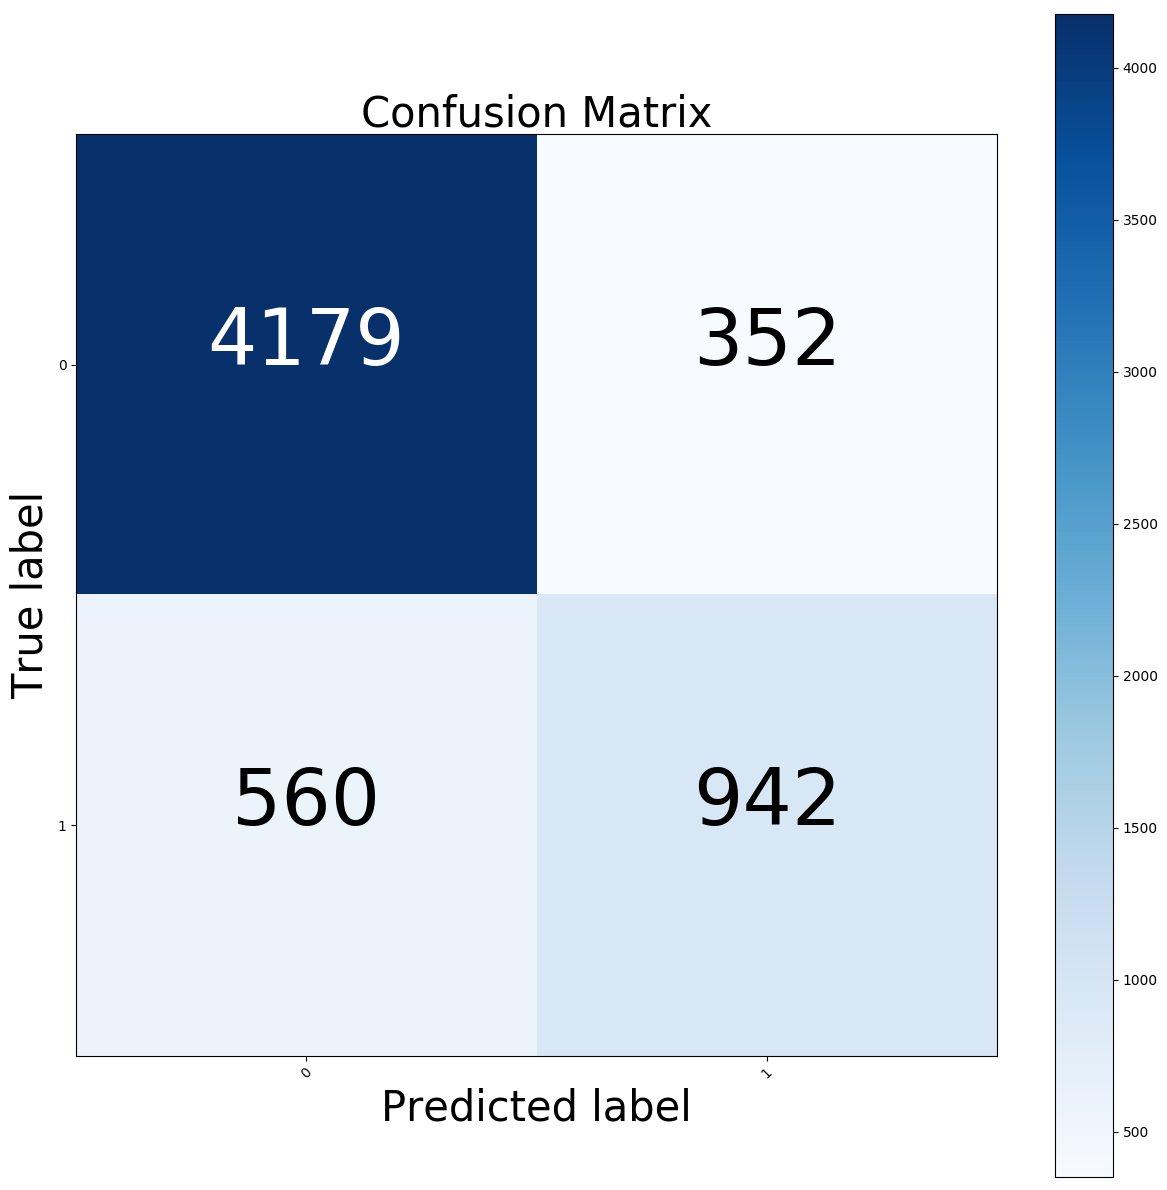

In [22]:
from sklearn.metrics import confusion_matrix

# calculate
confusion_matrix = confusion_matrix(testing_y, testing_y_pred)
normed_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
num_classes = np.unique(classes)

cmap=plt.cm.Blues
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = 'd'
thresh = confusion_matrix.max() / 2.0

for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=56)


plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)




Text(0.5,107.986,'Predicted label')

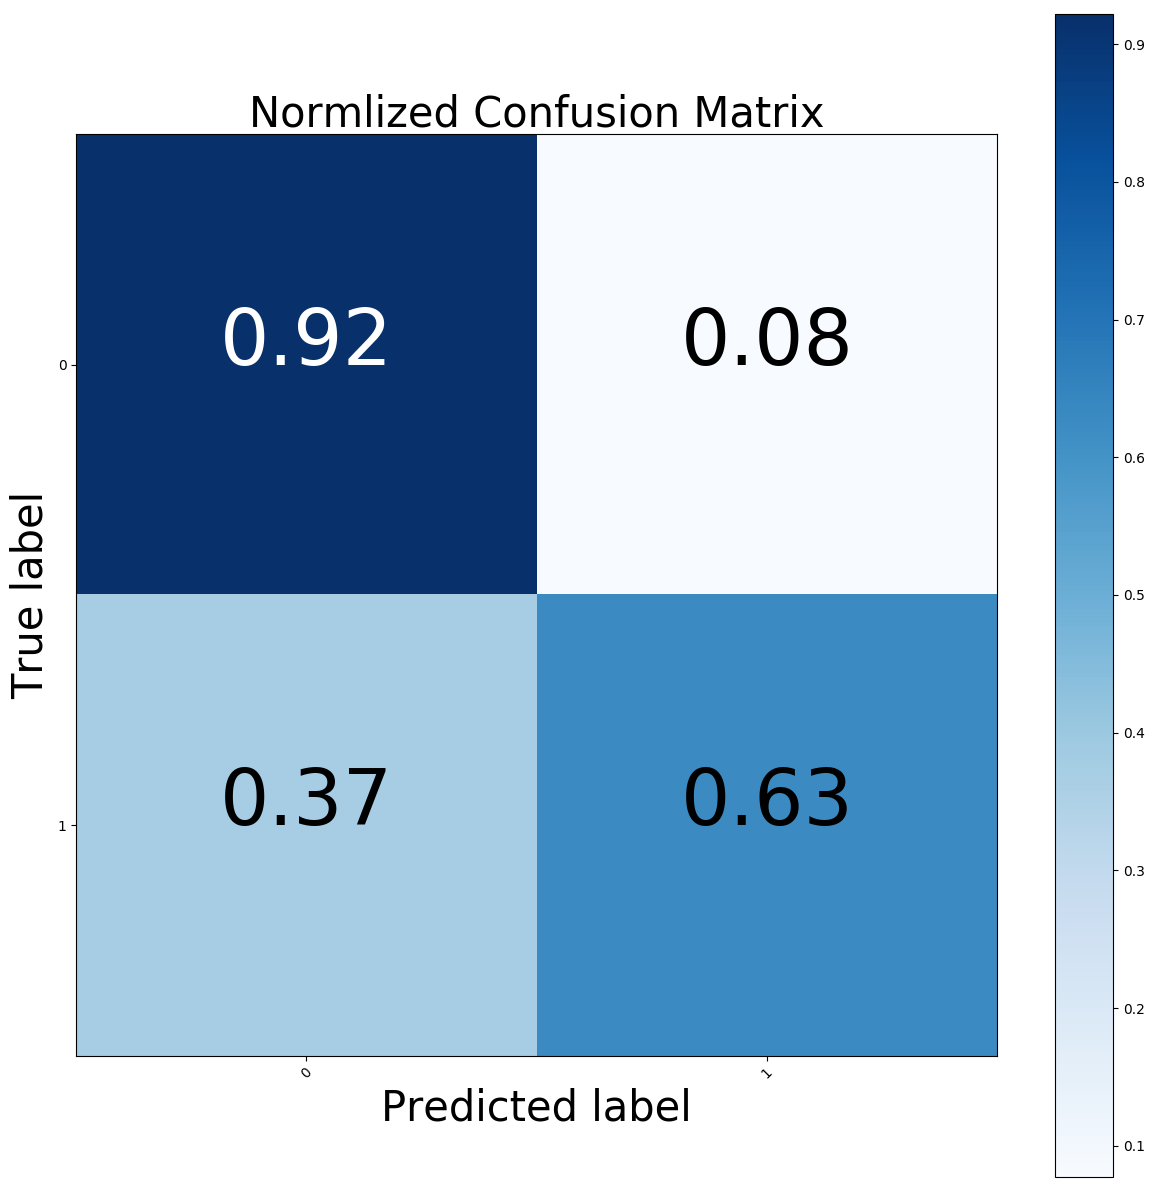

In [23]:
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(normed_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Normlized Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = '.2f'
thresh = confusion_matrix.max() / 2.0
for i, j in itertools.product(range(normed_confusion_matrix.shape[0]), range(normed_confusion_matrix.shape[1])):
    plt.text(j, i, format(normed_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=56)

plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)

# Learning Curve

In [37]:
train_sizes = np.append(np.linspace(0.05, 0.1, 20, endpoint=False),
                            np.linspace(0.1, 1, 20, endpoint=True))

# calculate

# balanced accuracy
# balanced_accuracy_train_sizes, balanced_accuracy_train_scores, balanced_accuracy_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=data1_scorer,
#     n_jobs=4,
#     random_state=seed)


# unbalanced accuracy
accuracy_train_sizes, accuracy_train_scores, accuracy_test_scores = sklearn.model_selection.learning_curve(
    best_estimator,
    training_x,
    training_y,
    cv=5,
    train_sizes=train_sizes,
    verbose=10,
    scoring=make_scorer(accuracy_score),
    n_jobs=4,
    random_state=seed)

# # precision
# precision_train_sizes, precision_train_scores, precision_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(precision_score),
#     n_jobs=4,
#     random_state=seed)

# # recall
# recall_train_sizes, recall_train_scores, recall_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(recall_score),
#     n_jobs=4,
#     random_state=seed)

# # roc_auc accuracy
# roc_auc_train_sizes, roc_auc_train_scores, roc_auc_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(roc_auc_score),
#     n_jobs=4,
#     random_state=seed)




[learning_curve] Training set sizes: [  965  1013  1061  1109  1158  1206  1254  1302  1351  1399  1447  1495
  1544  1592  1640  1688  1737  1785  1833  1881  1930  2844  3758  4673
  5587  6501  7416  8330  9244 10158 11073 11987 12901 13816 14730 15644
 16559 17473 18387 19302]


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8039784500621633, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.7977621218400331, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ....................... , score=0.7934106920845421, total=   0.0s[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8070866141732284, total=   0.0s[CV] ....................... , score=0.8130957314546208, total=   0.0s
[CV] ........................ , score=0.806672192291753, total=   0.0s[CV]  ................................................................




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................[CV] ....................... , score=0.8139245752175714, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] ........................ , score=0.805428926647327, total=   0.0s[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ....................... , score=0.8050145047658517, total=   0.0s[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  ................................................................[CV] ....................... , score=0.8081226688769167, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................[CV] ....................... , score=0.8128885205138832, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  ................................................................[CV] ....................... , score=0.8046000828843763, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8159966846249482, total=   0.0s[CV] ....................... , score=0.8159966846249482, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':





[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8116452548694572, total=   0.0s
[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV]  ................................................................

[CV] ....................... , score=0.8170327393286365, total=   0.0s[CV] ....................... , score=0.8232490675507667, total=   0.0s
[CV] ....................... , score=0.8058433485288024, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8153750518027352, total=   0.0s[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................[CV] ....................... , score=0.8023207625362619, total=   0.0s

[CV] ....................... , score=0.8004558640696229, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ....................... , score=0.8278077082469955, total=   0.0s[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ....................... , score=0.8178615830915872, total=   0.0s

[Parallel(n_jobs=4)]: Done  12 out of 200 | elapsed:    0.4s remaining:    5.9s


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8263572316618317, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8168255283878989, total=   0.0s
[CV] ....................... , score=0.8253211769581434, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8311230832987981, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8300870285951099, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8365105677579776, total=   0.1s[CV] ....................... , score=0.8365105677579776, total=   0.1s[CV]  ................................................................




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8377538334024036, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8404475756319933, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8350600911728139, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8336096145876503, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8350600911728139, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8406547865727311, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8431413178615831, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8414836303356817, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.7900953170327393, total=   0.0s[CV]  ................................................................


[Parallel(n_jobs=4)]: Done  33 out of 200 | elapsed:    0.9s remaining:    4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8464566929133859, total=   0.1s[CV]  ................................................................

[CV] ....................... , score=0.7894736842105263, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.7834645669291339, total=   0.0s[CV]  ................................................................

[CV] ....................... , score=0.7963116452548694, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.7992125984251969, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.7963116452548694, total=   0.0s

[CV] ......................... , score=0.84251968503937, total=   0.2s
[CV] ....................... , score=0.7948611686697058, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8043928719436386, total=   0.0s

[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ....................... , score=0.7973476999585578, total=   0.0s[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8070866141732284, total=   0.0s[CV]  ................................................................

[CV] ......................... , score=0.80605055946954, total=   0.0s[CV] ....................... , score=0.8037712391214256, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.7979693327807709, total=   0.0s

[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.7948611686697058, total=   0.0s[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................[CV] ....................... , score=0.8197264815582262, total=   0.0s

[CV] ....................... , score=0.8178615830915872, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ....................... , score=0.8176543721508496, total=   0.0s[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] ....................... , score=0.8205553253211769, total=   0.0s
[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ........................ , score=0.823041856610029, total=   0.0s
[CV]  ................................................................

[CV] ....................... , score=0.8108164111065064, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ......................... , score=0.82117695814339, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8348528802320763, total=   0.0s[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV]  ................................................................

[CV] ....................... , score=0.8354745130542892, total=   0.0s
[CV] ....................... , score=0.8389970990468296, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ........................ , score=0.838789888106092, total=   0.0s[CV]  ................................................................

[CV] ....................... , score=0.8313302942395359, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
[Parallel(n_jobs=4)]: Done  54 out of 200 | elapsed:    1.4s remaining:    3.7s



[CV]  ................................................................
[CV] ........................ , score=0.837546622461666, total=   0.1s
[CV] ....................... , score=0.8352673021135516, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8392043099875673, total=   0.1s

[CV] ......................... , score=0.83630335681724, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8350600911728139, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8418980522171571, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ......................... , score=0.84251968503937, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8396187318690427, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8406547865727311, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8452134272689598, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8474927476170742, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8489432242022379, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.7845006216328222, total=   0.0s
[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.7876087857438873, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.7898881060920017, total=   0.0s[CV] ....................... , score=0.8489432242022379, total=   0.1s


[Parallel(n_jobs=4)]: Done  75 out of 200 | elapsed:    1.9s remaining:    3.1s


[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ....................... , score=0.7932034811438043, total=   0.0s[CV]  ................................................................

[CV] ....................... , score=0.8000414421881475, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8506009117281392, total=   0.2s[CV]  ................................................................

[CV] ........................ , score=0.803564028180688, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ....................... , score=0.7909241607956901, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV]  ................................................................


[CV] ........................ , score=0.805428926647327, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................[CV] ....................... , score=0.7948611686697058, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ....................... , score=0.7975549108992955, total=   0.0s[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8002486531288852, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ....................... , score=0.8064649813510153, total=   0.0s[CV]  ................................................................
[CV] ....................... , score=0.8002486531288852, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ....................... , score=0.8077082469954414, total=   0.0s[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  ................................................................[CV] ....................... , score=0.8137173642768338, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  ................................................................[CV] ........................ , score=0.819933692498964, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8064649813510153, total=   0.0s
[CV]  ................................................................[CV] ....................... , score=0.8093659345213428, total=   0.0s




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8184832159138002, total=   0.0s[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV] ........................ , score=0.810401989225031, total=   0.0s[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ........................ , score=0.818690426854538, total=   0.0s[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8193120596767509, total=   0.0s[CV]  ................................................................

[CV] ....................... , score=0.8271860754247824, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8276004973062577, total=   0.0s[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8360961458765023, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8352673021135516, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8367177786987153, total=   0.1s[CV] ....................... , score=0.8300870285951099, total=   0.1s



[Parallel(n_jobs=4)]: Done  96 out of 200 | elapsed:    2.3s remaining:    2.5s
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8379610443431413, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8365105677579776, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8317447161210112, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8460422710319104, total=   0.1s[CV]  ................................................................

[CV] ....................... , score=0.8443845835060091, total=   0.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8445917944467468, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8458350600911728, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.841276419394944, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8454206382096975, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.7881865284974093, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8479071694985495, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.7844559585492228, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.7825906735751296, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.7956476683937824, total=   0.0s[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8464566929133859, total=   0.1s
[CV]  ................................................................[CV] ........................ , score=0.797720207253886, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................[CV] ....................... , score=0.7966839378238342, total=   0.0s
[CV] ....................... , score=0.8487360132615002, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.7890155440414508, total=   0.0s[CV]  ................................................................
[CV] ....................... , score=0.8041450777202073, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
[Parallel(n_jobs=4)]: Done 117 out of 200 | elapsed:    2.8s remaining:    2.0s



[CV] ....................... , score=0.7939896373056995, total=   0.0s[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8014507772020726, total=   0.0s
[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  ................................................................[CV] ....................... , score=0.8053886010362694, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8080829015544041, total=   0.0s[CV]  ................................................................
[CV] ....................... , score=0.8072538860103627, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.7987564766839378, total=   0.0s[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ....................... , score=0.8217616580310881, total=   0.0s[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ....................... , score=0.8182383419689119, total=   0.0s[CV]  ................................................................[CV] ....................... , score=0.8128497409326425, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ....................... , score=0.8145077720207254, total=   0.0s[CV] ....................... , score=0.8145077720207254, total=   0.0s

[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................[CV] ....................... , score=0.8084974093264249, total=   0.0s
[CV] ....................... , score=0.8203108808290156, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ....................... , score=0.8213471502590673, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8290155440414507, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8283937823834197, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8335751295336787, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8362694300518134, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8346113989637306, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8321243523316062, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8402072538860104, total=   0.1s


[Parallel(n_jobs=4)]: Done 138 out of 200 | elapsed:    3.4s remaining:    1.5s
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8354404145077721, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8364766839378238, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8360621761658031, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8362694300518134, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8420725388601036, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8412435233160622, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.840621761658031, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8412435233160622, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8443523316062176, total=   0.1s
[CV] ....................... , score=0.8016580310880829, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.7852849740932643, total=   0.0s
[CV] ....................... , score=0.7921243523316062, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ....................... , score=0.8404145077720208, total=   0.1s[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................[CV] ....................... , score=0.8031088082901554, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8472538860103627, total=   0.1s[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ........................ , score=0.807461139896373, total=   0.0s[CV]  ................................................................

[CV] ....................... , score=0.7985492227979275, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................[CV] ....................... , score=0.7952331606217616, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ........................ , score=0.807461139896373, total=   0.0s[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

[CV] ....................... , score=0.8047668393782383, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................[CV] ....................... , score=0.8124352331606217, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  ................................................................[CV] ....................... , score=0.8043523316062177, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8095336787564766, total=   0.0s
[CV] ....................... , score=0.8099481865284974, total=   0.0s[CV]  ................................................................




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8053886010362694, total=   0.0s[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
[Parallel(n_jobs=4)]: Done 159 out of 200 | elapsed:    3.9s remaining:    1.0s


[CV]  ................................................................[CV] ....................... , score=0.8227979274611399, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


[CV] ....................... , score=0.8161658031088083, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ........................ , score=0.809119170984456, total=   0.0s
[CV] ....................... , score=0.8116062176165804, total=   0.0s[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8145077720207254, total=   0.0s[CV]  ................................................................


[CV] ....................... , score=0.8103626943005181, total=   0.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] ....................... , score=0.8198963730569948, total=   0.0s[CV] ....................... , score=0.8306735751295337, total=   0.0s[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................[CV] ....................... , score=0.8352331606217617, total=   0.0s

[CV] ....................... , score=0.8420725388601036, total=   0.0s[CV] ....................... , score=0.8489119170984456, total=   0.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8426943005181348, total=   0.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8397927461139897, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8393782383419689, total=   0.1s

[Parallel(n_jobs=4)]: Done 180 out of 200 | elapsed:    4.3s remaining:    0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ........................ , score=0.844559585492228, total=   0.1s[CV]  ................................................................
[CV] ....................... , score=0.8404145077720208, total=   0.1s[CV] ....................... , score=0.8470466321243524, total=   0.1s




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ........................ , score=0.846839378238342, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.846839378238342, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8474611398963731, total=   0.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8474611398963731, total=   0.1s[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8511917098445596, total=   0.1s[CV] ........................ , score=0.849119170984456, total=   0.1s[CV] ....................... , score=0.8495336787564767, total=   0.1s




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8534715025906736, total=   0.1s
[CV] ....................... , score=0.8503626943005181, total=   0.1s


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    5.0s finished


In [38]:
# # plot
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('Balanced Accuracy Learning Curve', fontsize=35)

# plt.xlabel('Training examples (count)', fontsize=30)
# plt.ylabel('Balanced Accuracy (0.0 - 1.0)', fontsize=30)
# plt.grid()
# plt.tight_layout()

# train_scores = balanced_accuracy_train_scores
# test_scores = balanced_accuracy_test_scores
# train_sizes = balanced_accuracy_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# # ---------------------------------------------------------------

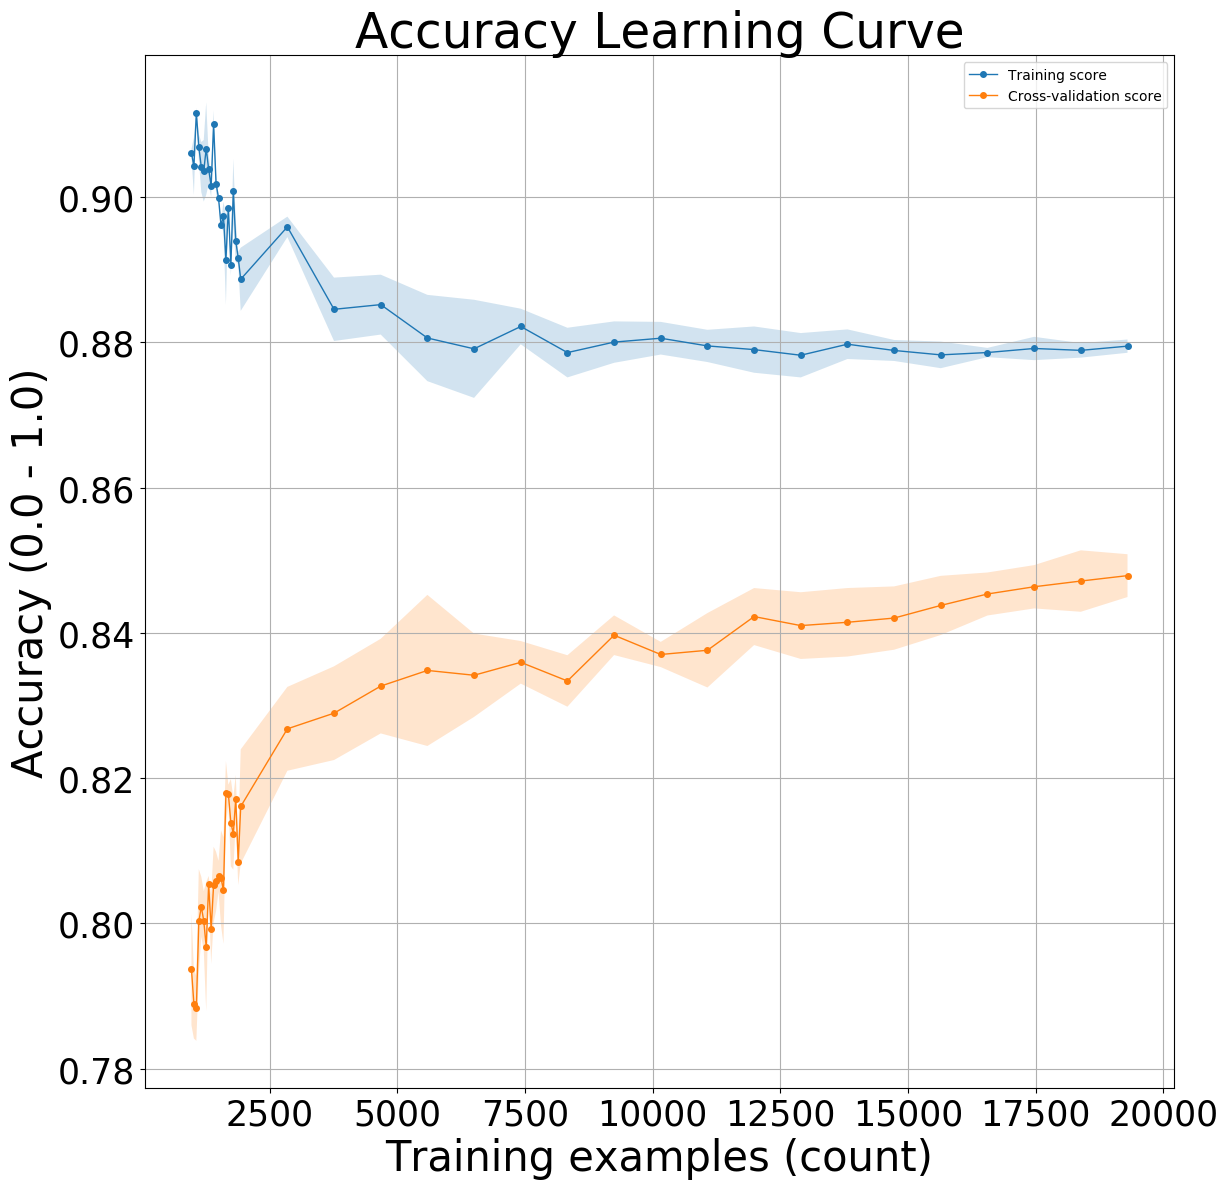

In [39]:
plt.close()
plt.figure(figsize=(12, 12))
plt.tick_params(labelsize=25)


plt.title('Accuracy Learning Curve', fontsize=35)

plt.xlabel('Training examples (count)', fontsize=30)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=30)
plt.grid()
plt.tight_layout()

train_scores = accuracy_train_scores
test_scores = accuracy_test_scores
train_sizes = accuracy_train_sizes

train_points = train_scores
test_points = test_scores

ax = plt.gca()
ax.set_xscale("linear")
ax.set_yscale("linear")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
         label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
         label="Cross-validation score")

plt.legend(loc="best")



# ---------------------------------------------------------------


In [40]:
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('Precision Learning Curve')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = precision_train_scores
# test_scores = precision_test_scores
# train_sizes = precision_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# # -------------------------------------------


In [41]:
# plt.close()
# plt.figure(figsize=(12, 12))

# plt.title('Recall Accuracy Learning Curve')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = recall_train_scores
# test_scores = recall_test_scores
# train_sizes = recall_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")


# # -------------------------------------------


In [42]:
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('ROC-AUC Accuracy Learning Curve')
# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = roc_auc_train_scores
# test_scores = roc_auc_test_scores
# train_sizes = roc_auc_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# Compelxity Param: Max Depth

In [43]:
# balanced_accuracy_train_scores, balanced_accuracy_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "max_depth", max_depth, cv=5,
#                                                  scoring=data1_scorer, n_jobs=4)

accuracy_train_scores, accuracy_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "max_depth", max_depth, cv=5,
                                                 scoring=make_scorer(accuracy_score), n_jobs=4)

# precision_train_scores, precision_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "max_depth", max_depth, cv=5,
#                                                  scoring=make_scorer(precision_score), n_jobs=4)

# recall_train_scores, recall_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "max_depth", max_depth, cv=5,
#                                                  scoring=make_scorer(recall_score), n_jobs=4)

# roc_auc_train_scores, roc_auc_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "max_depth", max_depth, cv=5,
#                                                  scoring=make_scorer(roc_auc_score), n_jobs=4)

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/

In [44]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: max_depth')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = balanced_accuracy_train_scores
# test_scores = balanced_accuracy_test_scores
# train_sizes = max_depth

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

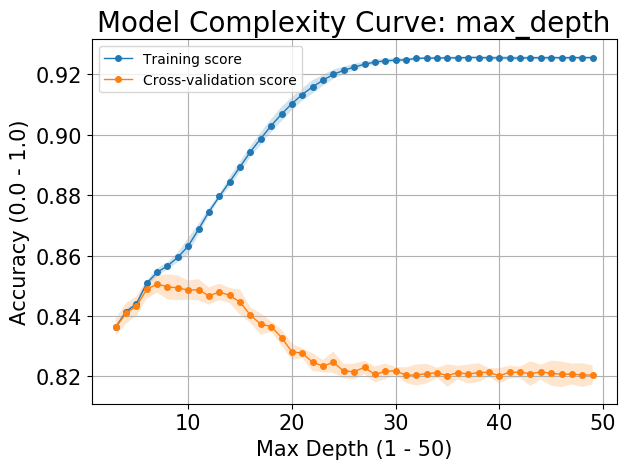

In [45]:
plt.close('all')
plt.figure()
plt.title('Model Complexity Curve: max_depth', fontsize=20)
plt.tick_params(labelsize=15)

plt.xlabel('Max Depth (1 - 50)', fontsize=15)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=15)
plt.grid()
plt.tight_layout()

train_scores = accuracy_train_scores
test_scores = accuracy_test_scores
train_sizes = max_depth

train_points = train_scores
test_points = test_scores
ax = plt.gca()
x_scale = 'linear'
y_scale = 'linear'

ax.set_xscale(x_scale)
ax.set_yscale(y_scale)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
     label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
     label="Cross-validation score")

plt.legend(loc="best")
plt.tight_layout()


NameError: name 'precision_train_scores' is not defined

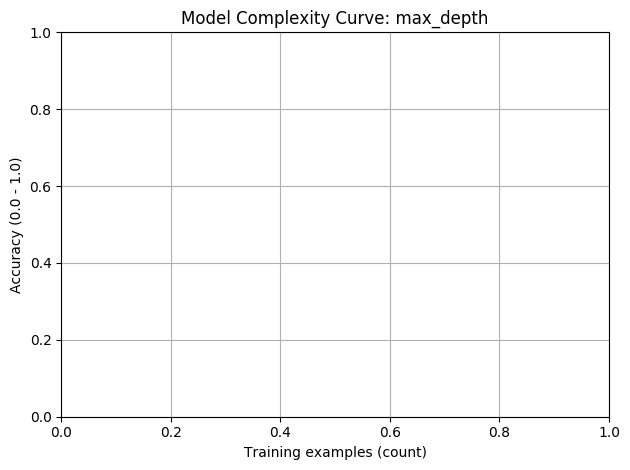

In [35]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: max_depth')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = precision_train_scores
# test_scores = precision_test_scores
# train_sizes = max_depth

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

NameError: name 'recall_train_scores' is not defined

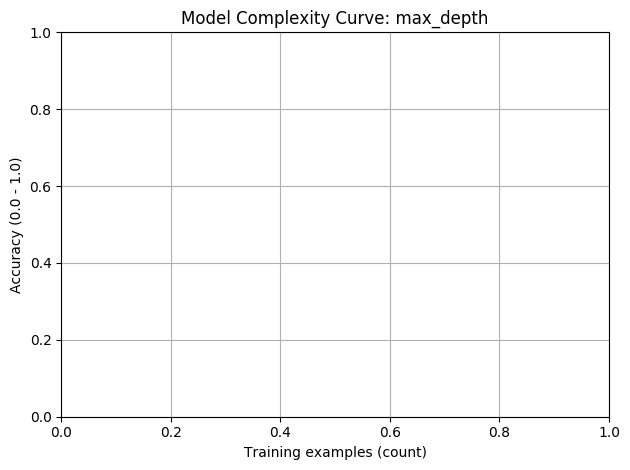

In [36]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: max_depth')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = recall_train_scores
# test_scores = recall_test_scores
# train_sizes = max_depth

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

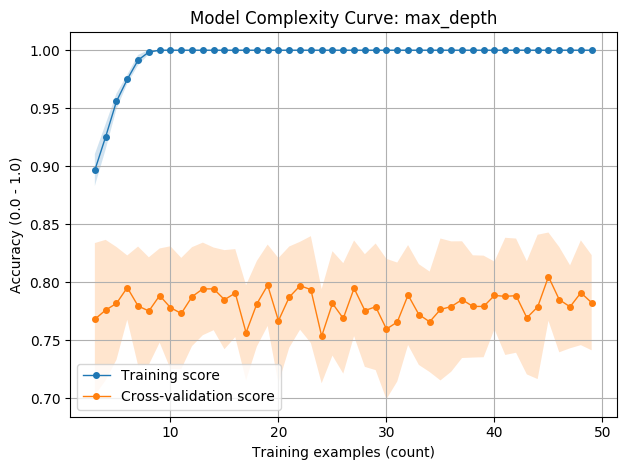

In [52]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: max_depth')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = roc_auc_train_scores
# test_scores = roc_auc_test_scores
# train_sizes = max_depth

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

# Timing Curve

In [46]:
from time import clock


sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
tests = 5
out = dict()
out['train'] = np.zeros(shape=(len(sizes), tests))
out['test'] = np.zeros(shape=(len(sizes), tests))

for i, frac in enumerate(sizes):
    for j in range(tests):
        np.random.seed(seed)
        x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(training_x, training_y, test_size=1 - frac, random_state=seed)
        st = clock()
        best_estimator.fit(x_train, y_train)
        out['train'][i, j] = (clock() - st)
        st = clock()
        best_estimator.predict(x_test)
        out['test'][i, j] = (clock() - st)


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time

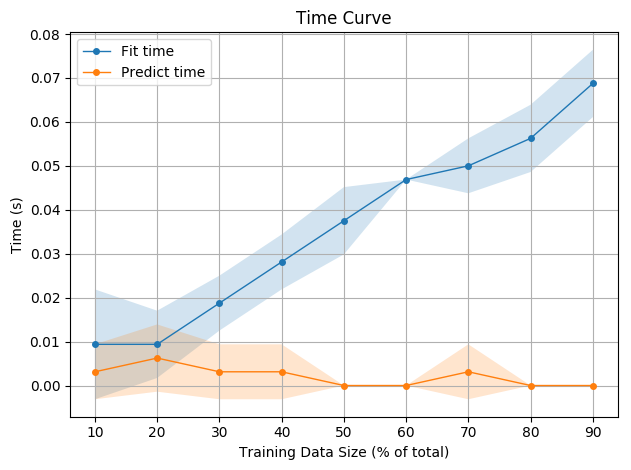

In [47]:
plt.close()
plt.figure()
plt.title("Time Curve")

plt.xlabel("Training Data Size (% of total)")
plt.ylabel("Time (s)")
fit_scores_mean = np.mean(out['train'], axis=1)
fit_scores_std = np.std(out['train'], axis=1)
predict_scores_mean = np.mean(out['test'], axis=1)
predict_scores_std = np.std(out['test'], axis=1)
plt.grid()
plt.tight_layout()

plt.fill_between(np.array(sizes) * 100, fit_scores_mean - fit_scores_std,
                 fit_scores_mean + fit_scores_std, alpha=0.2)
plt.fill_between(np.array(sizes) * 100, predict_scores_mean - predict_scores_std,
                 predict_scores_mean + predict_scores_std, alpha=0.2)
plt.plot(np.array(sizes) * 100, fit_scores_mean, 'o-', linewidth=1, markersize=4,
         label="Fit time")
plt.plot(np.array(sizes) * 100, predict_scores_mean, 'o-', linewidth=1, markersize=4,
         label="Predict time")

plt.legend(loc="best")

In [48]:
print(fit_scores_mean)
print(predict_scores_mean)

[0.009375 0.009375 0.01875  0.028125 0.0375   0.046875 0.05     0.05625
 0.06875 ]
[0.003125 0.00625  0.003125 0.003125 0.       0.       0.003125 0.
 0.      ]
